## Calling required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD, Nadam, RMSprop
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import absolute
import shap
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
from pdpbox import pdp, info_plots
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from matplotlib.colors import LinearSegmentedColormap

## Exploratory Data Analysis - Prepration & Visualization

In [ ]:
# Load the data and store it in a pandas dataframe
df = pd.read_csv('Data2022.csv')

In [ ]:
df

id  age  year  sex  glang  part  job  stud_h  health  psyt  jspe  \
0       2   18     1    1    120     1    0      56       3     0    88   
1       4   26     4    1      1     1    0      20       4     0   109   
2       9   21     3    2      1     0    0      36       3     0   106   
3      10   21     2    2      1     0    1      51       5     0   101   
4      13   21     3    1      1     1    0      22       4     0   102   
..    ...  ...   ...  ...    ...   ...  ...     ...     ...   ...   ...   
881  1781   21     2    1      1     1    0      45       3     0   106   
882  1785   20     2    2      1     0    0      13       3     0   113   
883  1787   19     1    1      1     0    0      50       5     0   100   
884  1789   24     5    2      1     0    0      20       2     1   120   
885  1790   22     3    1      1     0    1      20       5     0   102   

     qcae_cog  qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  
0          62        27    17   0.738095    34      61      17      13      20  
1          55        37    22   0.690476     7      33      14      11      26  
2          64        39    17   0.690476    25      73      24       7      23  
3          52        33    18   0.833333    17      48      16      10      21  
4          58        28    21   0.690476    14      46      22      14      23  
..        ...       ...   ...        ...   ...     ...     ...     ...     ...  
881        63        39    28   0.619048    41      39      23       4      34  
882        67        40    21   0.809524    26      41      17       5      24  
883        50        31    24   0.547619    14      45      15       8      31  
884        64        39    21   0.785714    33      58      22      15      19  
885        54        26    25   0.571429     5      27      11       9      30  

[886 rows x 20 columns]

In [ ]:
df = df.drop('id', axis=1)

In [ ]:
df.isnull().sum()

age          0
year         0
sex          0
glang        0
part         0
job          0
stud_h       0
health       0
psyt         0
jspe         0
qcae_cog     0
qcae_aff     0
amsp         0
erec_mean    0
cesd         0
stai_t       0
mbi_ex       0
mbi_cy       0
mbi_ea       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Separate the data into two groups: categorical and numerical
df_cat = df[['sex', 'year', 'glang', 'part', 'job', 'health', 'psyt']]
df_num = df[['age', 'stud_h', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]

In [ ]:
df_cat.head(10)

sex  year  glang  part  job  health  psyt
0    1     1    120     1    0       3     0
1    1     4      1     1    0       4     0
2    2     3      1     0    0       3     0
3    2     2      1     0    1       5     0
4    1     3      1     1    0       4     0
5    2     5      1     1    1       2     0
6    2     5      1     1    0       3     0
7    1     4      1     1    1       4     0
8    2     4      1     1    1       2     0
9    2     2      1     1    0       5     0

In [ ]:
df_num.head(10)

age  stud_h  jspe  qcae_cog  qcae_aff  amsp  erec_mean  cesd  stai_t  \
0   18      56    88        62        27    17   0.738095    34      61   
1   26      20   109        55        37    22   0.690476     7      33   
2   21      36   106        64        39    17   0.690476    25      73   
3   21      51   101        52        33    18   0.833333    17      48   
4   21      22   102        58        28    21   0.690476    14      46   
5   26      10   102        48        37    17   0.690476    14      56   
6   23      15   117        58        38    23   0.714286    45      56   
7   23       8   118        65        40    32   0.880952     6      36   
8   23      20   118        69        46    23   0.666667    43      43   
9   22      20   108        56        36    22   0.690476    11      43   

   mbi_ex  mbi_cy  mbi_ea  
0      17      13      20  
1      14      11      26  
2      24       7      23  
3      16      10      21  
4      22      14      23  
5      18      15      18  
6      28      17      16  
7      11      10      27  
8      26      21      22  
9      18       6      23

In [ ]:
df_num.describe(include='all')

age      stud_h        jspe    qcae_cog    qcae_aff        amsp  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean    22.383747   25.288939  106.374718   58.525959   34.784424   23.150113   
std      3.300664   15.927875    8.784012    6.570341    5.377062    4.993220   
min     17.000000    0.000000   67.000000   37.000000   18.000000    6.000000   
25%     20.000000   12.000000  101.000000   54.000000   31.000000   20.000000   
50%     22.000000   25.000000  107.000000   58.000000   35.000000   23.000000   
75%     24.000000   36.000000  113.000000   63.000000   39.000000   26.750000   
max     49.000000   70.000000  125.000000   76.000000   48.000000   35.000000   

        erec_mean        cesd      stai_t      mbi_ex      mbi_cy      mbi_ea  
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000  
mean     0.720144   18.050790   42.898420   16.878104   10.079007   24.207675  
std      0.093570   11.478731   11.978458    5.256025    4.592609    4.633675  
min      0.357143    0.000000   20.000000    5.000000    4.000000   10.000000  
25%      0.666667    9.000000   34.000000   13.000000    6.000000   21.000000  
50%      0.726190   16.000000   43.000000   17.000000    9.000000   24.000000  
75%      0.785714   25.000000   51.000000   20.000000   13.000000   28.000000  
max      0.952381   56.000000   77.000000   30.000000   24.000000   36.000000

In [ ]:
'''# Define the language mapping dictionary
language_mapping = {
    1: 'French', 15: 'German', 20: 'English', 37: 'Arab', 51: 'Basque',
    52: 'Bulgarian', 53: 'Catalan', 54: 'Chinese', 59: 'Korean',
    60: 'Croatian', 62: 'Danish', 63: 'Spanish', 82: 'Estonian',
    83: 'Finnish', 84: 'Galician', 85: 'Greek', 86: 'Hebrew',
    87: 'Hindi', 88: 'Hungarian', 89: 'Indonesian', 90: 'Italian',
    92: 'Japanese', 93: 'Kazakh', 94: 'Latvian', 95: 'Lithuanian',
    96: 'Malay', 98: 'Dutch', 100: 'Norwegian', 101: 'Polish',
    102: 'Portuguese', 104: 'Romanian', 106: 'Russian', 108: 'Serbian',
    112: 'Slovak', 113: 'Slovenian', 114: 'Swedish', 116: 'Czech',
    117: 'Thai', 118: 'Turkish', 119: 'Ukrainian', 120: 'Vietnamese',
    121: 'Other'
}

# Map the 'glang' column using the language mapping dictionary
df['glang'] = df['glang'].replace(language_mapping)'''


"# Define the language mapping dictionary\nlanguage_mapping = {\n    1: 'French', 15: 'German', 20: 'English', 37: 'Arab', 51: 'Basque',\n    52: 'Bulgarian', 53: 'Catalan', 54: 'Chinese', 59: 'Korean',\n    60: 'Croatian', 62: 'Danish', 63: 'Spanish', 82: 'Estonian',\n    83: 'Finnish', 84: 'Galician', 85: 'Greek', 86: 'Hebrew',\n    87: 'Hindi', 88: 'Hungarian', 89: 'Indonesian', 90: 'Italian',\n    92: 'Japanese', 93: 'Kazakh', 94: 'Latvian', 95: 'Lithuanian',\n    96: 'Malay', 98: 'Dutch', 100: 'Norwegian', 101: 'Polish',\n    102: 'Portuguese', 104: 'Romanian', 106: 'Russian', 108: 'Serbian',\n    112: 'Slovak', 113: 'Slovenian', 114: 'Swedish', 116: 'Czech',\n    117: 'Thai', 118: 'Turkish', 119: 'Ukrainian', 120: 'Vietnamese',\n    121: 'Other'\n}\n\n# Map the 'glang' column using the language mapping dictionary\ndf['glang'] = df['glang'].replace(language_mapping)"

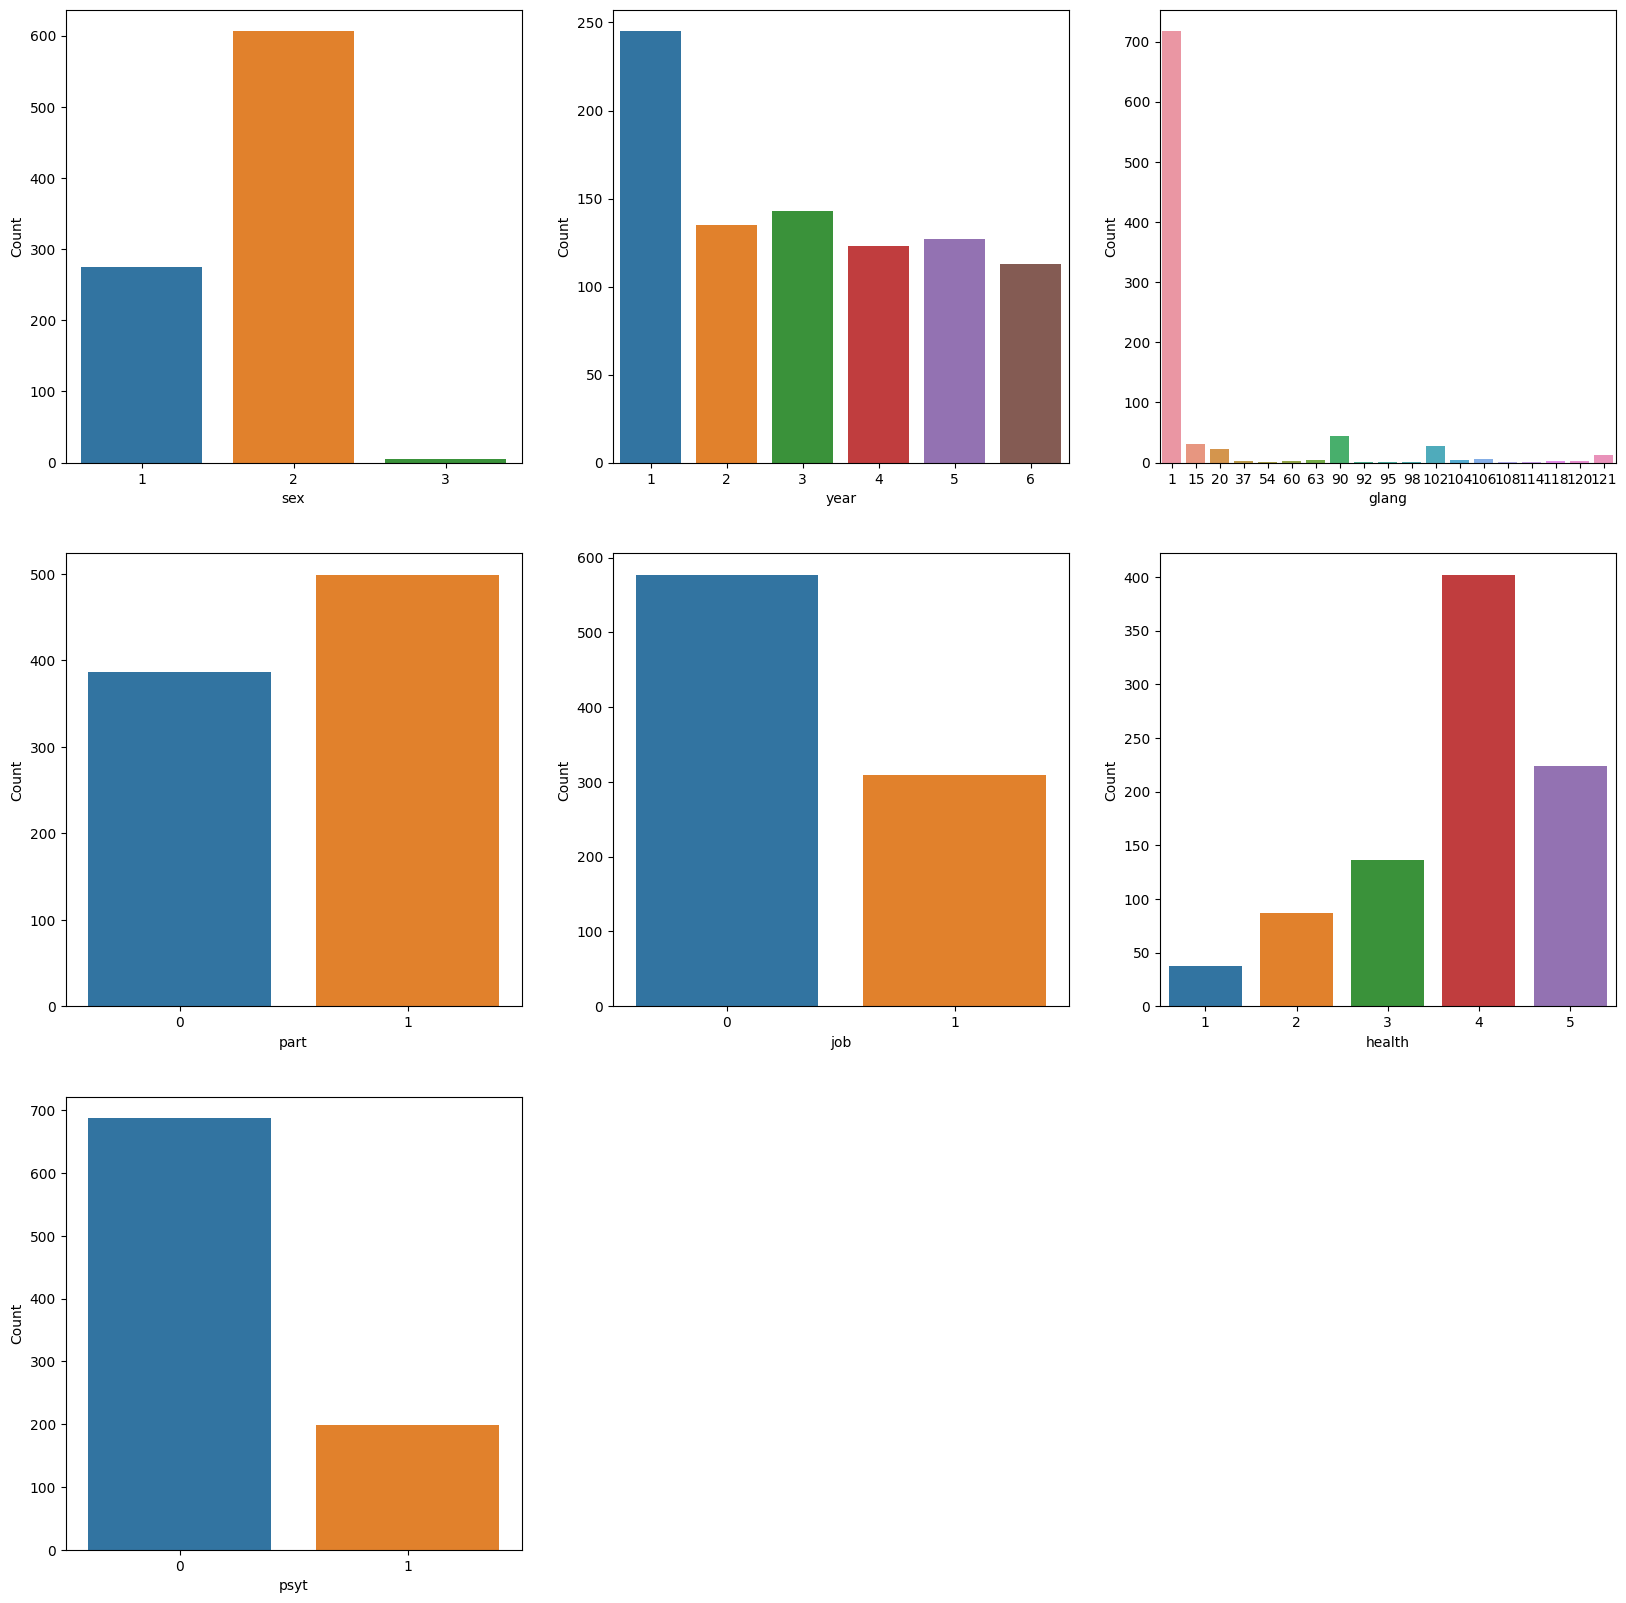

In [ ]:
# Plotting the count of each category for each feature using Seaborn

# Set the figure size
plt.figure(figsize=(20, 20))

# Plot the count of each category for each feature
for i, col in enumerate(df_cat.columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, data=df_cat)
    plt.xlabel(col)
    plt.ylabel('Count')

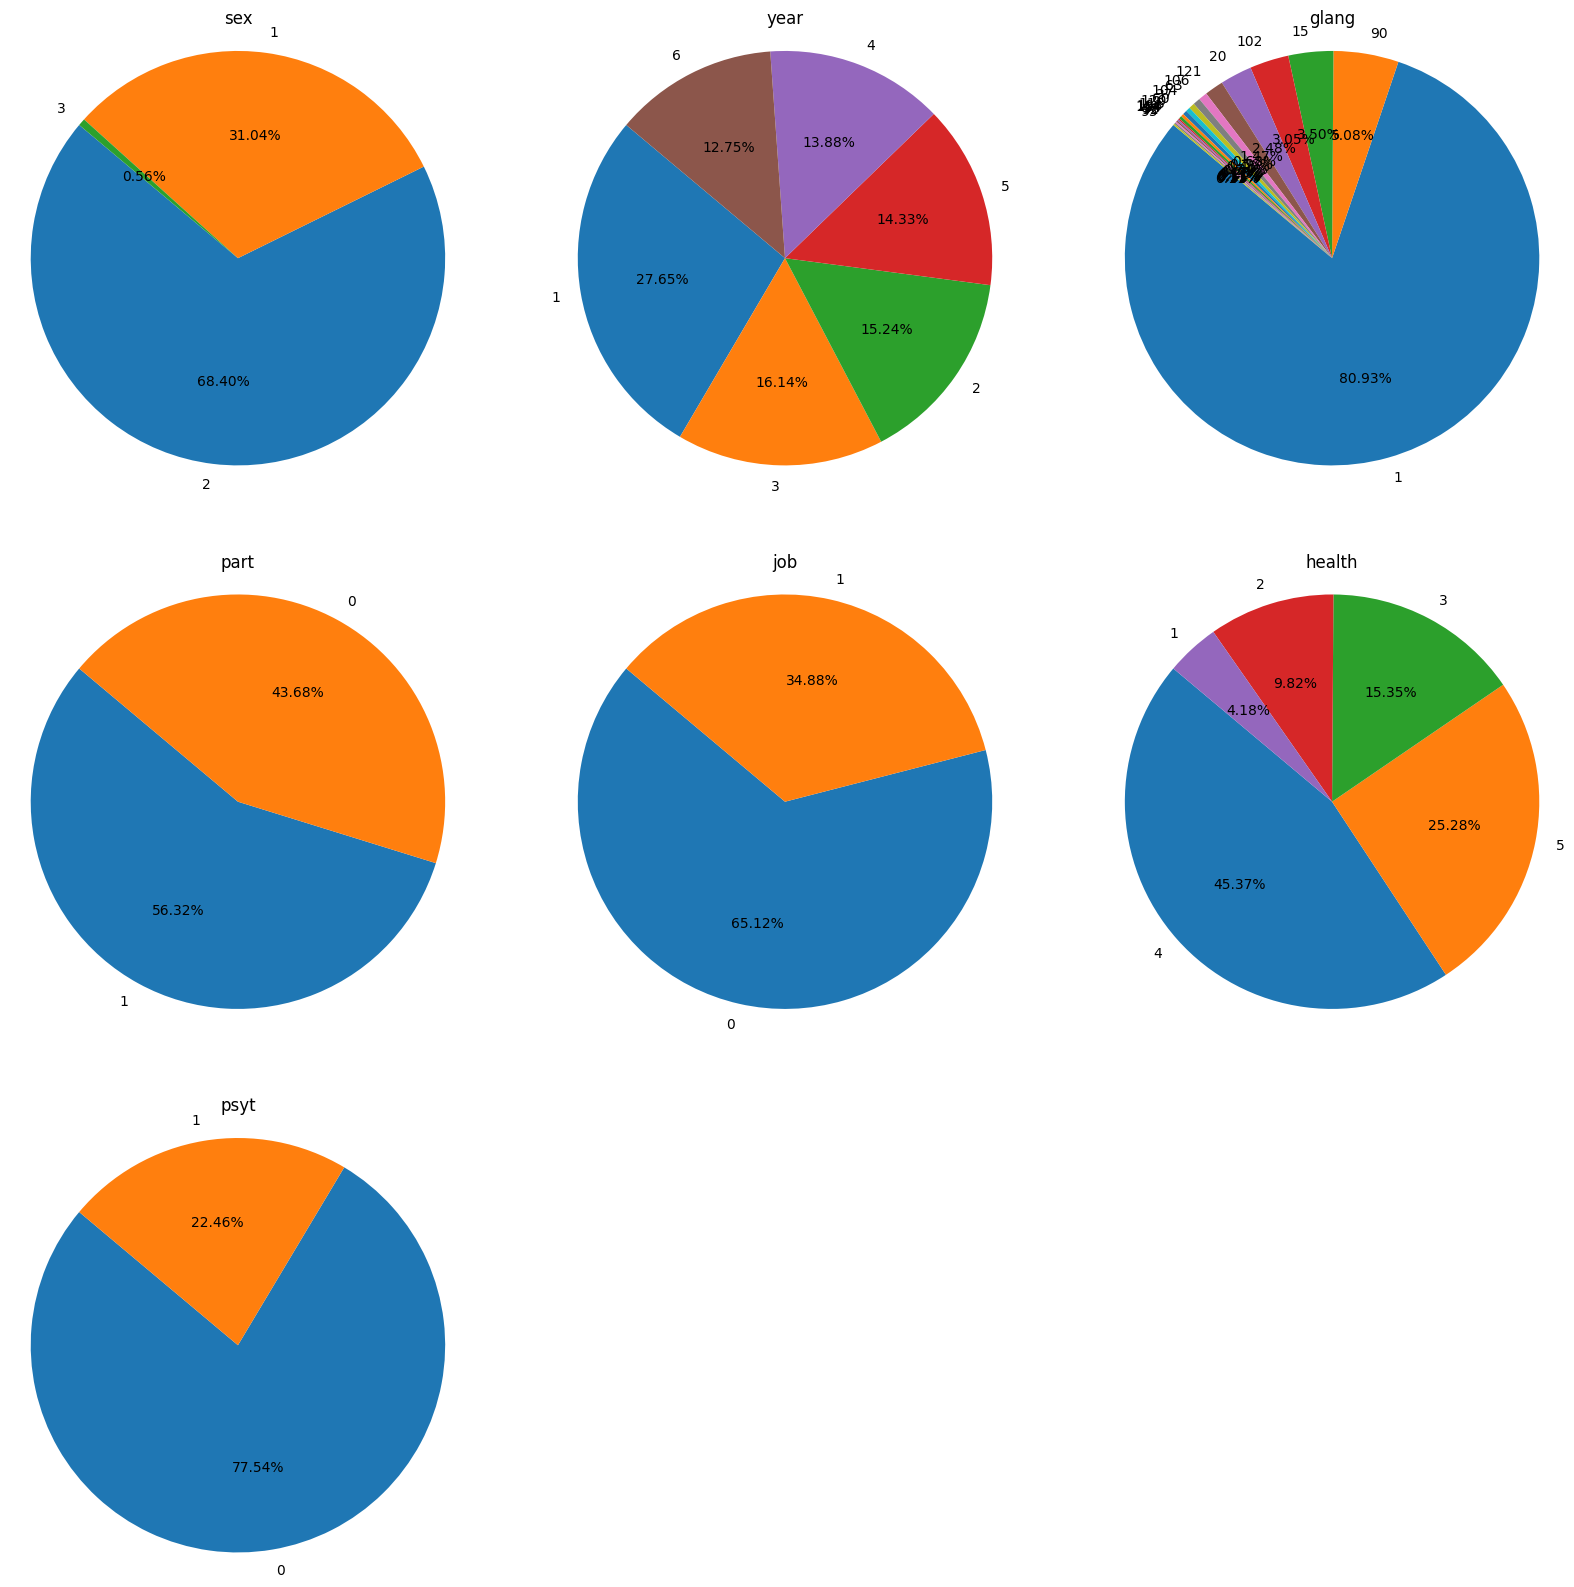

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 20))

# Plot pie chart for each category in each feature
for i, col in enumerate(df_cat.columns):
    plt.subplot(3, 3, i+1)
    
    # Calculate the count of each category
    category_counts = df_cat[col].value_counts()
    
    # Plot the pie chart
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.2f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(col)

plt.show()


C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_14024\2015910982.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['glang'] = df_cat['glang'].replace(small_categories, 'Rest')


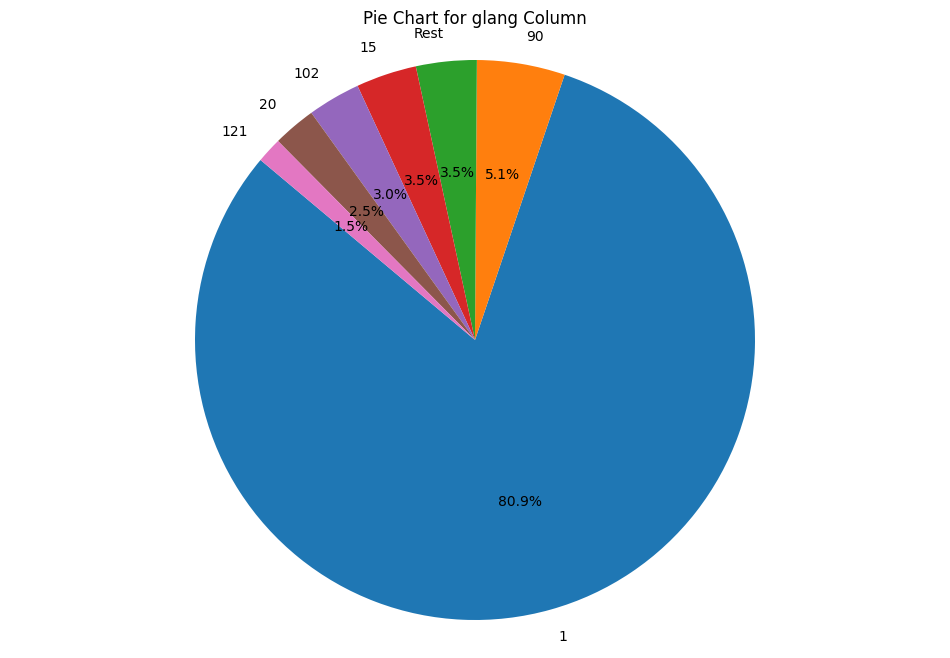

In [ ]:
# Calculate the count of each category in 'glang' column
glang_counts = df_cat['glang'].value_counts()

# Get the categories with less than 1% count
threshold = len(df_cat) * 0.01
small_categories = glang_counts[glang_counts < threshold].index

# Combine small categories into 'Rest'
df_cat['glang'] = df_cat['glang'].replace(small_categories, 'Rest')

# Set the figure size
plt.figure(figsize=(12, 8))

# Calculate the count of each category after combining 'Rest'
glang_counts_combined = df_cat['glang'].value_counts()

# Plot the pie chart for 'glang' column
plt.pie(glang_counts_combined, labels=glang_counts_combined.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('glang')

plt.show()


In [ ]:
'''Finding relationships between 2 categorical variables : Chi-Square Test of Independence

Null hypothesis: There is no relationship between the two variables
Alternative hypothesis: There is a relationship between the two variables
If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a relationship between the two variables'''

'Finding relationships between 2 categorical variables : Chi-Square Test of Independence\n\nNull hypothesis: There is no relationship between the two variables\nAlternative hypothesis: There is a relationship between the two variables\nIf the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a relationship between the two variables'

In [ ]:
# Chi-Square Test of Independence for each pair of categorical variables in a new dataframe
from scipy.stats import chi2_contingency
chi2_table = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Chi-Square', 'p-value'])
for i, col1 in enumerate(df_cat.columns):
    for j, col2 in enumerate(df_cat.columns):
        if i < j:
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_cat[col1], df_cat[col2]))
            chi2_table = chi2_table.append({'Variable 1': col1, 'Variable 2': col2, 'Chi-Square': chi2, 'p-value': p}, ignore_index=True)

In [ ]:
# Keep only the pairs of variables that are related (p-value < 0.05) and sort them by p-value in ascending order (the smaller the p-value, the stronger the relationship)
chi2_table = chi2_table[chi2_table['p-value'] < 0.05].sort_values(by='p-value')
chi2_table

Variable 1 Variable 2  Chi-Square       p-value
8        year        job   72.560233  3.002212e-14
5         sex       psyt   23.484975  7.948815e-06
20     health       psyt   27.583952  1.514423e-05
7        year       part   27.375938  4.818767e-05
6        year      glang   56.276835  2.537231e-03
4         sex     health   21.975553  4.961357e-03
13      glang     health   41.468487  1.478926e-02
2         sex       part    6.787509  3.358236e-02

In [ ]:
'''The variables with low p-values (typically less than 0.05) indicate that there is a significant relationship between the two variables, while those with high p-values suggest that the relationship is not significant.

In our, the variables with low p-values are:

- / job / part and year (p-value is less than 0.001)
psyt and sex/health (p-value is less than 0.001)
health and sex (p-value = 0.004961)
glang and sex (p-value = 0.024965)
part and sex (p-value = 0.033582)'''

'The variables with low p-values (typically less than 0.05) indicate that there is a significant relationship between the two variables, while those with high p-values suggest that the relationship is not significant.\n\nIn our, the variables with low p-values are:\n\n- / job / part and year (p-value is less than 0.001)\npsyt and sex/health (p-value is less than 0.001)\nhealth and sex (p-value = 0.004961)\nglang and sex (p-value = 0.024965)\npart and sex (p-value = 0.033582)'

In [ ]:
'''We can conclude that there, for variables related to health and wellbeing :

Sex and health are both related a to a psychotherapy in the last year.
Sex and health are related.
How long students study is related to their health.'''

'We can conclude that there, for variables related to health and wellbeing :\n\nSex and health are both related a to a psychotherapy in the last year.\nSex and health are related.\nHow long students study is related to their health.'

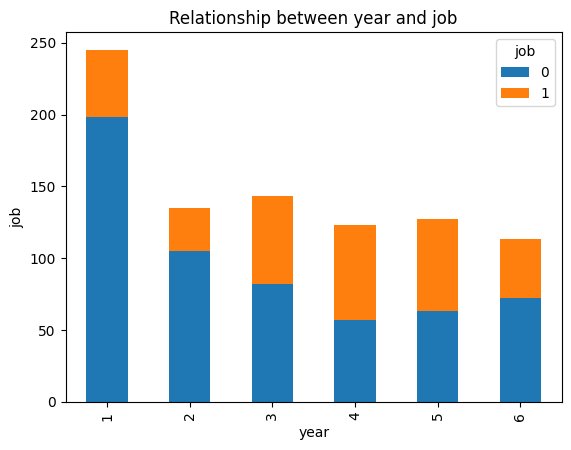

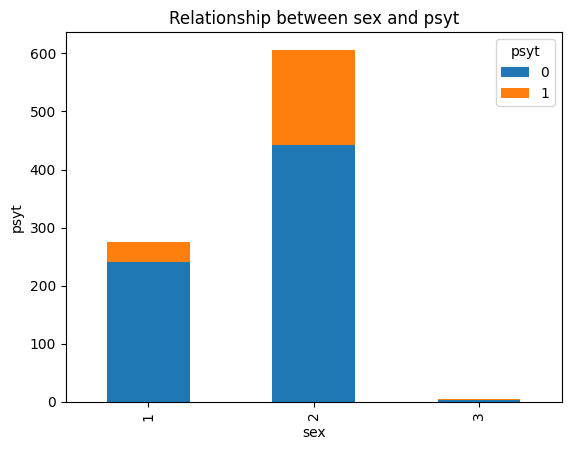

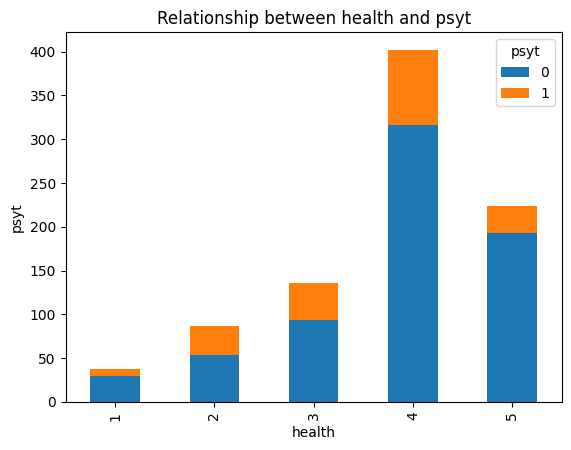

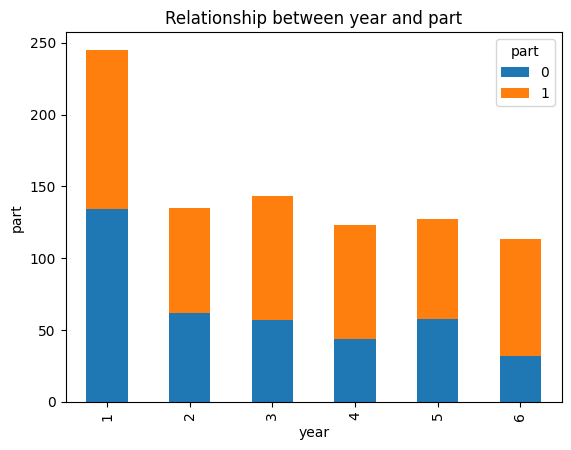

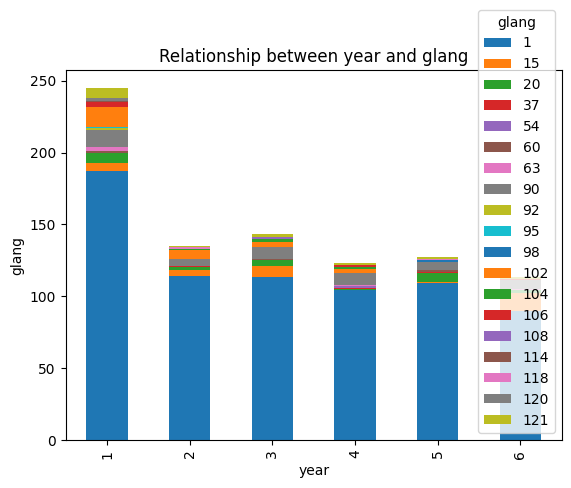

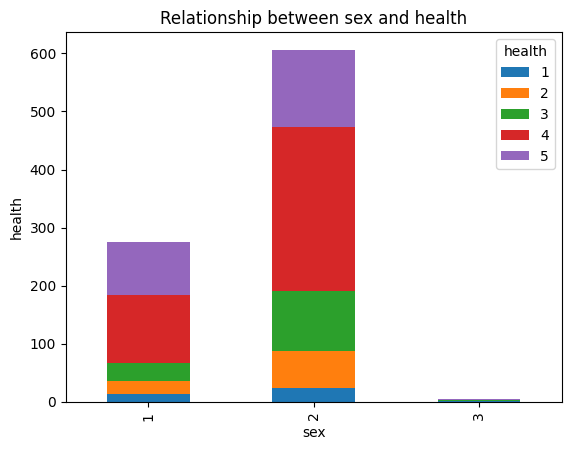

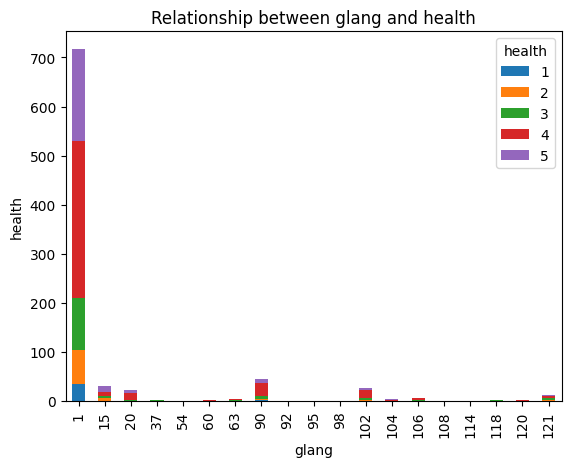

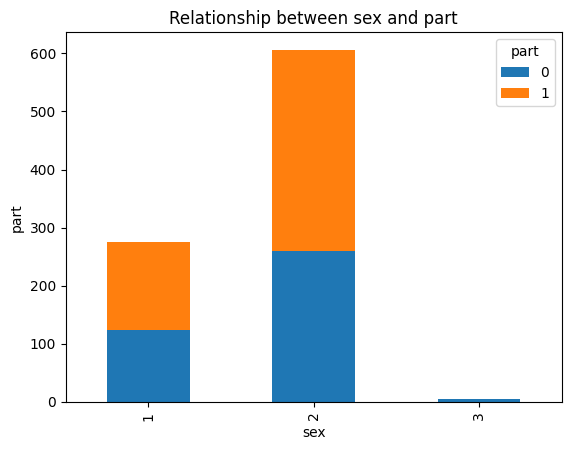

In [ ]:
# Plot the cross-tabulation tables for each significant pair
for index, row in chi2_table.iterrows():
    var1 = row['Variable 1']
    var2 = row['Variable 2']

    # Create a cross-tabulation table
    ctab = pd.crosstab(df[var1], df[var2])

    # Plot the cross-tabulation table
    ctab.plot(kind='bar', stacked=True)
    plt.title("Relationship between " + var1 + " and " + var2)
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()


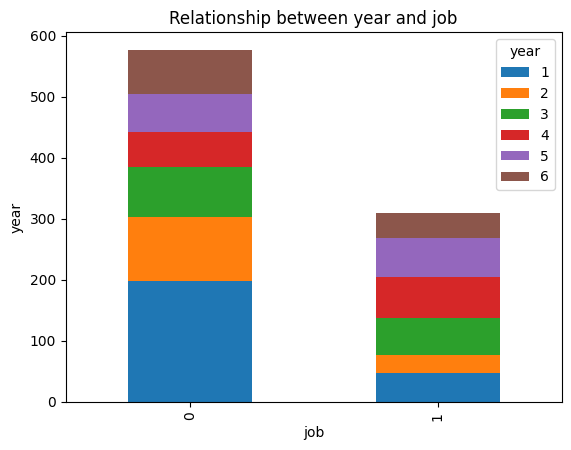

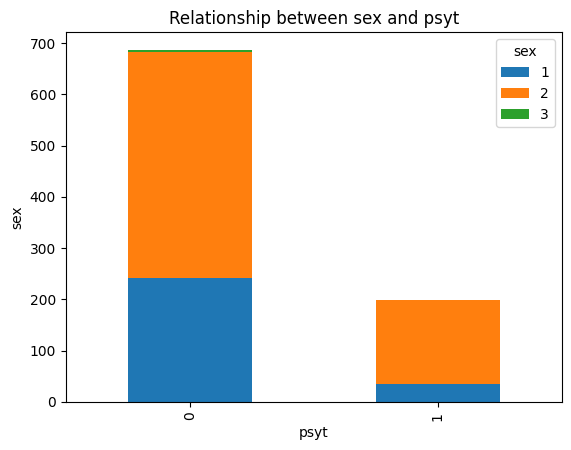

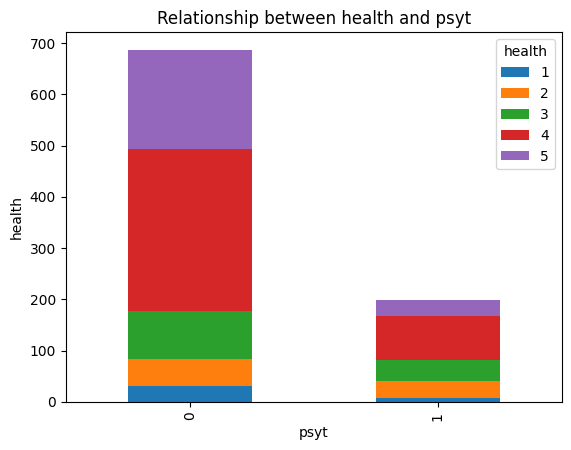

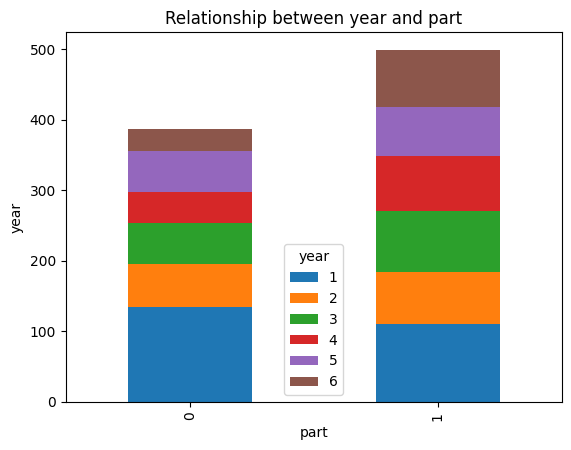

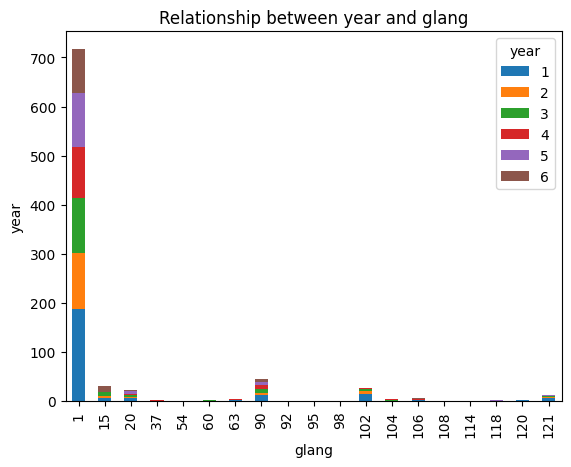

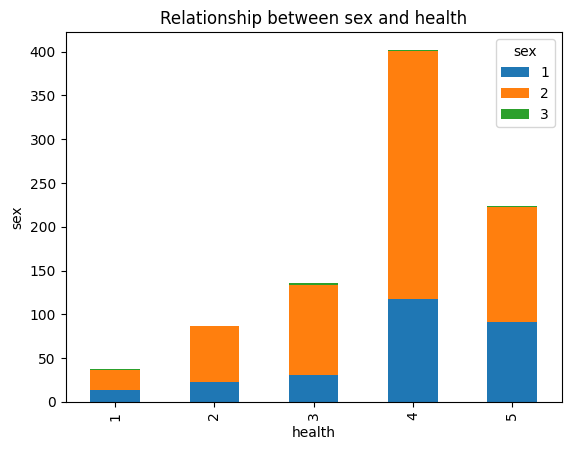

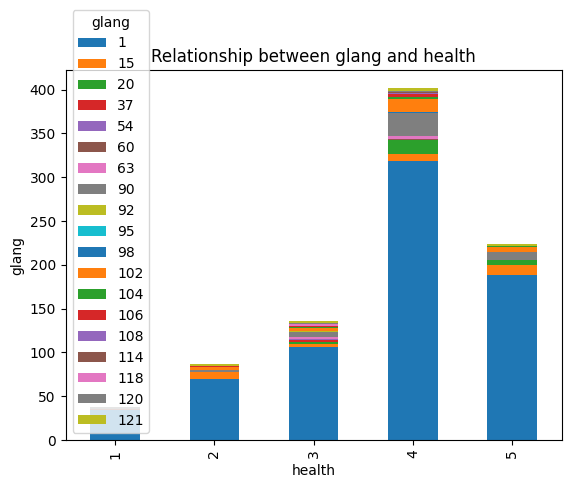

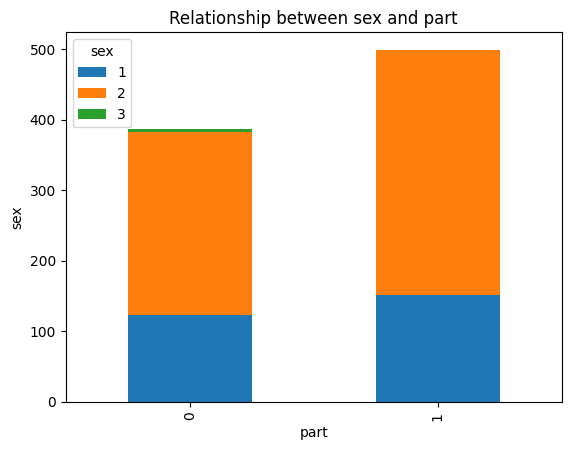

In [ ]:
# Plot the cross-tabulation tables for each significant pair
for index, row in chi2_table.iterrows():
    var1 = row['Variable 1']
    var2 = row['Variable 2']

    # Create a cross-tabulation table
    ctab = pd.crosstab(df[var2], df[var1])

    # Plot the cross-tabulation table
    ctab.plot(kind='bar', stacked=True)
    plt.title("Relationship between " + var1 + " and " + var2)
    plt.xlabel(var2)
    plt.ylabel(var1)
    plt.show()

In [ ]:
'''# Create the new data frame
df_psyt = pd.DataFrame(data={'psyt': df_cat['psyt'], 'sex': df_cat['sex']})

# Group the data by psychotherapy and sex
df_psyt = df_psyt.groupby(['psyt', 'sex']).size().reset_index(name='count')

# Calculate the percentage of male, female, and non binary in each health category
total = df_psyt['count'].sum()
df_psyt['percentage'] = df_psyt['count'] / total * 100
df_psyt['sex'] = df_psyt['sex'].map({1: 'Male', 2: 'Female', 3: 'Non Binary'})''''''

C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_14024\222326314.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[col])
C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_14024\222326314.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[col])
C:\Users\alireza dehghan\A

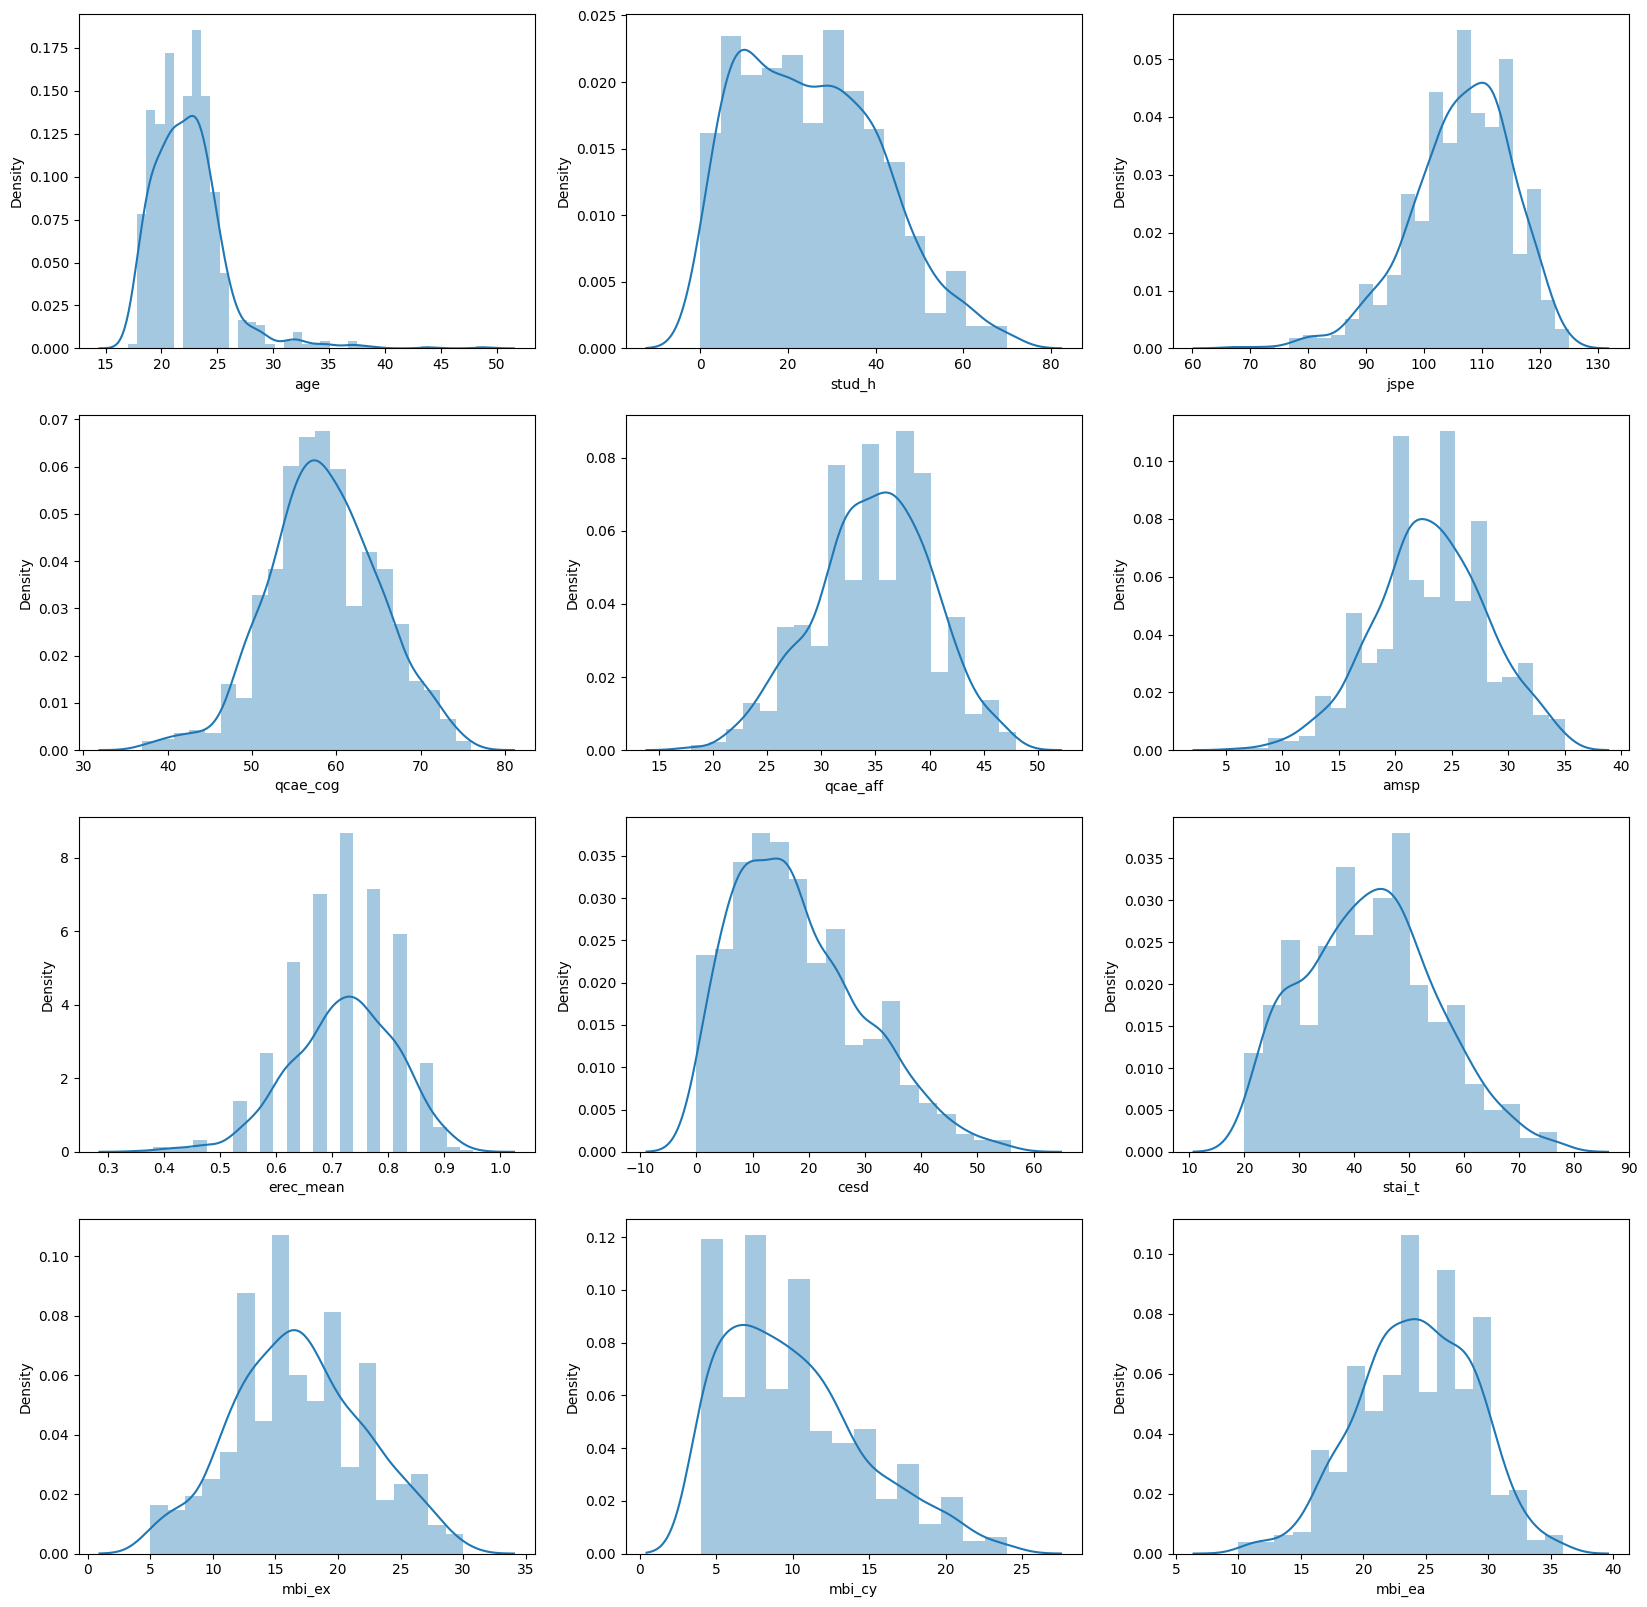

In [ ]:
# Plotting the distribution of each numerical variable using Seaborn
# Set the figure size
plt.figure(figsize=(20, 20))

for i, col in enumerate(df_num.columns):
    plt.subplot(4, 3, i+1)
    sns.distplot(df_num[col])
    plt.xlabel(col)
    plt.ylabel('Density')

plt.show()


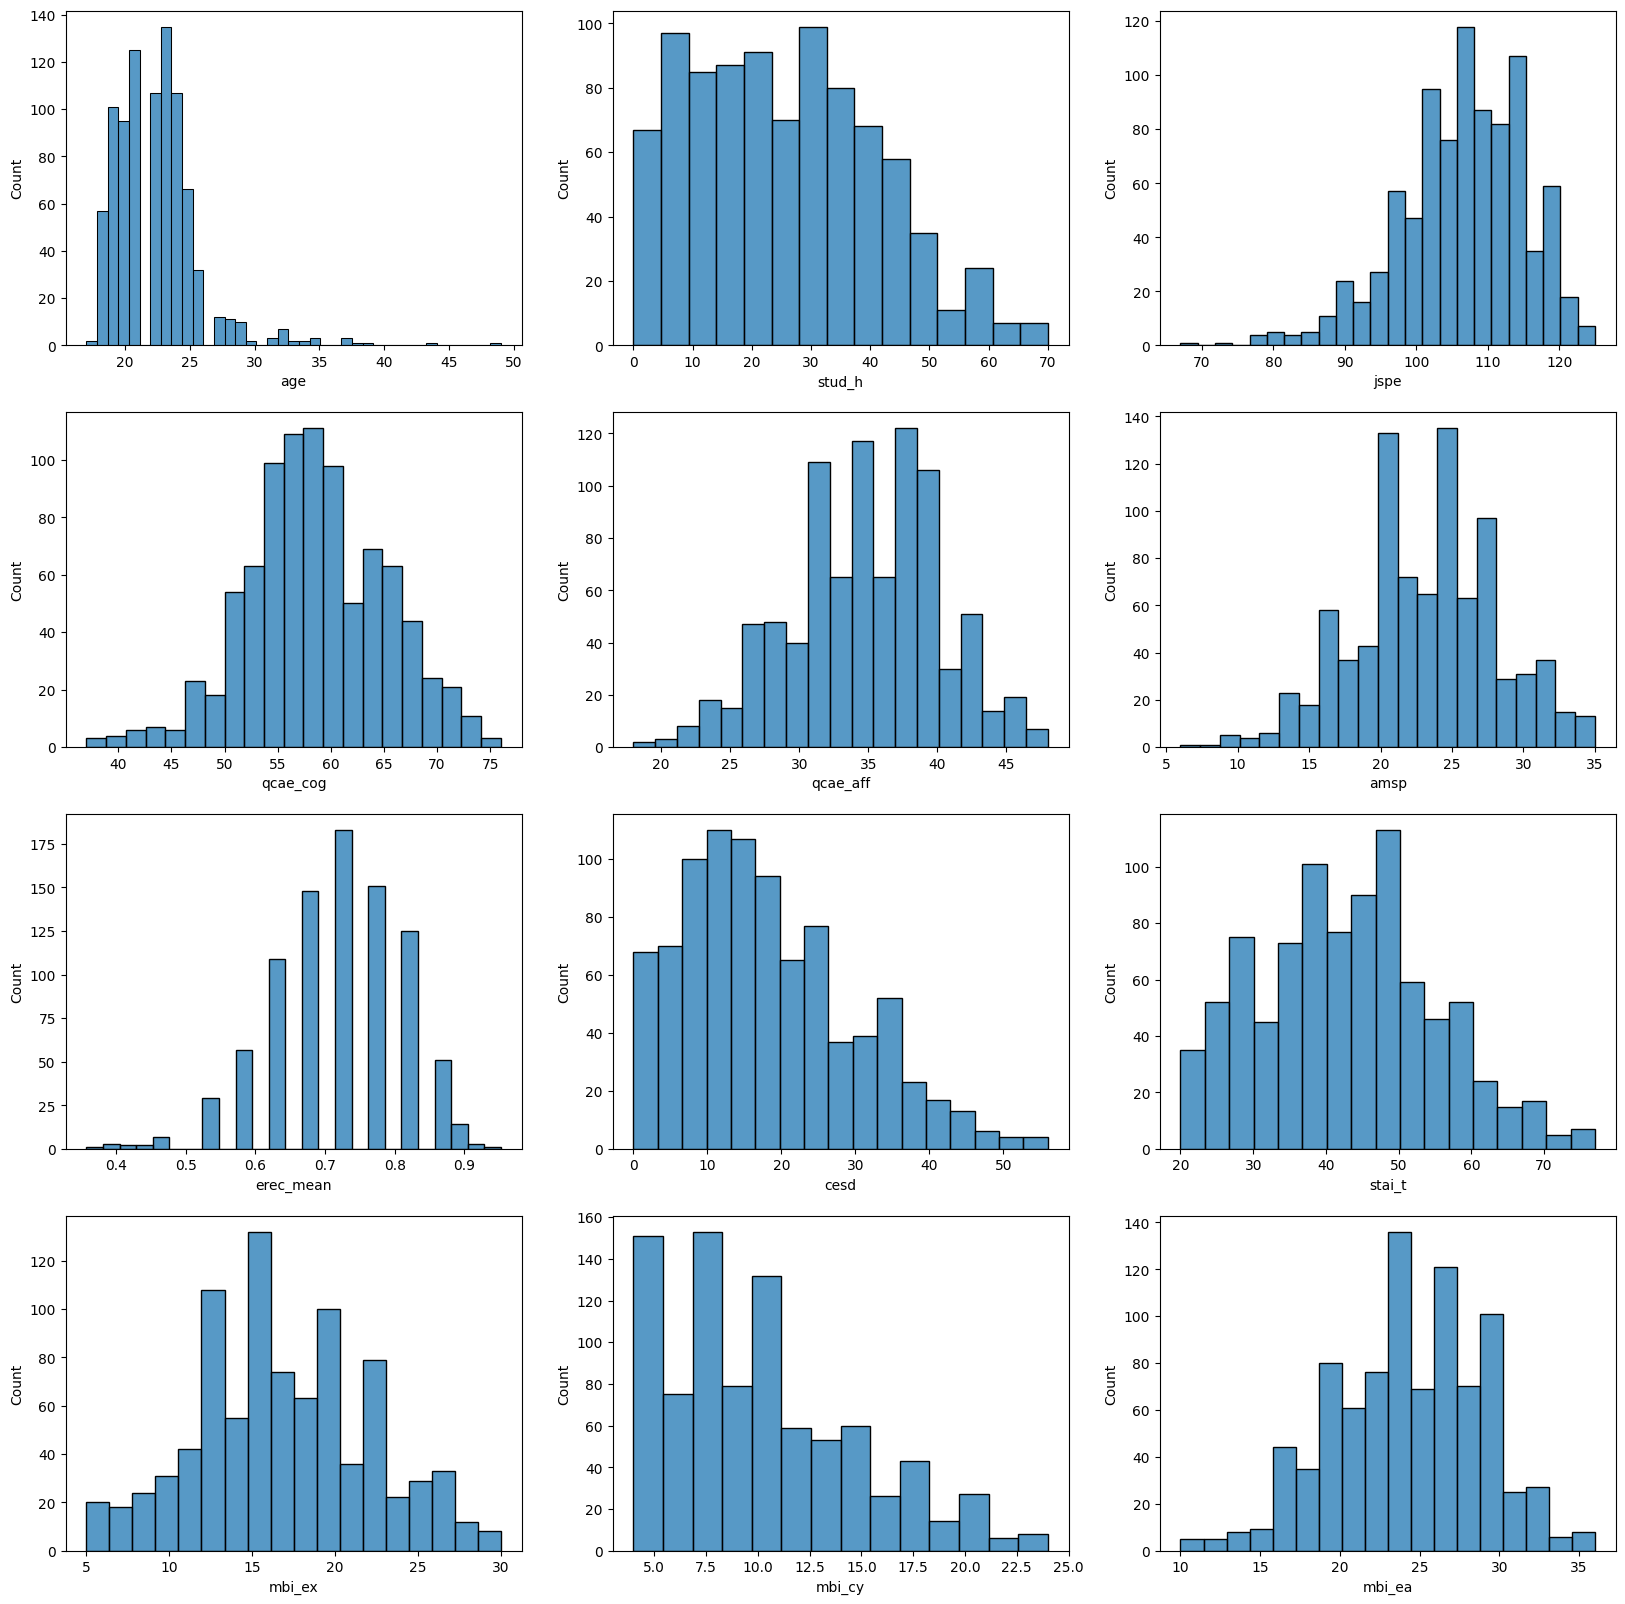

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 20))

for i, col in enumerate(df_num.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df_num[col], kde=False)  # Set kde=False to plot count instead of density
    plt.xlabel(col)
    plt.ylabel('Count')

plt.show()

In [ ]:
'''visualizing the probability density function (PDF) of the data distribution. 
The density represents the relative likelihood of a value occurring within a specific range or interval'''

'visualizing the probability density function (PDF) of the data distribution. \nThe density represents the relative likelihood of a value occurring within a specific range or interval'

In [ ]:
# Correlation matrix using Pearson's correlation coefficient (r) and p-value (p) to determine the statistical significance
corr_matrix = df_num.corr(method='pearson')
corr_matrix

age      jspe  qcae_cog  qcae_aff      amsp  erec_mean  \
age        1.000000  0.223221  0.059355 -0.008130  0.000477  -0.018699   
jspe       0.223221  1.000000  0.342668  0.263384  0.099395   0.097062   
qcae_cog   0.059355  0.342668  1.000000  0.258696  0.386682   0.073708   
qcae_aff  -0.008130  0.263384  0.258696  1.000000 -0.071391   0.141379   
amsp       0.000477  0.099395  0.386682 -0.071391  1.000000   0.002780   
erec_mean -0.018699  0.097062  0.073708  0.141379  0.002780   1.000000   
cesd      -0.139106 -0.080058 -0.034244  0.250947 -0.152052   0.029881   
stai_t    -0.081893 -0.075036 -0.077868  0.331350 -0.249231   0.037688   
mbi_ex    -0.182733 -0.040542 -0.023630  0.215886 -0.073011   0.015348   
mbi_cy    -0.001853 -0.006981 -0.024820  0.128488 -0.029343   0.061965   
mbi_ea     0.046130  0.082508  0.184096 -0.113891  0.220616  -0.034889   

               cesd    stai_t    mbi_ex    mbi_cy    mbi_ea  
age       -0.139106 -0.081893 -0.182733 -0.001853  0.046130  
jspe      -0.080058 -0.075036 -0.040542 -0.006981  0.082508  
qcae_cog  -0.034244 -0.077868 -0.023630 -0.024820  0.184096  
qcae_aff   0.250947  0.331350  0.215886  0.128488 -0.113891  
amsp      -0.152052 -0.249231 -0.073011 -0.029343  0.220616  
erec_mean  0.029881  0.037688  0.015348  0.061965 -0.034889  
cesd       1.000000  0.715728  0.605617  0.407727 -0.453589  
stai_t     0.715728  1.000000  0.530486  0.331884 -0.462535  
mbi_ex     0.605617  0.530486  1.000000  0.505200 -0.480821  
mbi_cy     0.407727  0.331884  0.505200  1.000000 -0.565939  
mbi_ea    -0.453589 -0.462535 -0.480821 -0.565939  1.000000

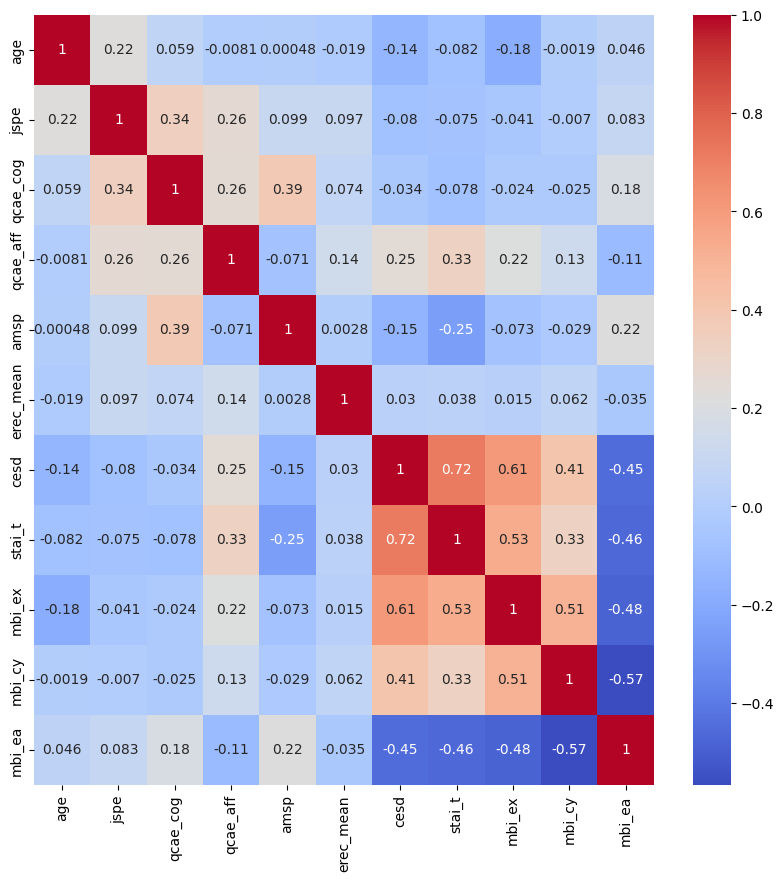

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Calculate correlation matrix
corr = df.corr()

# Set correlations equal to 1 to NaN
corr = corr.mask(corr == 1.0)

# Unstack the correlation matrix to get a Series of unique correlation values
unique_corr = corr.unstack()

# Remove duplicates by dropping correlations with the same pairs but in swapped order
unique_corr = unique_corr[~unique_corr.index.duplicated(keep='first')]

# Get top 10 highest correlations
top10 = unique_corr.sort_values(ascending=False).head(30)

# Get top 10 lowest correlations 
bottom10 = unique_corr.sort_values().head(30)

print('Top 10 Highest Correlations (excluding corr = 1 and duplicates):')
print(top10)

print('\nTop 10 Lowest Correlations (excluding duplicates):')
print(bottom10)


Top 10 Highest Correlations (excluding corr = 1 and duplicates):
stai_t    cesd        0.715728
cesd      stai_t      0.715728
mbi_ex    cesd        0.605617
cesd      mbi_ex      0.605617
year      age         0.592530
age       year        0.592530
mbi_ex    stai_t      0.530486
stai_t    mbi_ex      0.530486
mbi_ex    mbi_cy      0.505200
mbi_cy    mbi_ex      0.505200
cesd      mbi_cy      0.407727
mbi_cy    cesd        0.407727
amsp      qcae_cog    0.386682
qcae_cog  amsp        0.386682
qcae_aff  sex         0.358691
sex       qcae_aff    0.358691
qcae_cog  jspe        0.342668
jspe      qcae_cog    0.342668
mbi_cy    stai_t      0.331884
stai_t    mbi_cy      0.331884
          qcae_aff    0.331350
qcae_aff  stai_t      0.331350
jspe      year        0.301176
year      jspe        0.301176
stai_t    psyt        0.293282
psyt      stai_t      0.293282
cesd      psyt        0.268491
psyt      cesd        0.268491
jspe      qcae_aff    0.263384
qcae_aff  jspe        0.263384
dtype

In [ ]:
# Get a dataframe of the most to least correlated variables
corr_matrix = corr_matrix.unstack().reset_index()
corr_matrix.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_matrix = corr_matrix[corr_matrix['Variable 1'] != corr_matrix['Variable 2']]
corr_matrix = corr_matrix.sort_values(by='Correlation', ascending=False)
corr_matrix

Variable 1 Variable 2  Correlation
73        cesd     stai_t     0.715728
83      stai_t       cesd     0.715728
74        cesd     mbi_ex     0.605617
94      mbi_ex       cesd     0.605617
85      stai_t     mbi_ex     0.530486
..         ...        ...          ...
117     mbi_ea     stai_t    -0.462535
118     mbi_ea     mbi_ex    -0.480821
98      mbi_ex     mbi_ea    -0.480821
109     mbi_cy     mbi_ea    -0.565939
119     mbi_ea     mbi_cy    -0.565939

[110 rows x 3 columns]

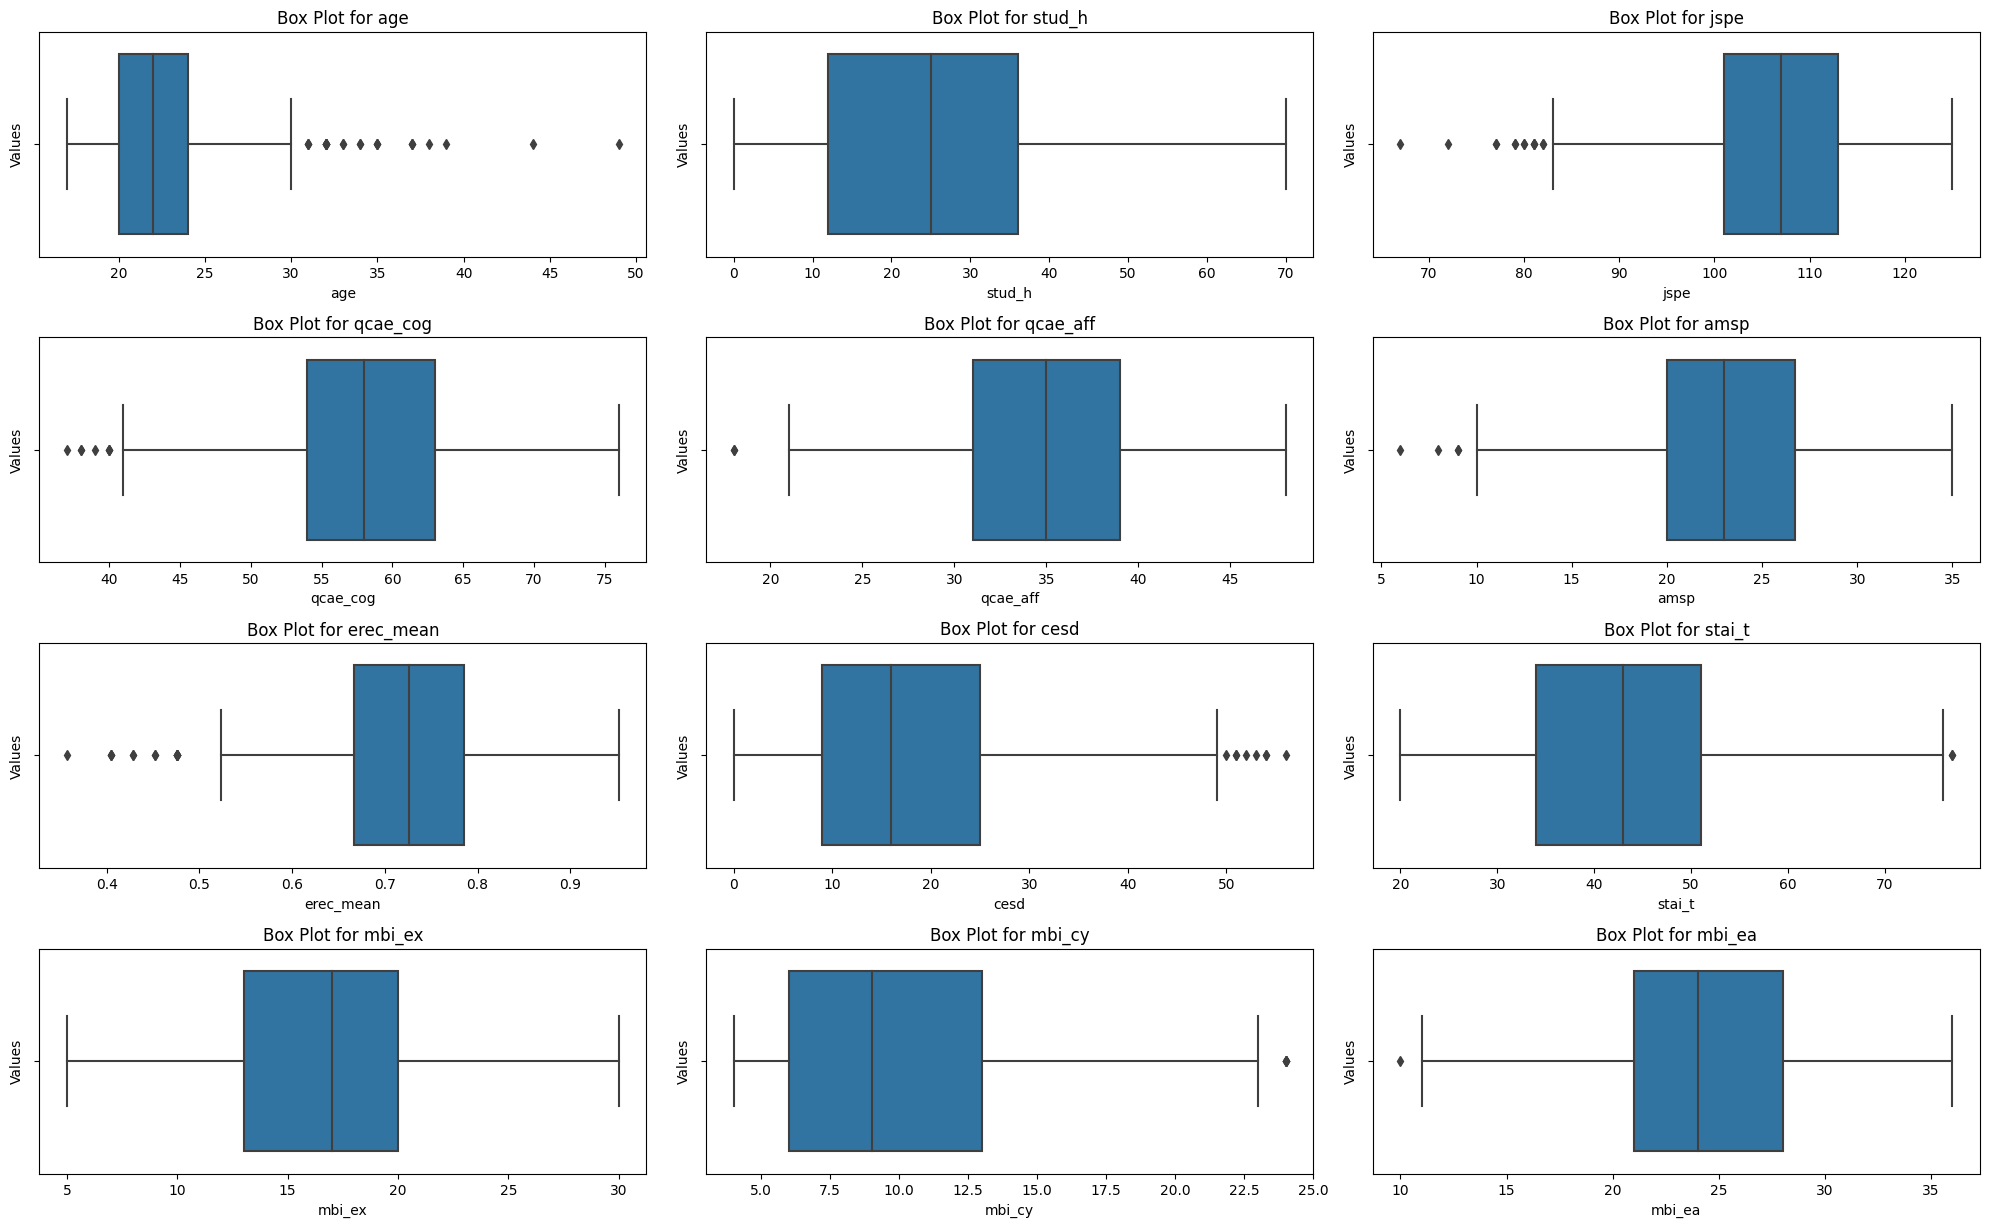

In [ ]:
# Split the columns into 5 groups for plotting
num_plots_per_figure = 3
num_figures = len(df_num.columns) // num_plots_per_figure + 1
column_groups = [df_num.columns[i:i + num_plots_per_figure] for i in range(0, len(df_num.columns), num_plots_per_figure)]

# Set the figure size
fig, axes = plt.subplots(nrows=num_figures, ncols=num_plots_per_figure, figsize=(20, 15))

# Plot box plots for each column group in separate figures
for fig_idx, col_group in enumerate(column_groups):
    for i, col in enumerate(col_group):
        ax = axes[fig_idx, i] if num_figures > 1 else axes[i]
        sns.boxplot(x=df_num[col], ax=ax)
        ax.set_title(f"Box Plot for {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Values")

# Hide empty subplots and adjust layout
for i in range(len(df_num.columns), num_figures * num_plots_per_figure):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [ ]:
cat_columns = ['sex', 'year', 'part', 'job', 'health', 'psyt']

In [ ]:
num_columns = ['stud_h', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean',
       'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']

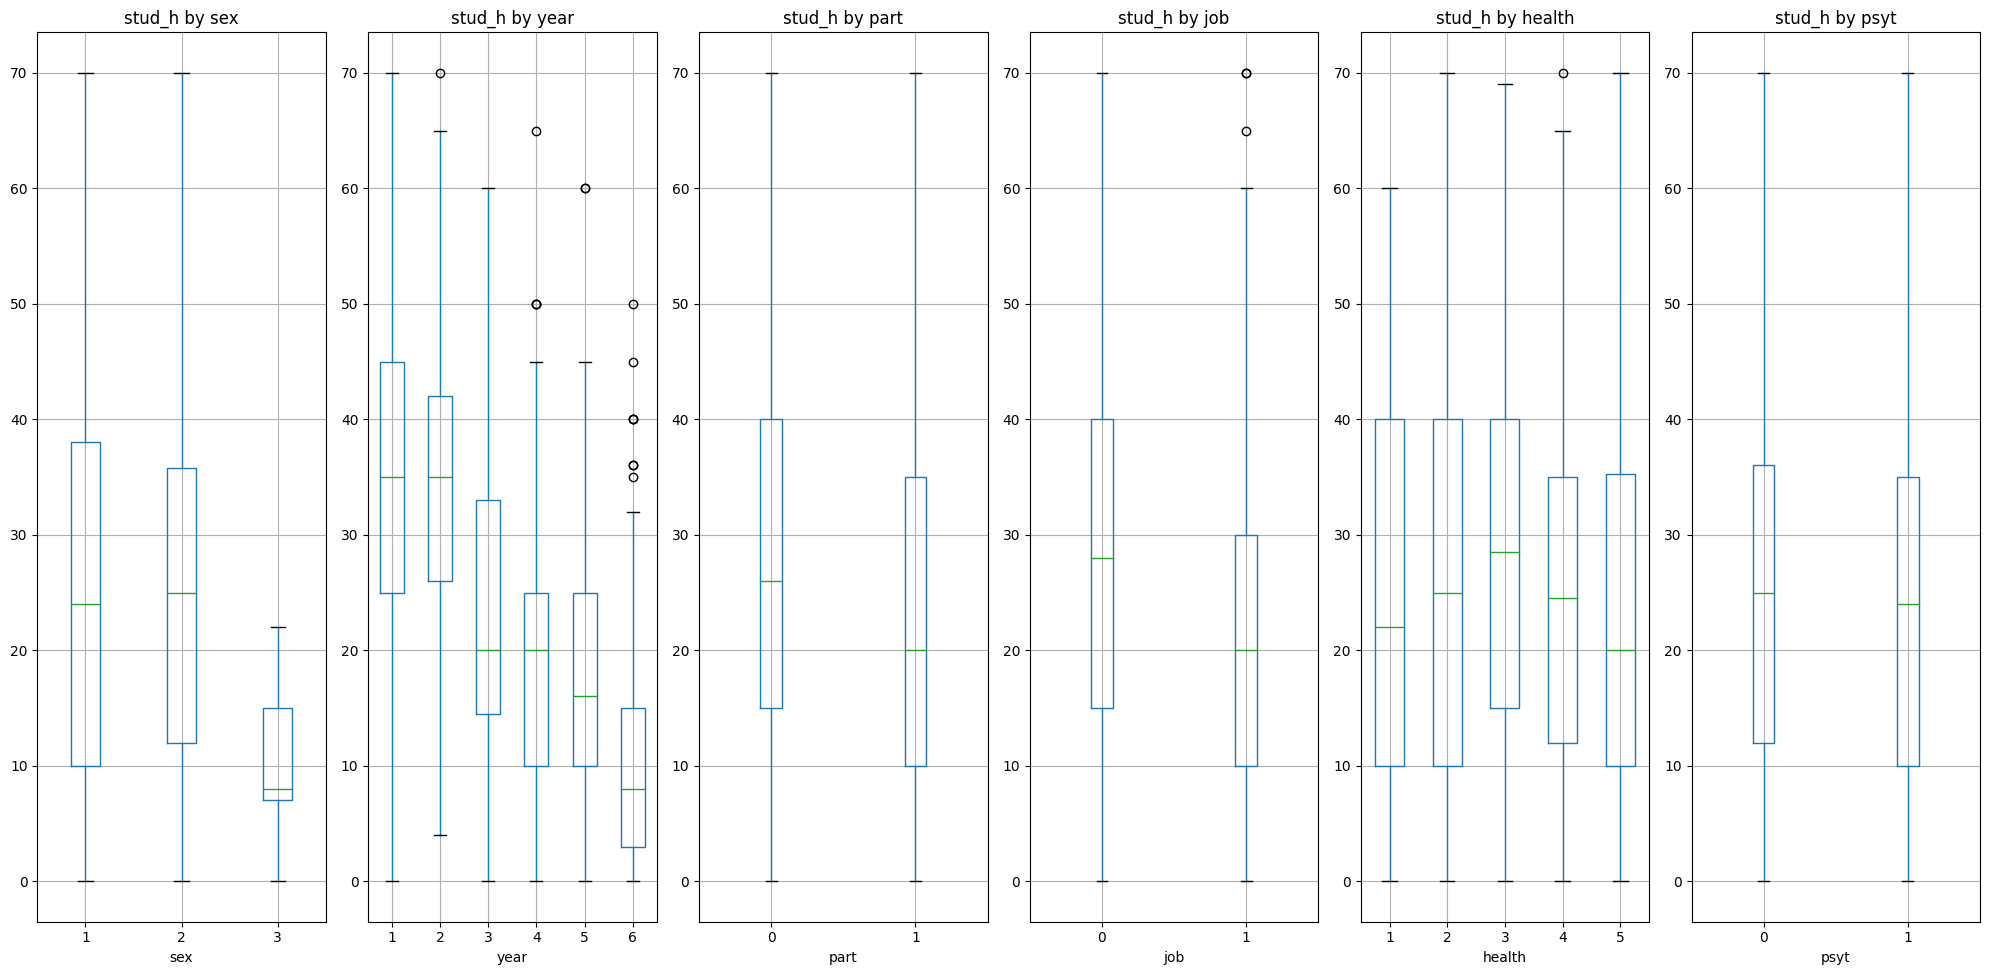

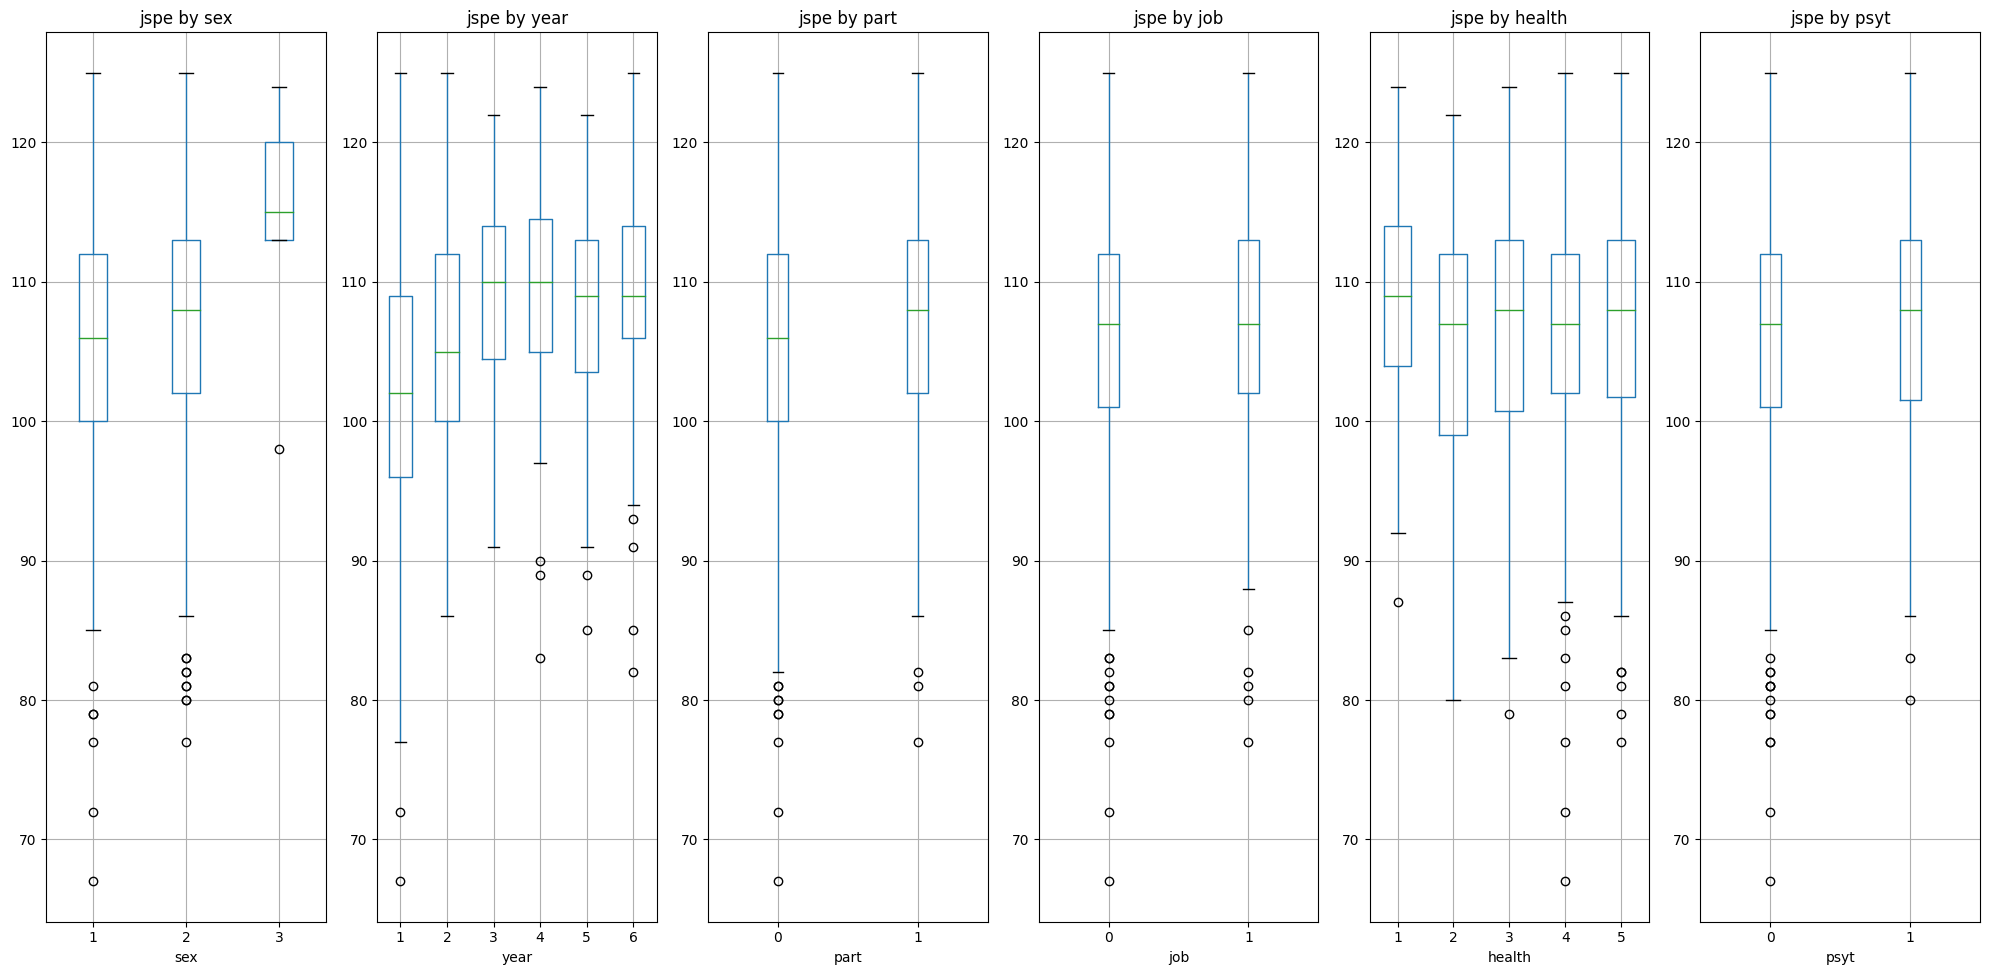

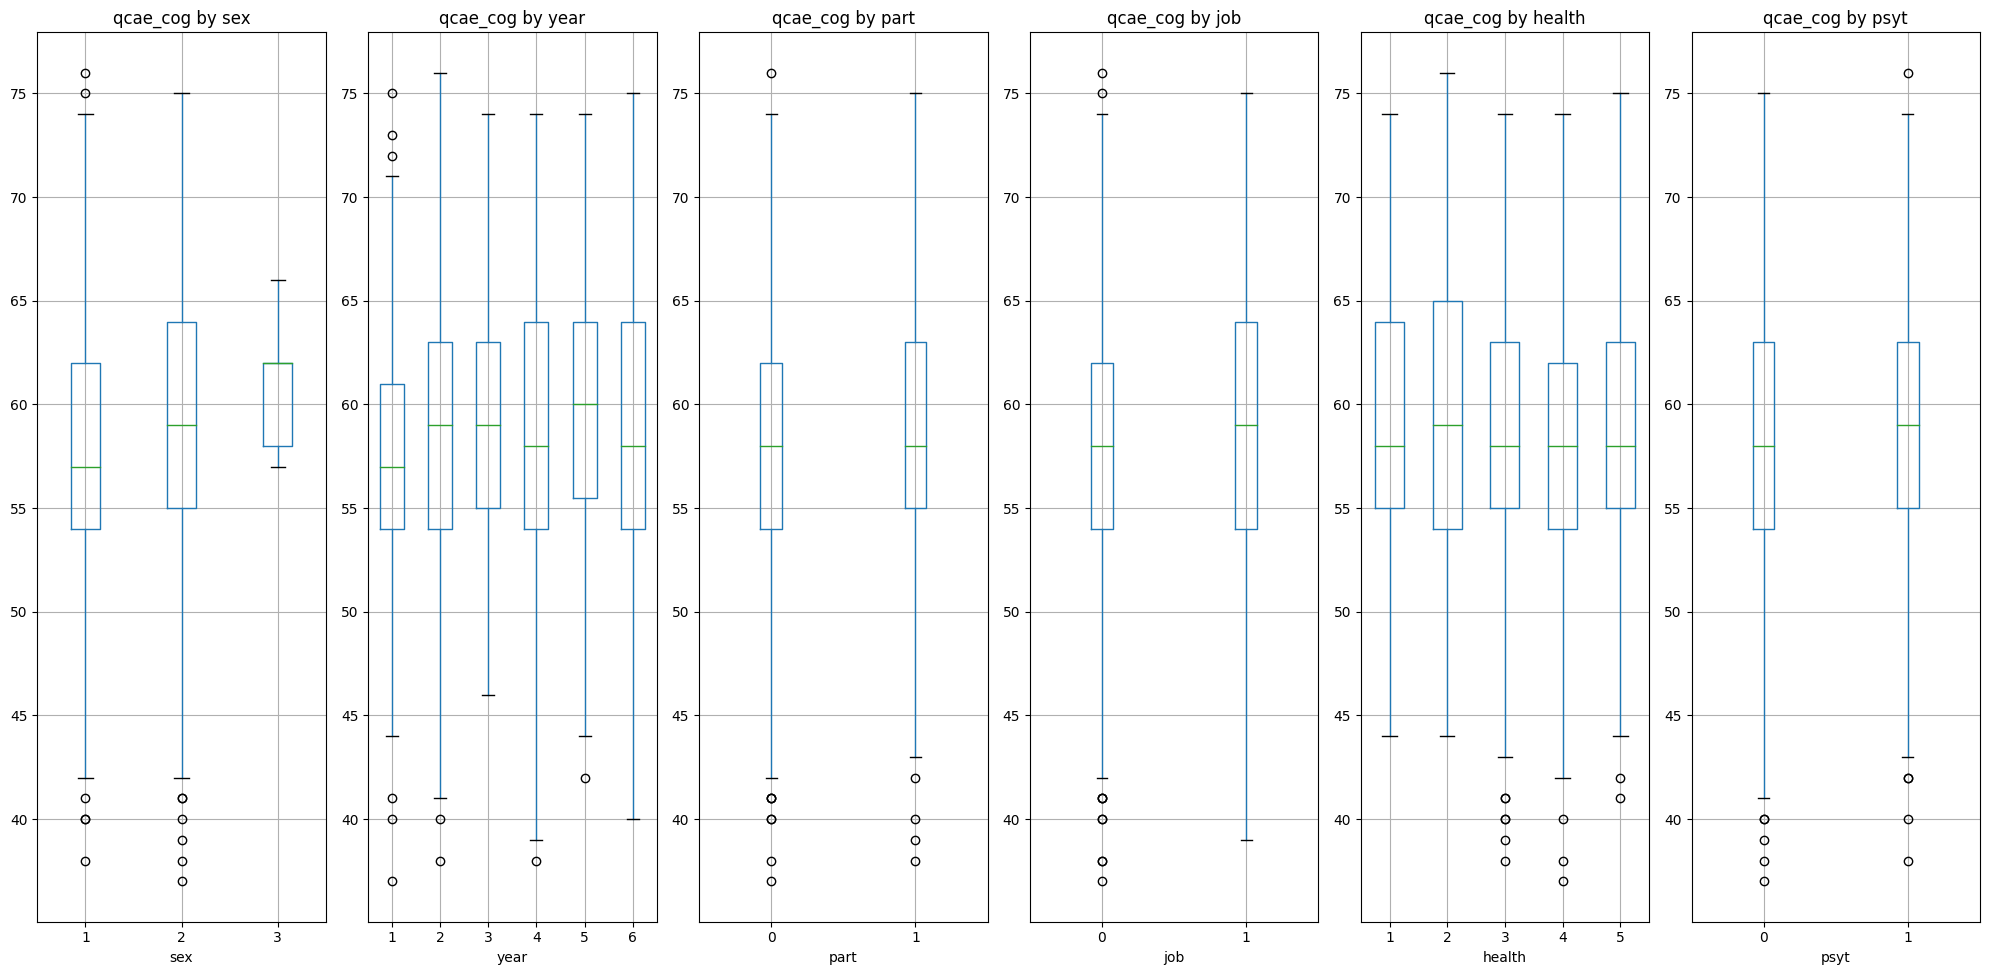

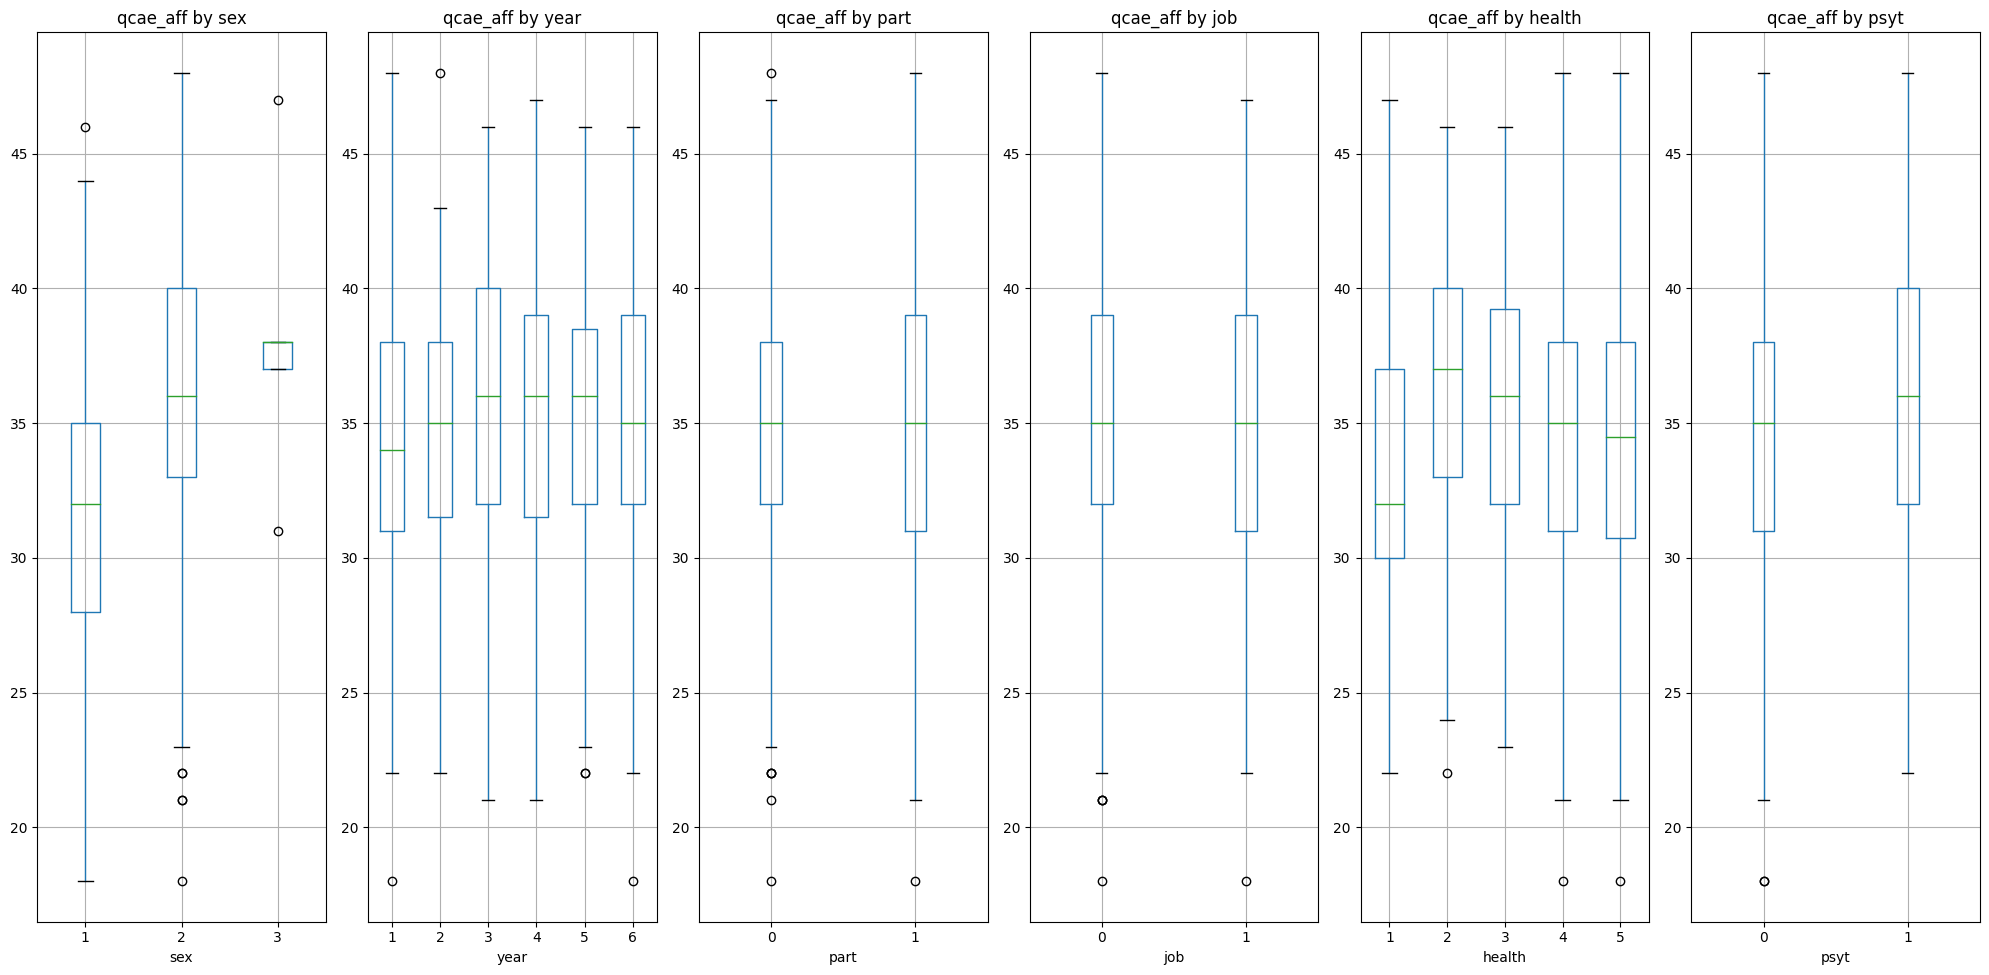

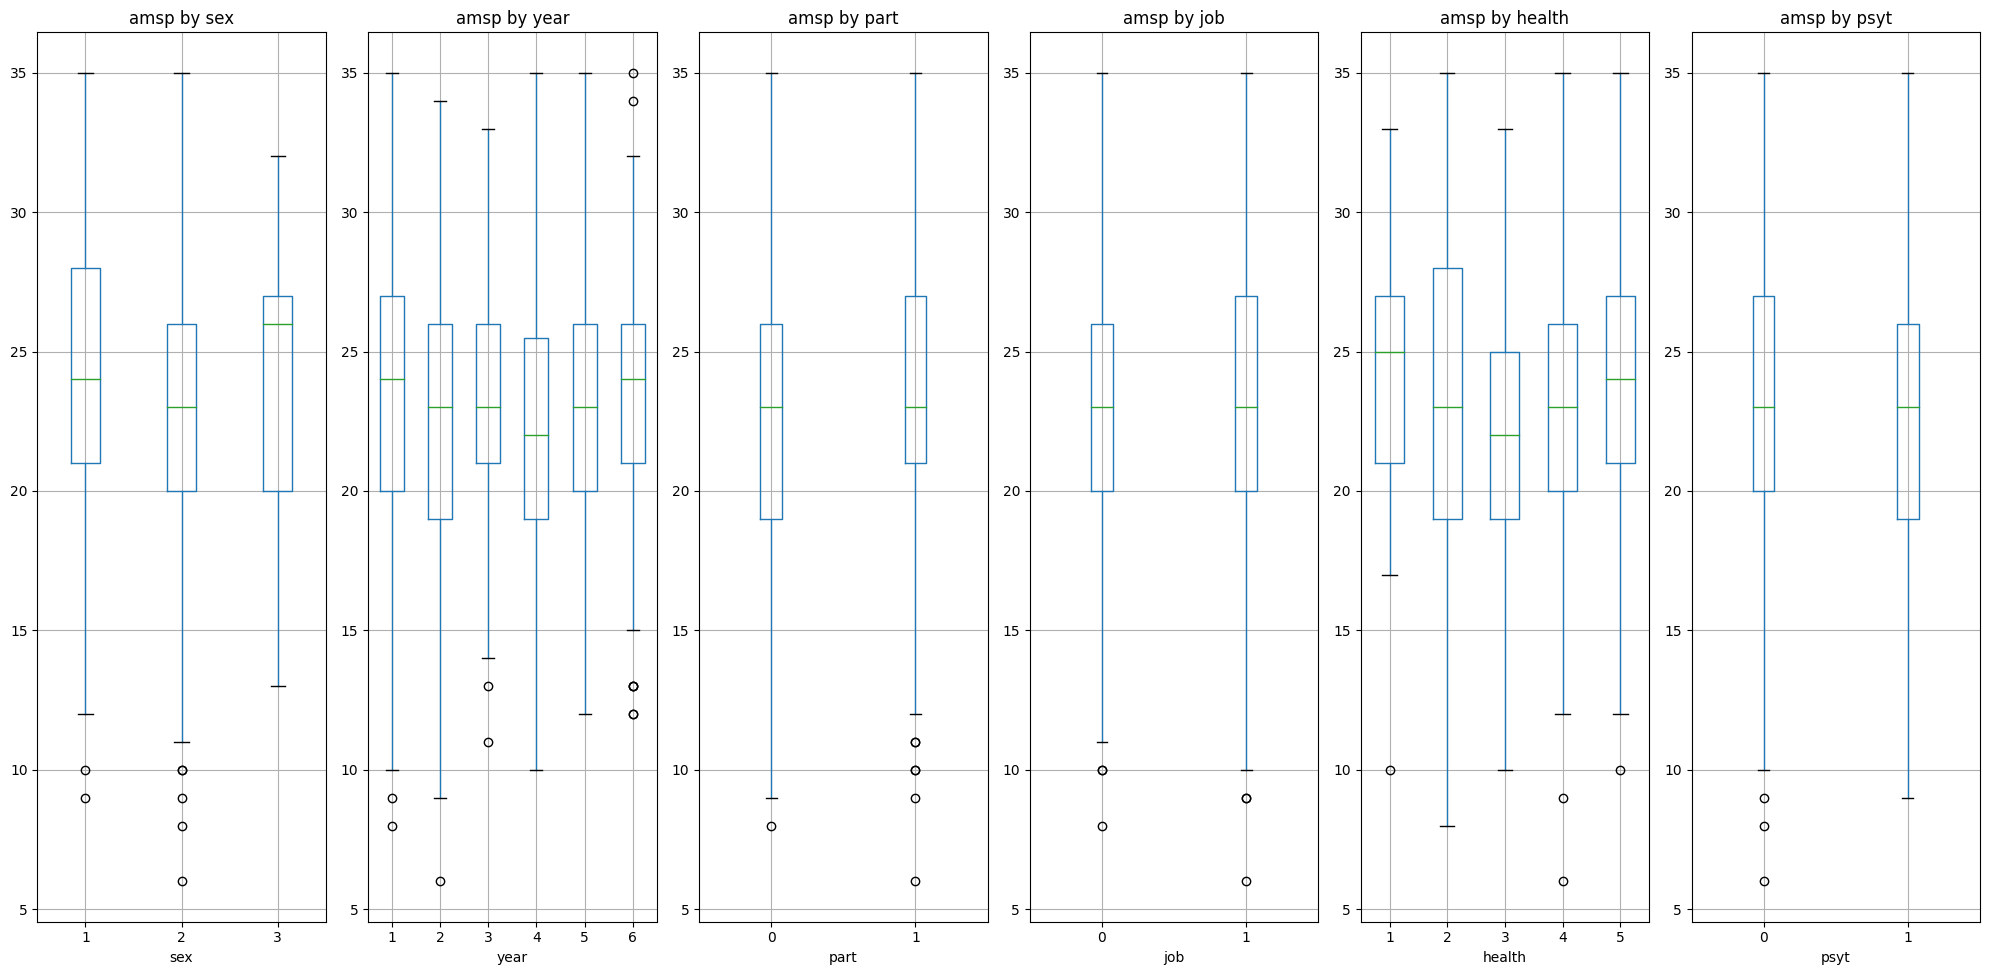

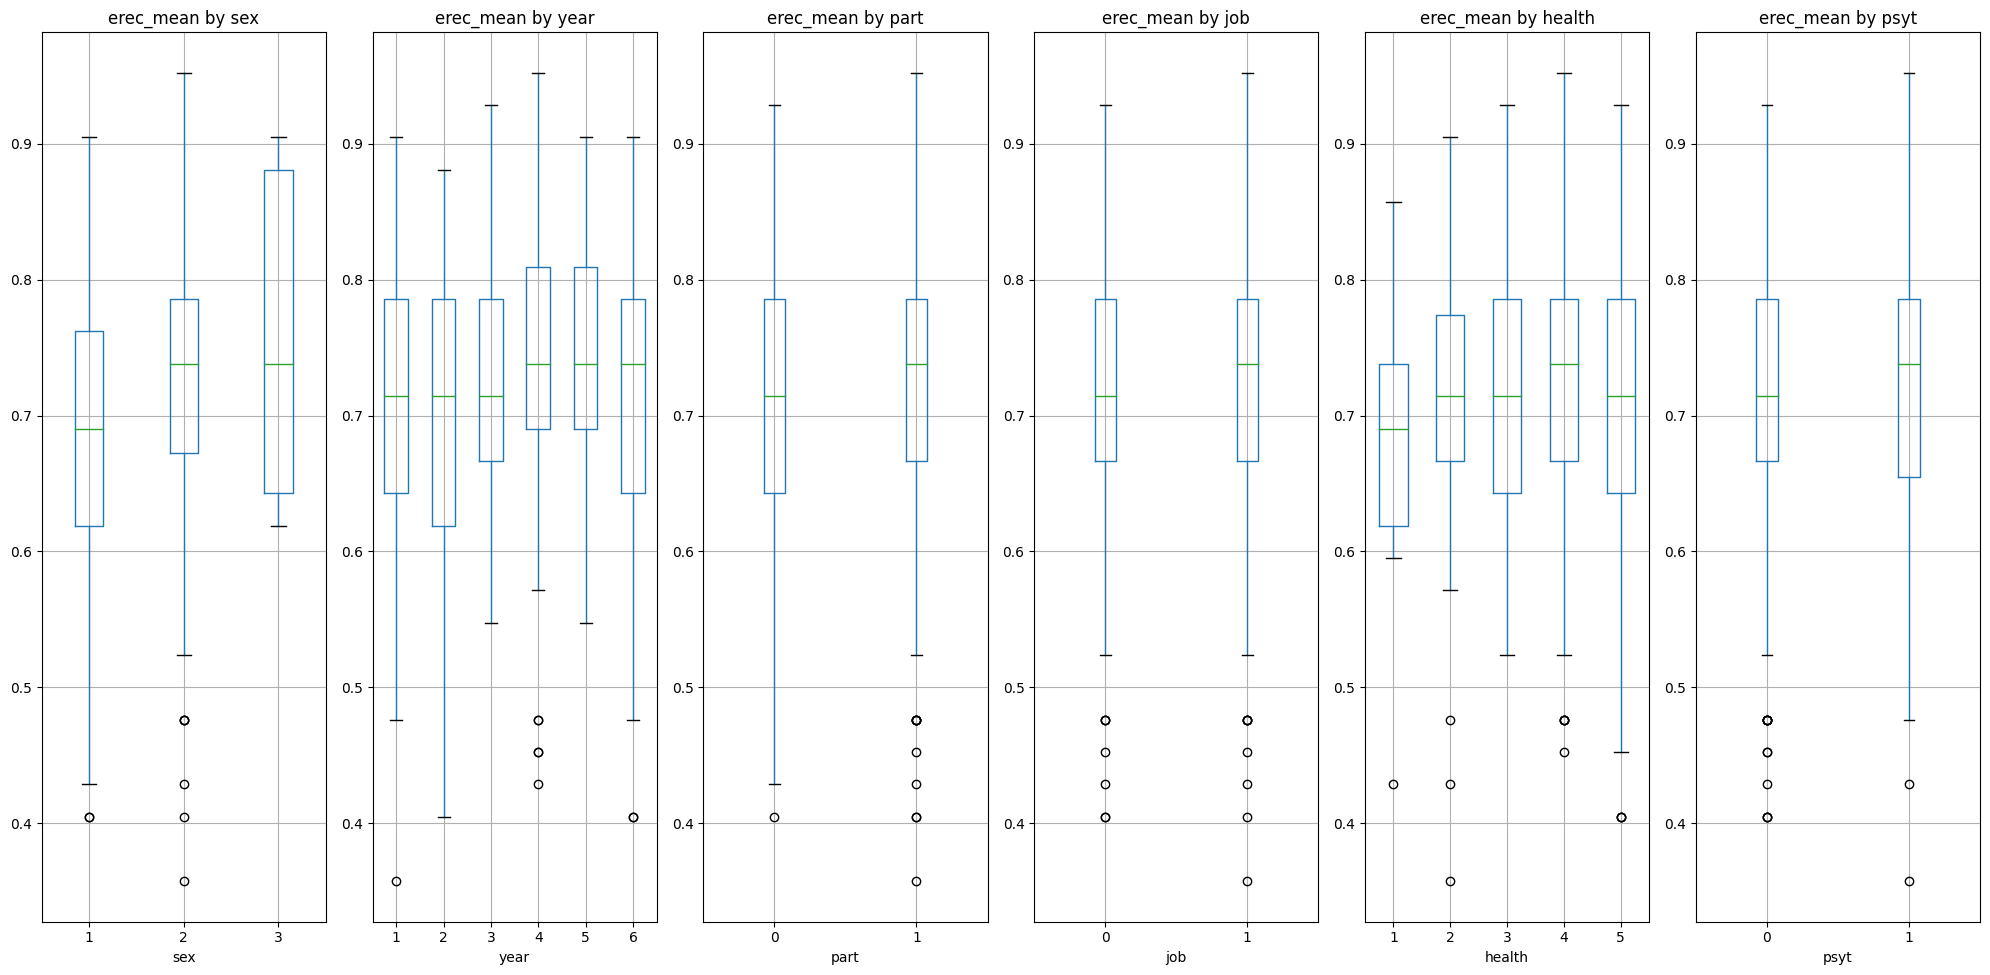

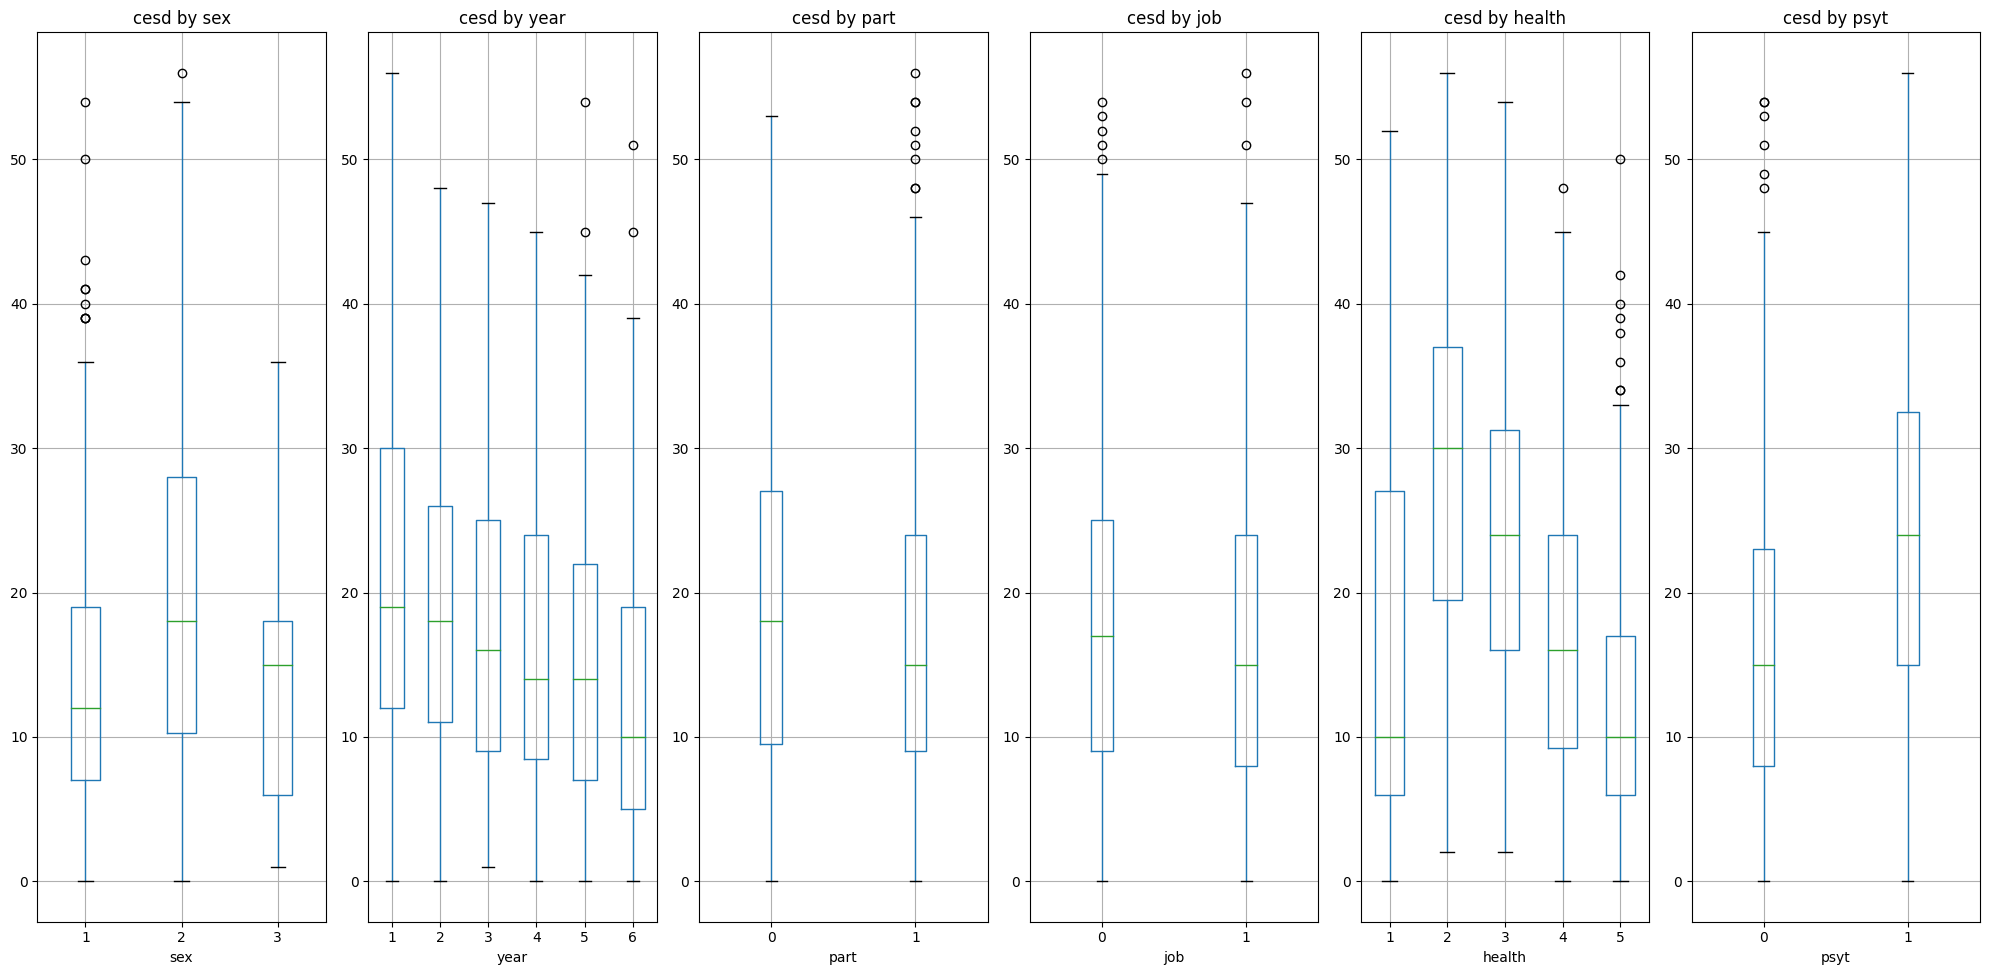

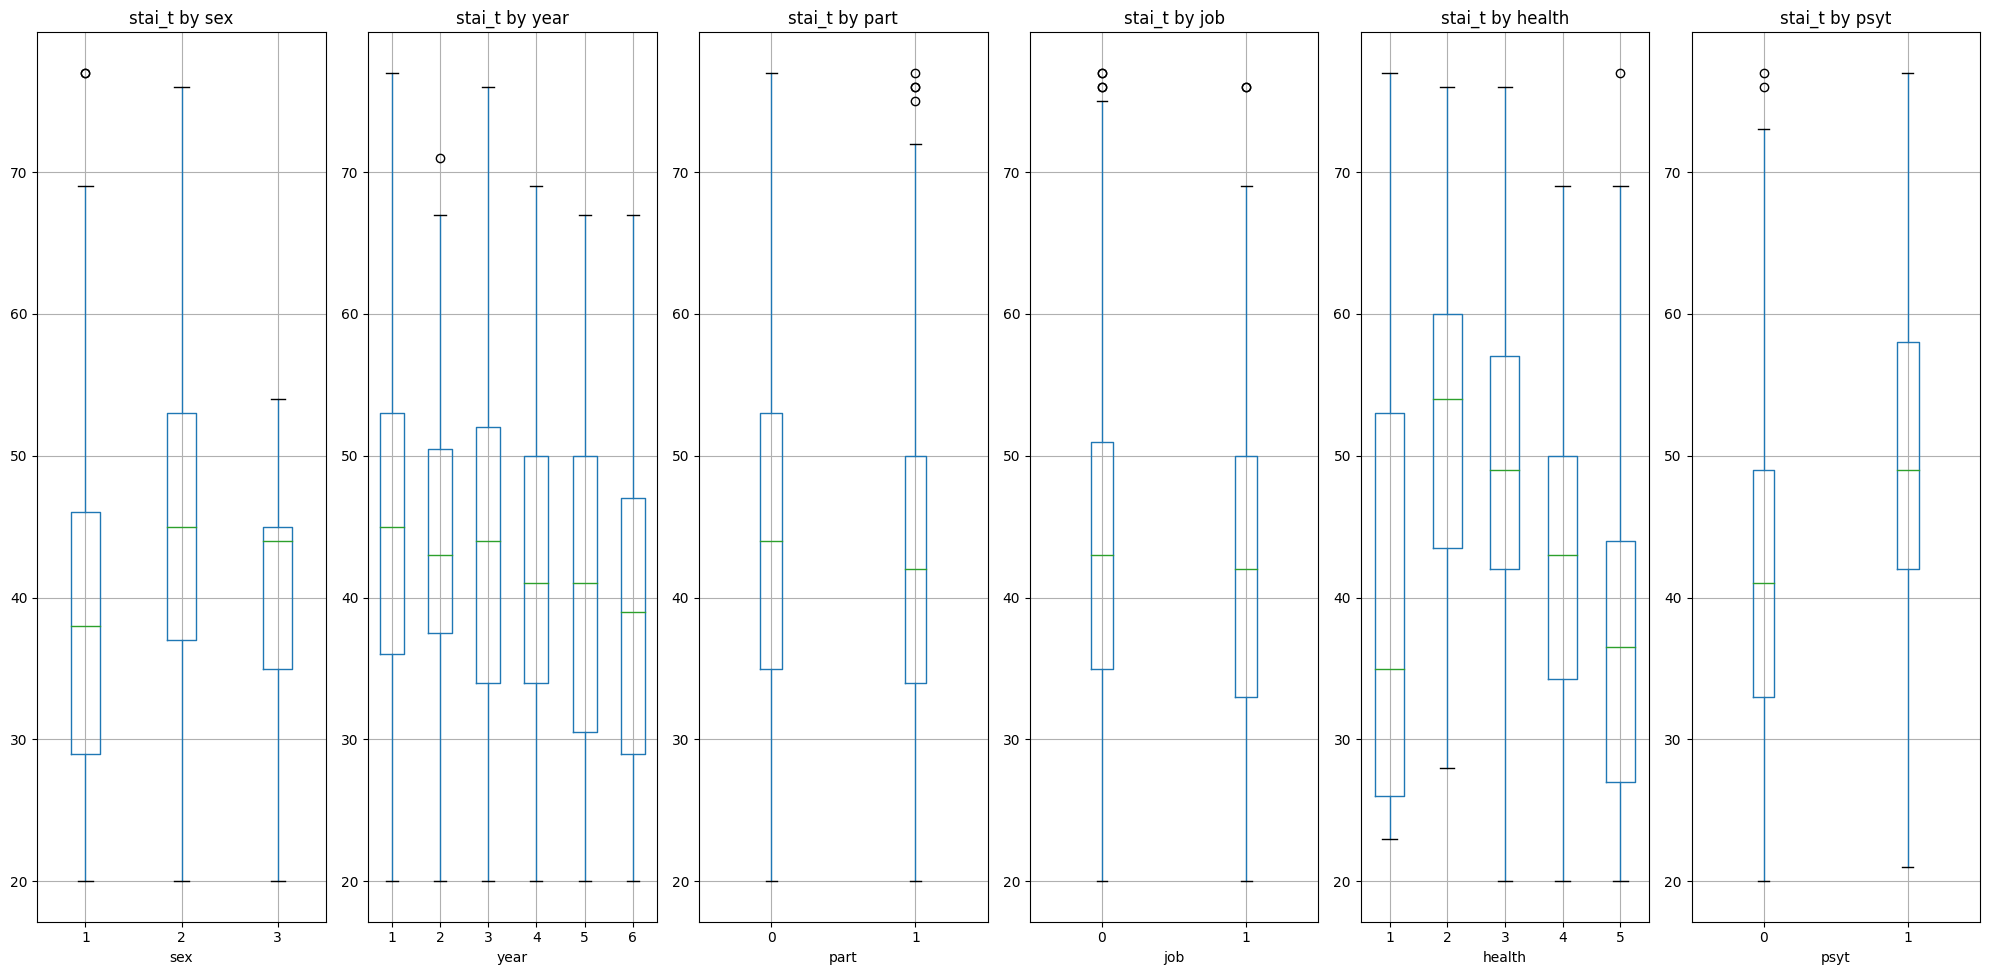

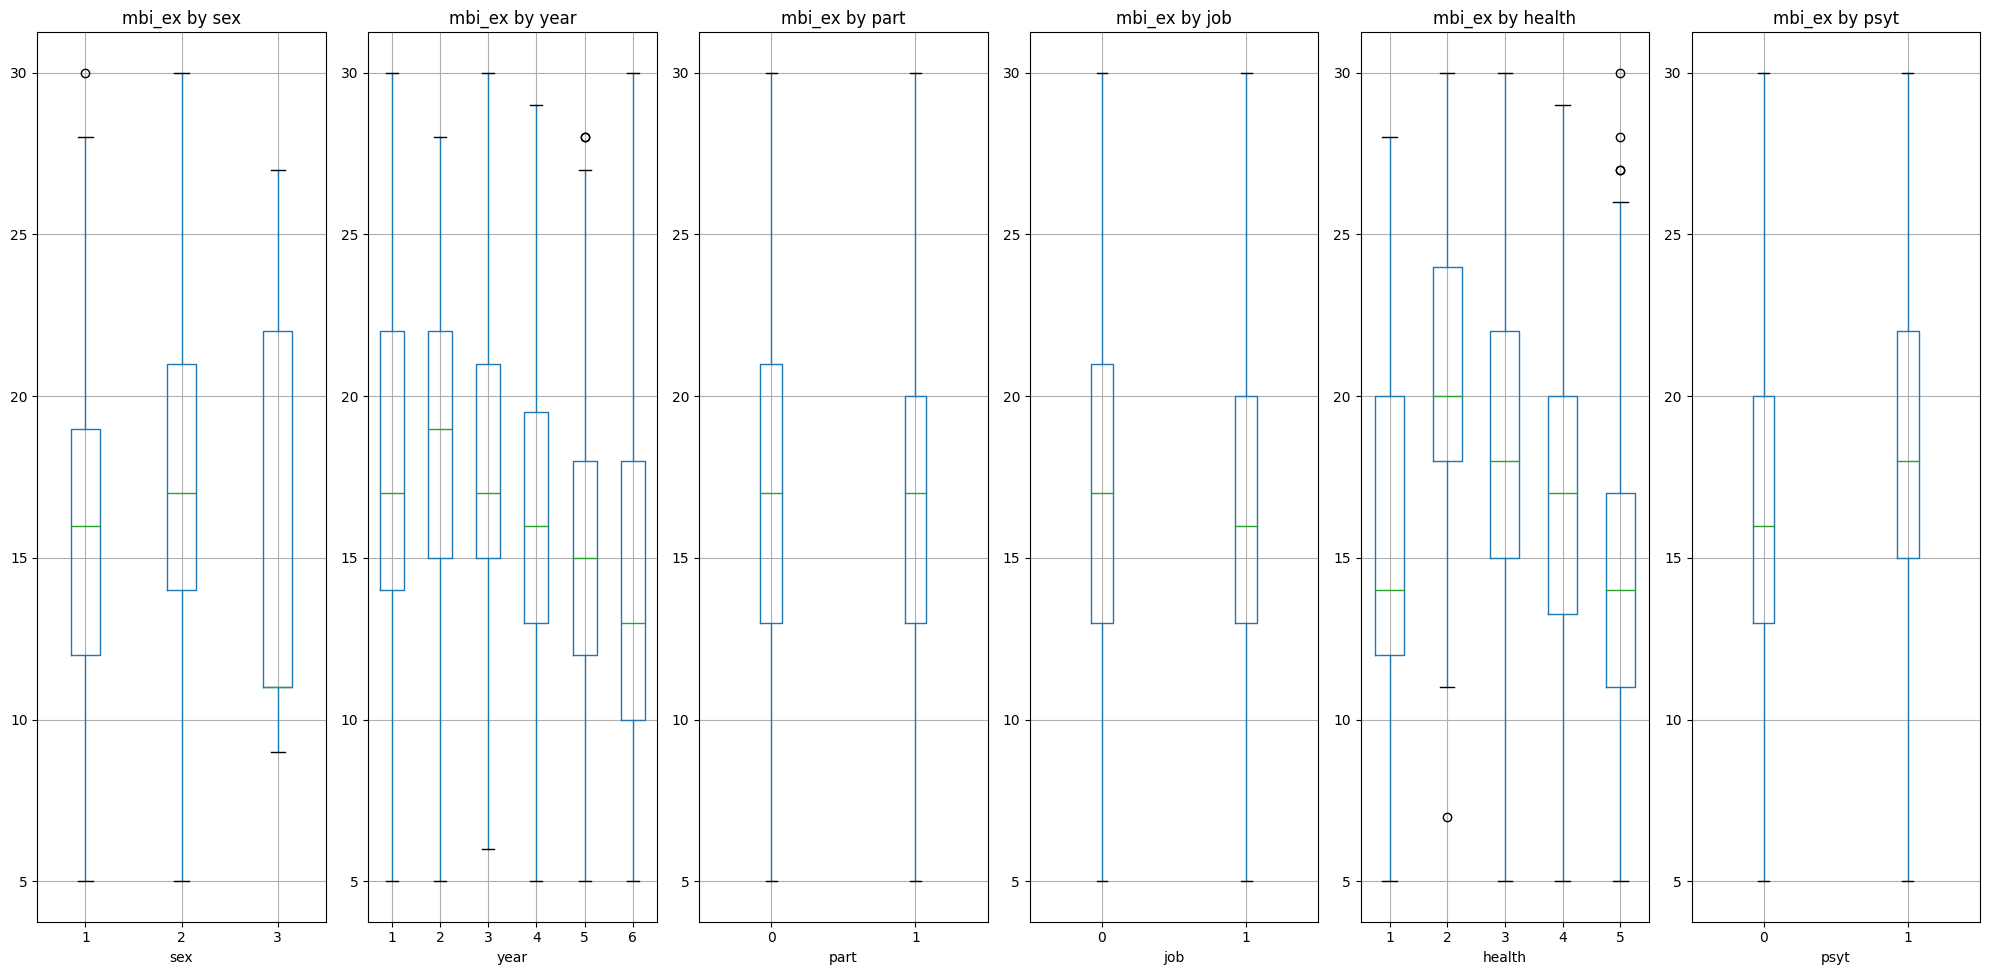

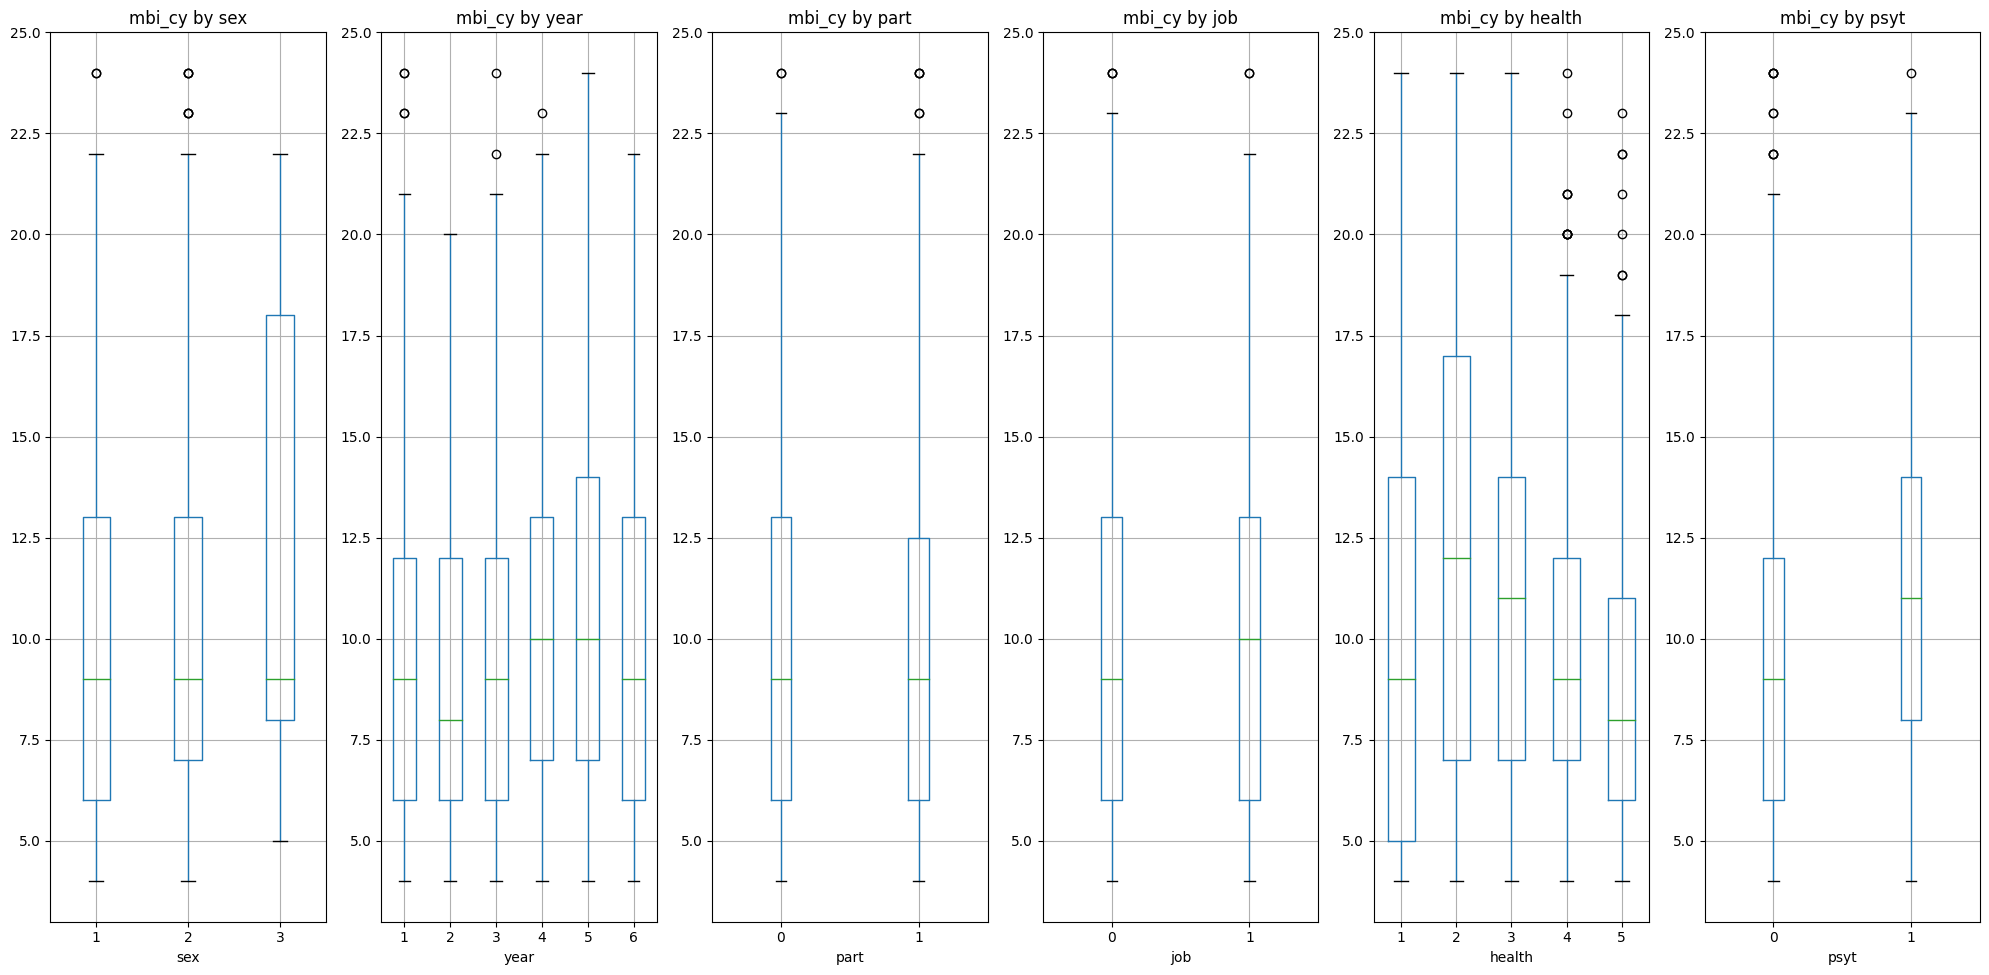

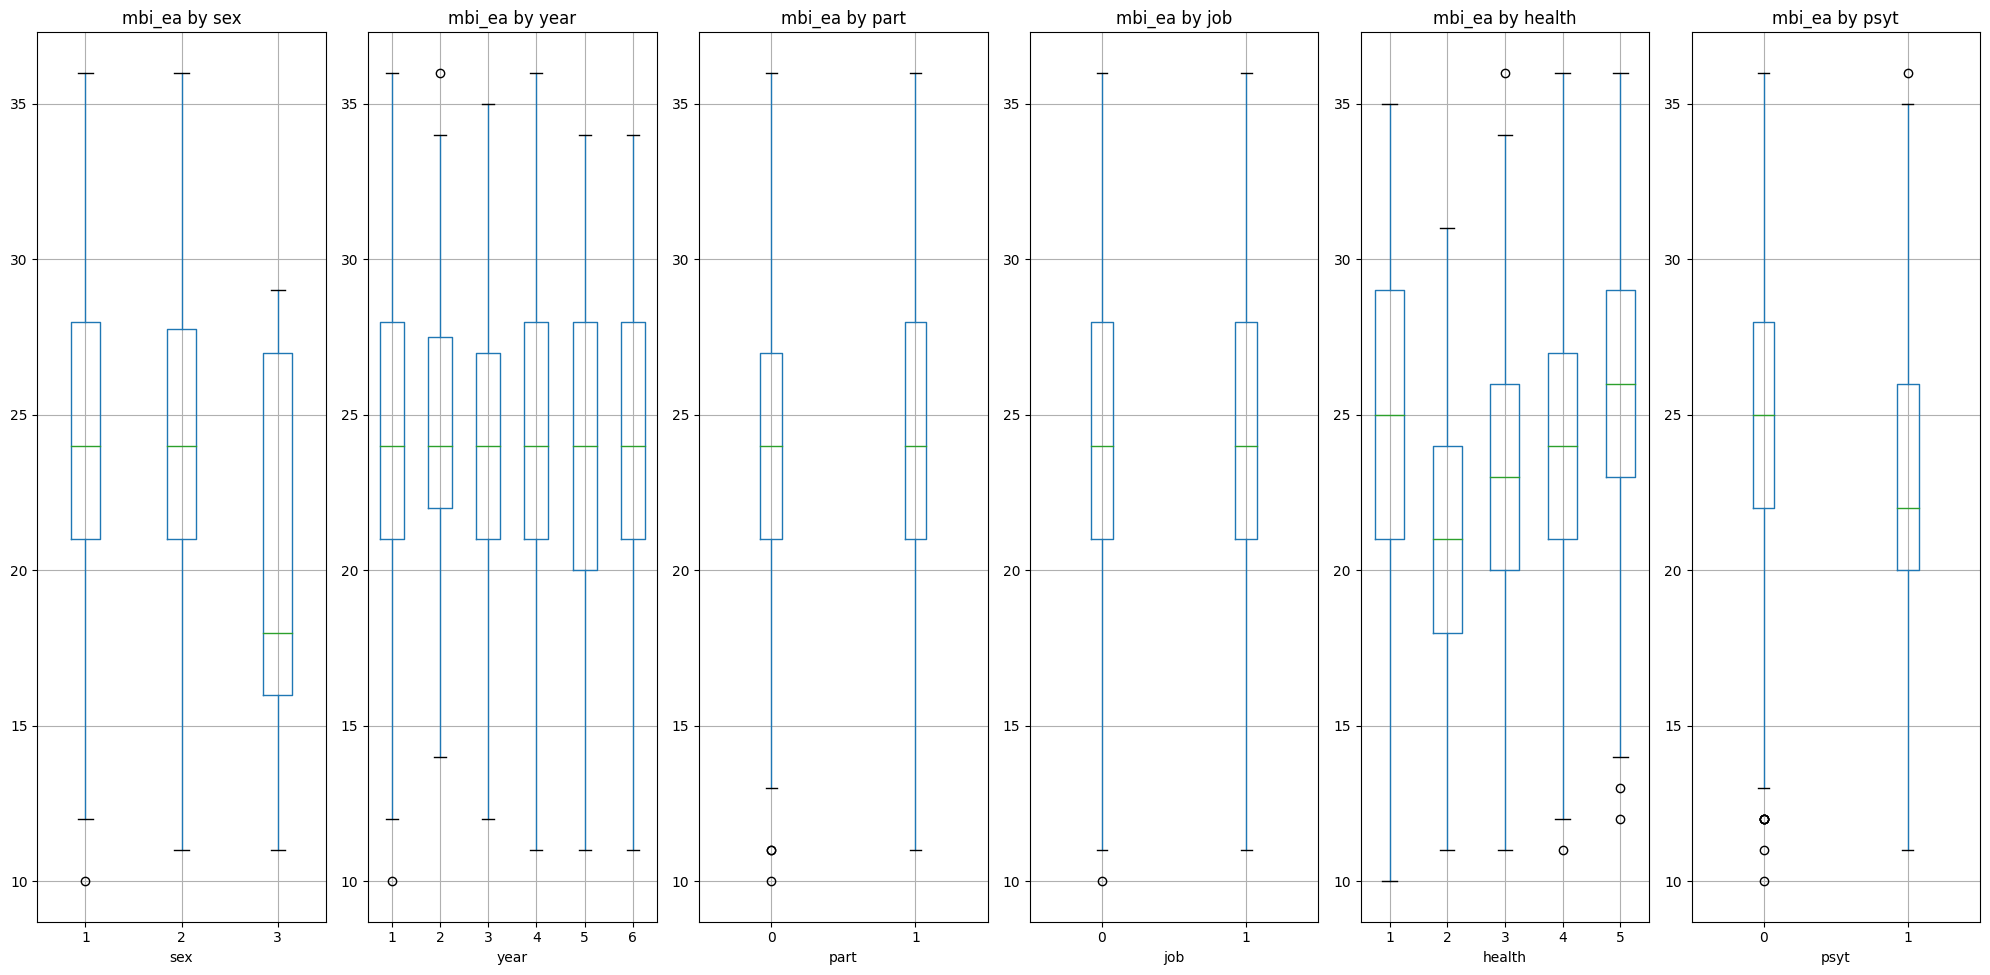

In [ ]:
# Create box plots for each numerical column (except 'age') with different categorical columns
for num_col in num_columns:
    plt.figure(figsize=(20, 10))
    for i, cat_col in enumerate(cat_columns):
        plt.subplot(1, len(cat_columns), i + 1)
        df.boxplot(column=num_col, by=cat_col, ax=plt.gca())
        plt.title(f"{num_col} by {cat_col}")
        plt.suptitle("")  # Suppress pandas-generated title
        plt.tight_layout()
    plt.show()

Text(0, 0.5, 'QCAE Cognitive Score')

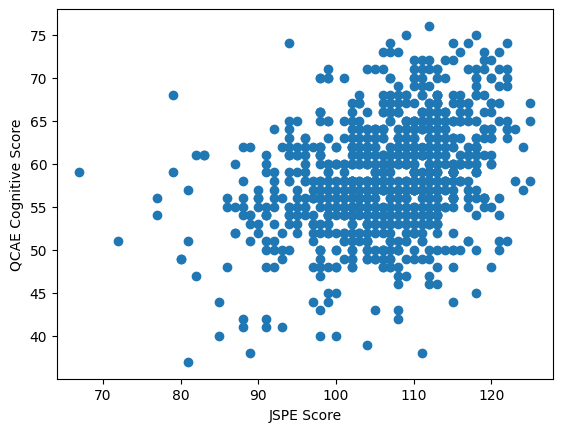

In [ ]:
'''plt.scatter(df['jspe'], df['qcae_cog'])
plt.xlabel('JSPE Score') 
plt.ylabel('QCAE Cognitive Score')'''

## Feature engineering - BournoutDepressionIndex

In [ ]:
# Load the data and store it in a pandas dataframe
df = pd.read_csv('Data2022.csv')
df

id  age  year  sex  glang  part  job  stud_h  health  psyt  jspe  \
0       2   18     1    1    120     1    0      56       3     0    88   
1       4   26     4    1      1     1    0      20       4     0   109   
2       9   21     3    2      1     0    0      36       3     0   106   
3      10   21     2    2      1     0    1      51       5     0   101   
4      13   21     3    1      1     1    0      22       4     0   102   
..    ...  ...   ...  ...    ...   ...  ...     ...     ...   ...   ...   
881  1781   21     2    1      1     1    0      45       3     0   106   
882  1785   20     2    2      1     0    0      13       3     0   113   
883  1787   19     1    1      1     0    0      50       5     0   100   
884  1789   24     5    2      1     0    0      20       2     1   120   
885  1790   22     3    1      1     0    1      20       5     0   102   

     qcae_cog  qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  
0          62        27    17   0.738095    34      61      17      13      20  
1          55        37    22   0.690476     7      33      14      11      26  
2          64        39    17   0.690476    25      73      24       7      23  
3          52        33    18   0.833333    17      48      16      10      21  
4          58        28    21   0.690476    14      46      22      14      23  
..        ...       ...   ...        ...   ...     ...     ...     ...     ...  
881        63        39    28   0.619048    41      39      23       4      34  
882        67        40    21   0.809524    26      41      17       5      24  
883        50        31    24   0.547619    14      45      15       8      31  
884        64        39    21   0.785714    33      58      22      15      19  
885        54        26    25   0.571429     5      27      11       9      30  

[886 rows x 20 columns]

In [ ]:
# Calculate the BDI as before
df['reversed_mbi_ea'] = 36 - df['mbi_ea']
df['mbi_ex_s'] = df['mbi_ex']/30
df['mbi_cy_s'] = df['mbi_cy']/24
df['mbi_ea_s'] = df['reversed_mbi_ea']/36
df['cesd_s'] = df['cesd']/60

df['BDI'] = df['mbi_ex_s'] + df['mbi_cy_s'] + df['mbi_ea_s'] + df['cesd_s'] 

# Set the float format for display
pd.set_option('display.float_format', '{:.3f}'.format)

df


id  age  year  sex  glang  part  job  stud_h  health  psyt  ...  \
0       2   18     1    1    120     1    0      56       3     0  ...   
1       4   26     4    1      1     1    0      20       4     0  ...   
2       9   21     3    2      1     0    0      36       3     0  ...   
3      10   21     2    2      1     0    1      51       5     0  ...   
4      13   21     3    1      1     1    0      22       4     0  ...   
..    ...  ...   ...  ...    ...   ...  ...     ...     ...   ...  ...   
881  1781   21     2    1      1     1    0      45       3     0  ...   
882  1785   20     2    2      1     0    0      13       3     0  ...   
883  1787   19     1    1      1     0    0      50       5     0  ...   
884  1789   24     5    2      1     0    0      20       2     1  ...   
885  1790   22     3    1      1     0    1      20       5     0  ...   

     stai_t  mbi_ex  mbi_cy  mbi_ea  reversed_mbi_ea  mbi_ex_s  mbi_cy_s  \
0        61      17      13      20               16     0.567     0.542   
1        33      14      11      26               10     0.467     0.458   
2        73      24       7      23               13     0.800     0.292   
3        48      16      10      21               15     0.533     0.417   
4        46      22      14      23               13     0.733     0.583   
..      ...     ...     ...     ...              ...       ...       ...   
881      39      23       4      34                2     0.767     0.167   
882      41      17       5      24               12     0.567     0.208   
883      45      15       8      31                5     0.500     0.333   
884      58      22      15      19               17     0.733     0.625   
885      27      11       9      30                6     0.367     0.375   

     mbi_ea_s  cesd_s   BDI  
0       0.444   0.567 2.119  
1       0.278   0.117 1.319  
2       0.361   0.417 1.869  
3       0.417   0.283 1.650  
4       0.361   0.233 1.911  
..        ...     ...   ...  
881     0.056   0.683 1.672  
882     0.333   0.433 1.542  
883     0.139   0.233 1.206  
884     0.472   0.550 2.381  
885     0.167   0.083 0.992  

[886 rows x 26 columns]

In [ ]:
df['BDI'].describe()

count   886.000
mean      1.611
std       0.545
min       0.478
25%       1.214
50%       1.542
75%       1.961
max       3.414
Name: BDI, dtype: float64

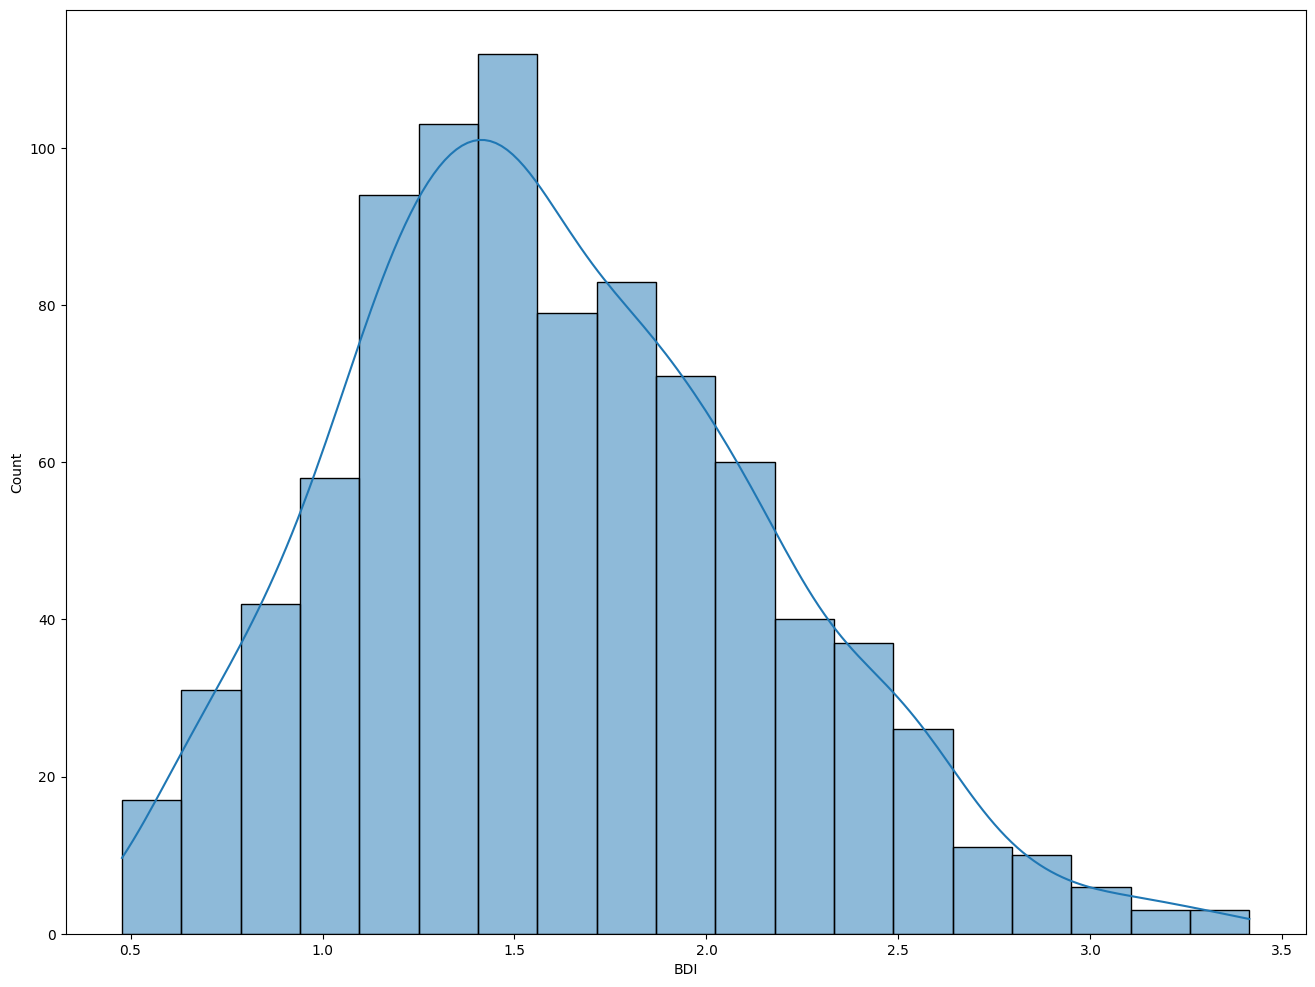

In [ ]:
########

# Set the figure size
plt.figure(figsize=(16, 12))

sns.histplot(df['BDI'], kde=True) 
plt.xlabel("BDI")
plt.ylabel('Count')

plt.show()

In [ ]:
# Apply the additional modifications based on conditions
df['mbi_ex_s'] = np.where(df['mbi_ex_s'] > 0.774333, df['mbi_ex_s'] * 2, df['mbi_ex_s'])
df['mbi_cy_s'] = np.where(df['mbi_cy_s'] > 0.60167, df['mbi_cy_s'] * 2, df['mbi_cy_s'])
df['mbi_ea_s'] = np.where(df['mbi_ea_s'] > 0.310833, df['mbi_ea_s'] * 2, df['mbi_ea_s'])
df['cesd_s'] = np.where(df['cesd_s'] > 0.31, df['cesd_s'] * 2, df['cesd_s'])



In [ ]:
df['BDI'] = df['mbi_ex_s'] + df['mbi_cy_s'] + df['mbi_ea_s'] + df['cesd_s'] 

In [ ]:
#####
df['BDI'].describe()

count   886.000
mean      2.262
std       1.255
min       0.478
25%       1.264
50%       1.947
75%       2.956
max       6.828
Name: BDI, dtype: float64

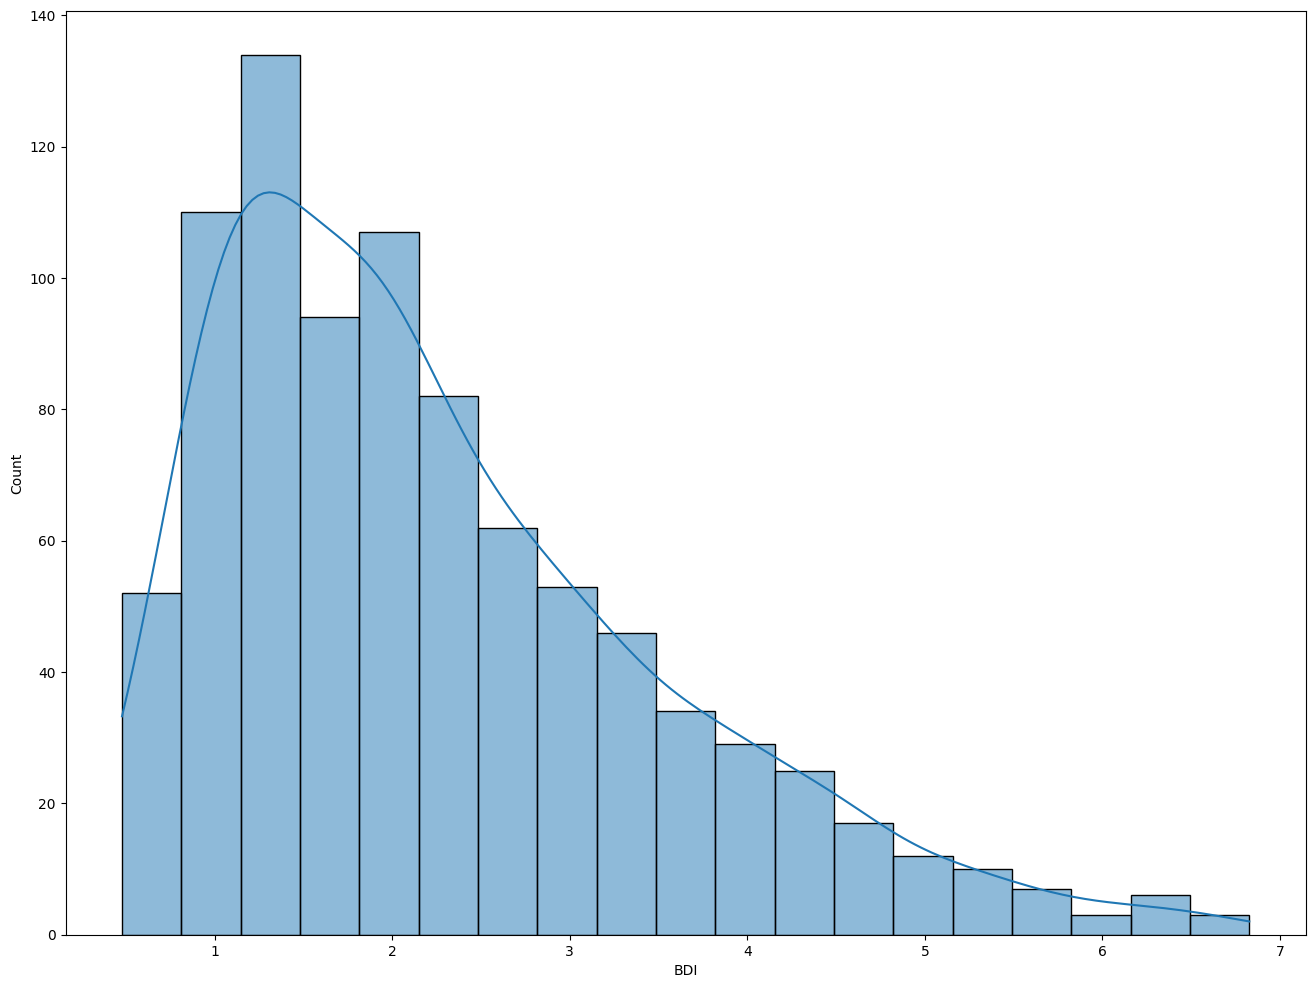

In [ ]:
########

# Set the figure size
plt.figure(figsize=(16, 12))

sns.histplot(df['BDI'], kde=True) 
plt.xlabel("BDI")
plt.ylabel('Count')

plt.show()

In [ ]:
# Define a function to apply the conditions and update the 'BDI' column
def update_bdi(row):
    conditions = [
        row['mbi_ex_s'] > 0.774333,
        row['mbi_cy_s'] > 0.60167,
        row['mbi_ea_s'] > 0.310833,
        row['cesd_s'] > 0.31
    ]
    true_count = sum(conditions)

    if true_count == 0:
        return row['BDI'] * 25
    elif true_count == 1:
        return row['BDI'] * 20
    elif true_count == 2:
        return row['BDI'] * (100 / 6)
    elif true_count == 3:
        return row['BDI'] * (100 / 7)
    elif true_count == 4:
        return row['BDI'] * 12.5
    else:
        return row['BDI']

# Apply the function to update the 'BDI' column
df['BDI'] = df.apply(update_bdi, axis=1)

# Display the DataFrame
df

id  age  year  sex  glang  part  job  stud_h  health  psyt  ...  \
0       2   18     1    1    120     1    0      56       3     0  ...   
1       4   26     4    1      1     1    0      20       4     0  ...   
2       9   21     3    2      1     0    0      36       3     0  ...   
3      10   21     2    2      1     0    1      51       5     0  ...   
4      13   21     3    1      1     1    0      22       4     0  ...   
..    ...  ...   ...  ...    ...   ...  ...     ...     ...   ...  ...   
881  1781   21     2    1      1     1    0      45       3     0  ...   
882  1785   20     2    2      1     0    0      13       3     0  ...   
883  1787   19     1    1      1     0    0      50       5     0  ...   
884  1789   24     5    2      1     0    0      20       2     1  ...   
885  1790   22     3    1      1     0    1      20       5     0  ...   

     stai_t  mbi_ex  mbi_cy  mbi_ea  reversed_mbi_ea  mbi_ex_s  mbi_cy_s  \
0        61      17      13      20               16     0.567     0.542   
1        33      14      11      26               10     0.467     0.458   
2        73      24       7      23               13     1.600     0.292   
3        48      16      10      21               15     0.533     0.417   
4        46      22      14      23               13     0.733     0.583   
..      ...     ...     ...     ...              ...       ...       ...   
881      39      23       4      34                2     0.767     0.167   
882      41      17       5      24               12     0.567     0.208   
883      45      15       8      31                5     0.500     0.333   
884      58      22      15      19               17     0.733     1.250   
885      27      11       9      30                6     0.367     0.375   

     mbi_ea_s  cesd_s    BDI  
0       0.889   1.133 52.176  
1       0.278   0.117 32.986  
2       0.722   0.833 49.246  
3       0.833   0.283 41.333  
4       0.722   0.233 45.444  
..        ...     ...    ...  
881     0.056   1.367 47.111  
882     0.667   0.867 38.472  
883     0.139   0.233 30.139  
884     0.944   1.100 57.540  
885     0.167   0.083 24.792  

[886 rows x 26 columns]

In [ ]:
# Drop the temporary column 'reversed_mbi_ea' 
df.drop('reversed_mbi_ea', axis=1, inplace=True)
df.drop('mbi_ex_s', axis=1, inplace=True)
df.drop('mbi_cy_s', axis=1, inplace=True)
df.drop('mbi_ea_s', axis=1, inplace=True)
df.drop('cesd_s', axis=1, inplace=True)



In [ ]:
# Set the float format for display
pd.set_option('display.float_format', '{:.3f}'.format)
df

id  age  year  sex  glang  part  job  stud_h  health  psyt  ...  \
0       2   18     1    1    120     1    0      56       3     0  ...   
1       4   26     4    1      1     1    0      20       4     0  ...   
2       9   21     3    2      1     0    0      36       3     0  ...   
3      10   21     2    2      1     0    1      51       5     0  ...   
4      13   21     3    1      1     1    0      22       4     0  ...   
..    ...  ...   ...  ...    ...   ...  ...     ...     ...   ...  ...   
881  1781   21     2    1      1     1    0      45       3     0  ...   
882  1785   20     2    2      1     0    0      13       3     0  ...   
883  1787   19     1    1      1     0    0      50       5     0  ...   
884  1789   24     5    2      1     0    0      20       2     1  ...   
885  1790   22     3    1      1     0    1      20       5     0  ...   

     qcae_cog  qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  \
0          62        27    17      0.738    34      61      17      13   
1          55        37    22      0.690     7      33      14      11   
2          64        39    17      0.690    25      73      24       7   
3          52        33    18      0.833    17      48      16      10   
4          58        28    21      0.690    14      46      22      14   
..        ...       ...   ...        ...   ...     ...     ...     ...   
881        63        39    28      0.619    41      39      23       4   
882        67        40    21      0.810    26      41      17       5   
883        50        31    24      0.548    14      45      15       8   
884        64        39    21      0.786    33      58      22      15   
885        54        26    25      0.571     5      27      11       9   

     mbi_ea    BDI  
0        20 52.176  
1        26 32.986  
2        23 49.246  
3        21 41.333  
4        23 45.444  
..      ...    ...  
881      34 47.111  
882      24 38.472  
883      31 30.139  
884      19 57.540  
885      30 24.792  

[886 rows x 21 columns]

In [ ]:
df['BDI'].describe()

count   886.000
mean     40.680
std      13.847
min      11.944
25%      30.767
50%      38.806
75%      49.514
max      85.347
Name: BDI, dtype: float64

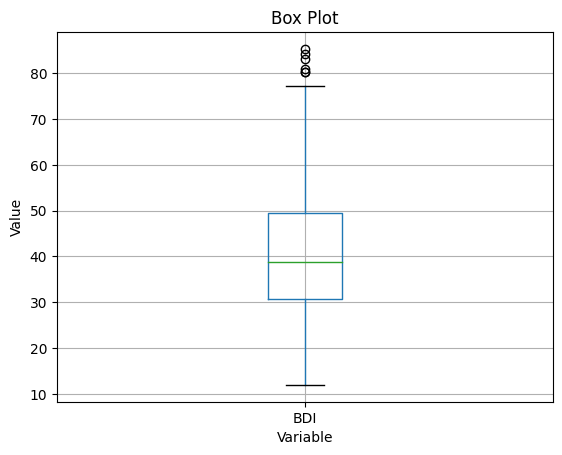

In [ ]:
# Create a box plot for each column
df.boxplot(column=['BDI'])

# Set plot labels and title
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Box Plot')

# Show the plot
plt.show()

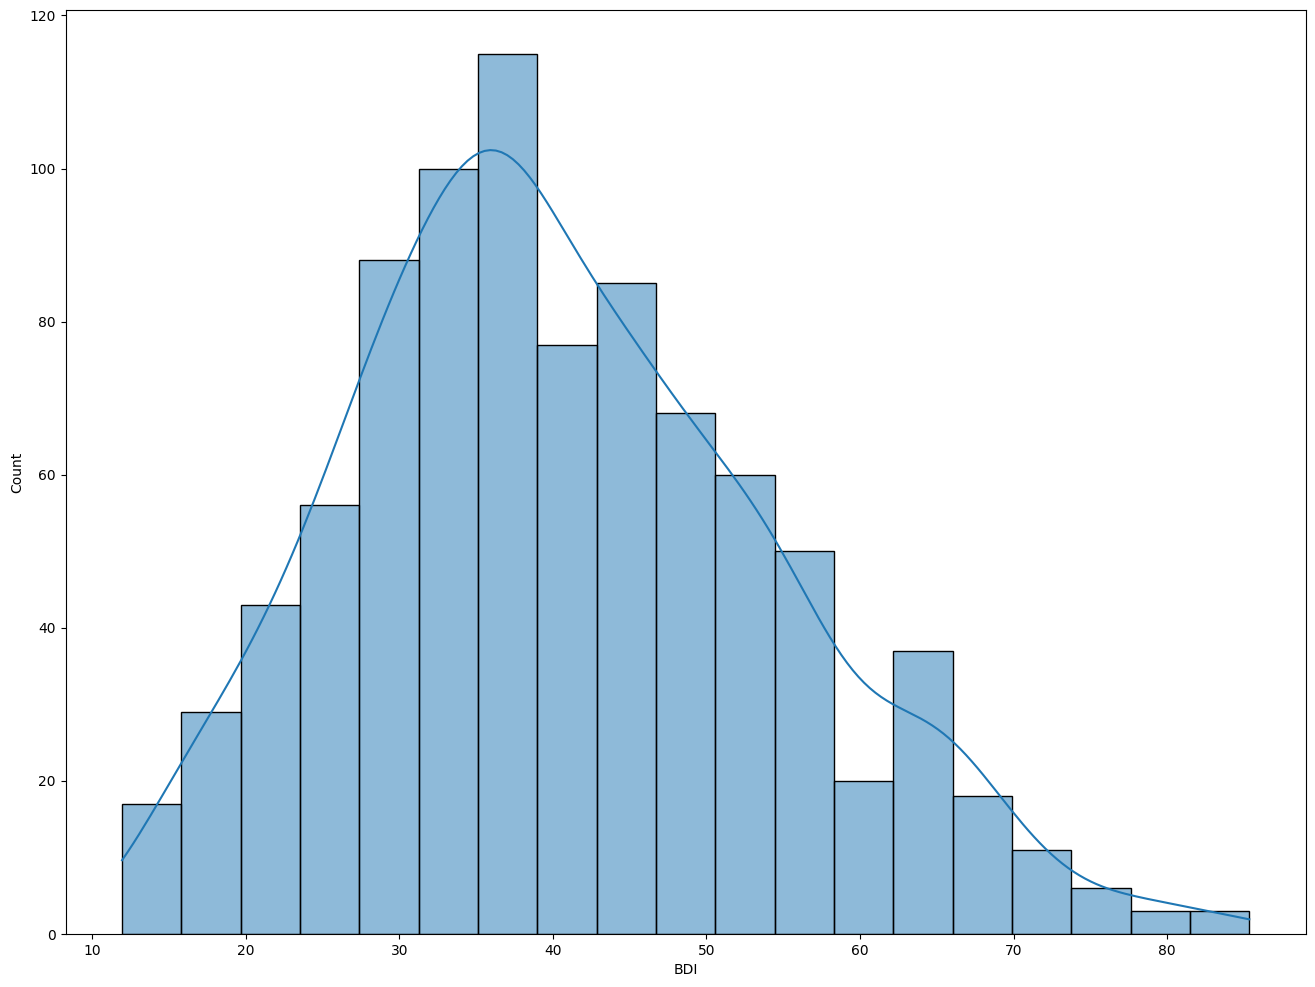

In [ ]:
# Set the figure size
plt.figure(figsize=(16, 12))

sns.histplot(df['BDI'], kde=True) 
plt.xlabel("BDI")
plt.ylabel('Count')

plt.show()

In [ ]:
'''plt.scatter(df.index, df['BDI'])
plt.xlabel('Index') 
plt.ylabel('BDI')

plt.title('BDI Value Scatter Plot')

plt.show()'''

"plt.scatter(df.index, df['BDI'])\nplt.xlabel('Index') \nplt.ylabel('BDI')\n\nplt.title('BDI Value Scatter Plot')\n\nplt.show()"

In [ ]:
df.to_csv('Data_02.csv', index=False) 


## Reading the preprocessed dataset

In [2]:
# Load the data and store it in a pandas dataframe
df = pd.read_csv('Data_02.csv')
df

id  age  year  sex  glang  part  job  stud_h  health  psyt  ...  \
0       2   18     1    1    120     1    0      56       3     0  ...   
1       4   26     4    1      1     1    0      20       4     0  ...   
2       9   21     3    2      1     0    0      36       3     0  ...   
3      10   21     2    2      1     0    1      51       5     0  ...   
4      13   21     3    1      1     1    0      22       4     0  ...   
..    ...  ...   ...  ...    ...   ...  ...     ...     ...   ...  ...   
881  1781   21     2    1      1     1    0      45       3     0  ...   
882  1785   20     2    2      1     0    0      13       3     0  ...   
883  1787   19     1    1      1     0    0      50       5     0  ...   
884  1789   24     5    2      1     0    0      20       2     1  ...   
885  1790   22     3    1      1     0    1      20       5     0  ...   

     qcae_cog  qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  \
0          62        27    17   0.738095    34      61      17      13   
1          55        37    22   0.690476     7      33      14      11   
2          64        39    17   0.690476    25      73      24       7   
3          52        33    18   0.833333    17      48      16      10   
4          58        28    21   0.690476    14      46      22      14   
..        ...       ...   ...        ...   ...     ...     ...     ...   
881        63        39    28   0.619048    41      39      23       4   
882        67        40    21   0.809524    26      41      17       5   
883        50        31    24   0.547619    14      45      15       8   
884        64        39    21   0.785714    33      58      22      15   
885        54        26    25   0.571429     5      27      11       9   

     mbi_ea        BDI  
0        20  52.175926  
1        26  32.986111  
2        23  49.246032  
3        21  41.333333  
4        23  45.444444  
..      ...        ...  
881      34  47.111111  
882      24  38.472222  
883      31  30.138889  
884      19  57.539683  
885      30  24.791667  

[886 rows x 21 columns]

In [3]:
pd.DataFrame(df.describe())

id         age        year         sex       glang  \
count   886.000000  886.000000  886.000000  886.000000  886.000000   
mean    889.709932   22.383747    3.102709    1.695260   14.327314   
std     515.555875    3.300664    1.763937    0.472665   32.366389   
min       2.000000   17.000000    1.000000    1.000000    1.000000   
25%     447.500000   20.000000    1.000000    1.000000    1.000000   
50%     876.000000   22.000000    3.000000    2.000000    1.000000   
75%    1341.750000   24.000000    5.000000    2.000000    1.000000   
max    1790.000000   49.000000    6.000000    3.000000  121.000000   

             part         job      stud_h      health        psyt  ...  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  ...   
mean     0.563205    0.348758   25.288939    3.777652    0.224605  ...   
std      0.496269    0.476847   15.927875    1.061497    0.417558  ...   
min      0.000000    0.000000    0.000000    1.000000    0.000000  ...   
25%      0.000000    0.000000   12.000000    3.000000    0.000000  ...   
50%      1.000000    0.000000   25.000000    4.000000    0.000000  ...   
75%      1.000000    1.000000   36.000000    5.000000    0.000000  ...   
max      1.000000    1.000000   70.000000    5.000000    1.000000  ...   

         qcae_cog    qcae_aff        amsp   erec_mean        cesd      stai_t  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean    58.525959   34.784424   23.150113    0.720144   18.050790   42.898420   
std      6.570341    5.377062    4.993220    0.093570   11.478731   11.978458   
min     37.000000   18.000000    6.000000    0.357143    0.000000   20.000000   
25%     54.000000   31.000000   20.000000    0.666667    9.000000   34.000000   
50%     58.000000   35.000000   23.000000    0.726190   16.000000   43.000000   
75%     63.000000   39.000000   26.750000    0.785714   25.000000   51.000000   
max     76.000000   48.000000   35.000000    0.952381   56.000000   77.000000   

           mbi_ex      mbi_cy      mbi_ea         BDI  
count  886.000000  886.000000  886.000000  886.000000  
mean    16.878104   10.079007   24.207675   40.680159  
std      5.256025    4.592609    4.633675   13.846731  
min      5.000000    4.000000   10.000000   11.944444  
25%     13.000000    6.000000   21.000000   30.767361  
50%     17.000000    9.000000   24.000000   38.805556  
75%     20.000000   13.000000   28.000000   49.513889  
max     30.000000   24.000000   36.000000   85.347222  

[8 rows x 21 columns]

## Getting Prepare for developing models

In [4]:
TargetVariable=['BDI']

Predictors=['age', 'year', 'sex', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt', 'stai_t']

X=df[Predictors].values
Y=df[TargetVariable].values


PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(Y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
Y=TargetVarScalerFit.transform(Y)

# Split the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(708, 10)
(708, 1)
(178, 10)
(178, 1)


## Linear Regression

In [6]:
# Create a linear regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred1 = lr.predict(X_test)


# Scaling the predicted data back to original scale
Predictions1=TargetVarScalerFit.inverse_transform(Y_pred1)

# Scaling the y_test data back to original scale
y_test_orig=TargetVarScalerFit.inverse_transform(Y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData1=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData1['BDI']=y_test_orig
TestingData1['PredictedBDI']=Predictions1

In [7]:
# Computing the absolute percent error
APE=100*(abs(TestingData1['BDI']-TestingData1['PredictedBDI'])/TestingData1['BDI'])
TestingData1['APE']=APE

MAPE = round(100-np.mean(APE), 3)
MAE = round(metrics.mean_absolute_error(TestingData1['BDI'], TestingData1['PredictedBDI']), 3)
RMSE = round(metrics.mean_squared_error(TestingData1['BDI'], TestingData1['PredictedBDI'], squared=False), 3)
# R-squared
r2 = r2_score(TestingData1['BDI'], TestingData1['PredictedBDI'])
r2 = round(r2, 3)

# Evaluate the model
print('The Accuracy of LR model is:', MAPE)
print('Mean Absolute Error:', MAE)
print('Root Mean Squared Error:', RMSE)
print('R-squared (R2):', r2)
TestingData1.head()

The Accuracy of LR model is: 78.696
Mean Absolute Error: 7.858
Root Mean Squared Error: 10.315
R-squared (R2): 0.438


age  year  sex  glang  part  job  stud_h  health  psyt  stai_t        BDI  \
0  19.0   1.0  2.0   20.0   0.0  0.0    44.0     4.0   0.0    28.0  23.055556   
1  28.0   6.0  2.0   15.0   1.0  1.0     5.0     5.0   0.0    27.0  16.805556   
2  20.0   2.0  2.0    1.0   1.0  0.0    30.0     5.0   0.0    23.0  30.763889   
3  25.0   4.0  1.0    1.0   1.0  0.0    30.0     2.0   0.0    39.0  57.777778   
4  21.0   2.0  1.0    1.0   1.0  0.0    45.0     3.0   0.0    39.0  47.111111   

   PredictedBDI        APE  
0     29.501966  27.960336  
1     25.901077  54.122114  
2     24.392548  20.710455  
3     40.548483  29.819934  
4     39.000634  17.215635

In [8]:
# Coefficients and intercept
coefficients = lr.coef_[0]
intercept = lr.intercept_[0]

# Creating a formula string
formula = "BDI = {:.3f}".format(intercept)
for coef, predictor in zip(coefficients, Predictors):
    formula += " + ({:.3f} * {})".format(coef, predictor)

print("The linear regression formula is:\n", formula)

The linear regression formula is:
 BDI = -0.006 + (-0.083 * age) + (-0.020 * year) + (-0.032 * sex) + (0.026 * glang) + (0.005 * part) + (0.011 * job) + (-0.082 * stud_h) + (-0.168 * health) + (0.055 * psyt) + (0.579 * stai_t)


## Support Vector Machine

In [9]:
# create an SVR model with a linear kernel > poly >> RBF
svr = SVR(kernel='linear', C=0.05, epsilon=0.001)
#svr = SVR(kernel='poly', degree=2)

# train the model on the data
svr.fit(X_train, Y_train)

# make predictions on the data
Y_pred2 = svr.predict(X_test)

Y_pred2 = Y_pred2.reshape(-1, 1)
# Scaling the predicted data back to original scale
Predictions2=TargetVarScalerFit.inverse_transform(Y_pred2)

TestingData2=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData2['BDI']=y_test_orig
TestingData2['PredictedBDI']=Predictions2

In [10]:
# Computing the absolute percent error
APE=100*(abs(TestingData2['BDI']-TestingData2['PredictedBDI'])/TestingData2['BDI'])
TestingData2['APE']=APE

MAPE = round(100-np.mean(APE), 3)
MAE = round(metrics.mean_absolute_error(TestingData2['BDI'], TestingData2['PredictedBDI']), 3)
RMSE = round(metrics.mean_squared_error(TestingData2['BDI'], TestingData2['PredictedBDI'], squared=False), 3)
# R-squared
r2 = r2_score(TestingData2['BDI'], TestingData2['PredictedBDI'])
r2 = round(r2, 3)

# Evaluate the model
print('The Accuracy of SVR model is:', MAPE)
print('Mean Absolute Error:', MAE)
print('Root Mean Squared Error:', RMSE)
print('R-squared (R2):', r2)
TestingData2.head()

The Accuracy of SVR model is: 79.918
Mean Absolute Error: 7.823
Root Mean Squared Error: 10.55
R-squared (R2): 0.412


age  year  sex  glang  part  job  stud_h  health  psyt  stai_t        BDI  \
0  19.0   1.0  2.0   20.0   0.0  0.0    44.0     4.0   0.0    28.0  23.055556   
1  28.0   6.0  2.0   15.0   1.0  1.0     5.0     5.0   0.0    27.0  16.805556   
2  20.0   2.0  2.0    1.0   1.0  0.0    30.0     5.0   0.0    23.0  30.763889   
3  25.0   4.0  1.0    1.0   1.0  0.0    30.0     2.0   0.0    39.0  57.777778   
4  21.0   2.0  1.0    1.0   1.0  0.0    45.0     3.0   0.0    39.0  47.111111   

   PredictedBDI        APE  
0     28.056933  21.692723  
1     22.651848  34.787855  
2     22.013582  28.443435  
3     39.494818  31.643585  
4     38.648959  17.962116

In [11]:
'''
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    svr, X, Y.ravel(), cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()
'''

'\n# Learning curve\ntrain_sizes, train_scores, test_scores = learning_curve(\n    svr, X, Y.ravel(), cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring=\'neg_mean_squared_error\')\n\ntrain_scores_mean = -np.mean(train_scores, axis=1)\ntest_scores_mean = -np.mean(test_scores, axis=1)\n\nplt.plot(train_sizes, train_scores_mean, \'o-\', color="r", label="Training score")\nplt.plot(train_sizes, test_scores_mean, \'o-\', color="g", label="Cross-validation score")\nplt.xlabel(\'Training examples\')\nplt.ylabel(\'Score\')\nplt.title(\'Learning Curve\')\nplt.legend(loc="best")\nplt.show()\n'

### Global

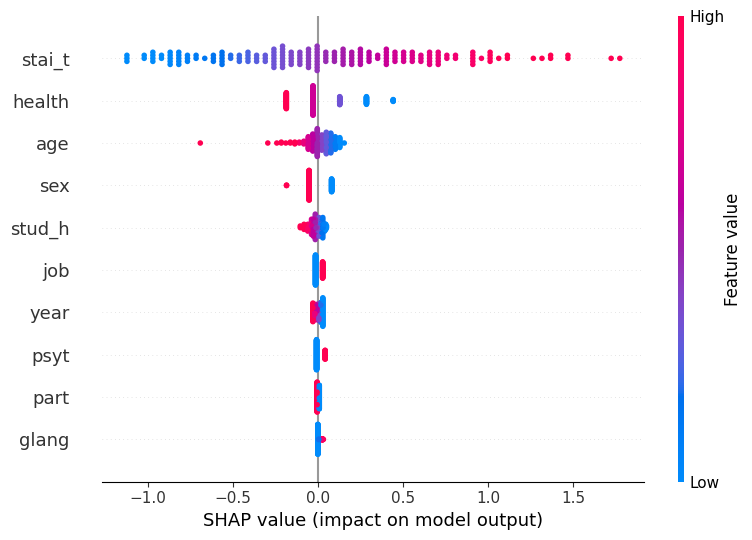

In [12]:
# Calculate SHAP values
explainer = shap.Explainer(svr, X_train)
shap_values = explainer(X_test)

# Wrap the SHAP values in the Explanation object to include feature names
shap_values_with_names = shap.Explanation(values=shap_values.values,
                                          base_values=shap_values.base_values,
                                          data=shap_values.data,
                                          feature_names=Predictors)
# Summary plot
shap.summary_plot(shap_values_with_names, X_test, feature_names=Predictors)

### Local

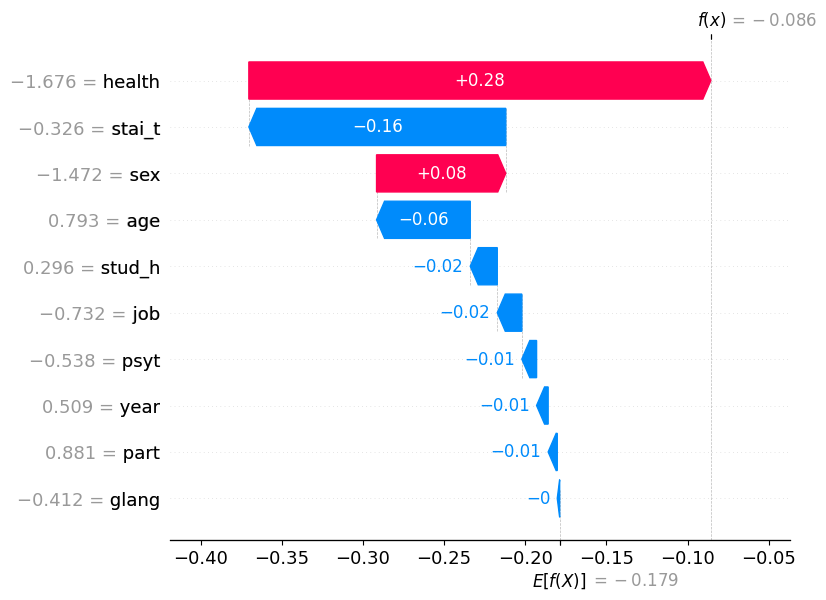

In [13]:
# Waterfall plot for an instance
shap.waterfall_plot(shap_values_with_names[3])


<Figure size 640x480 with 0 Axes>

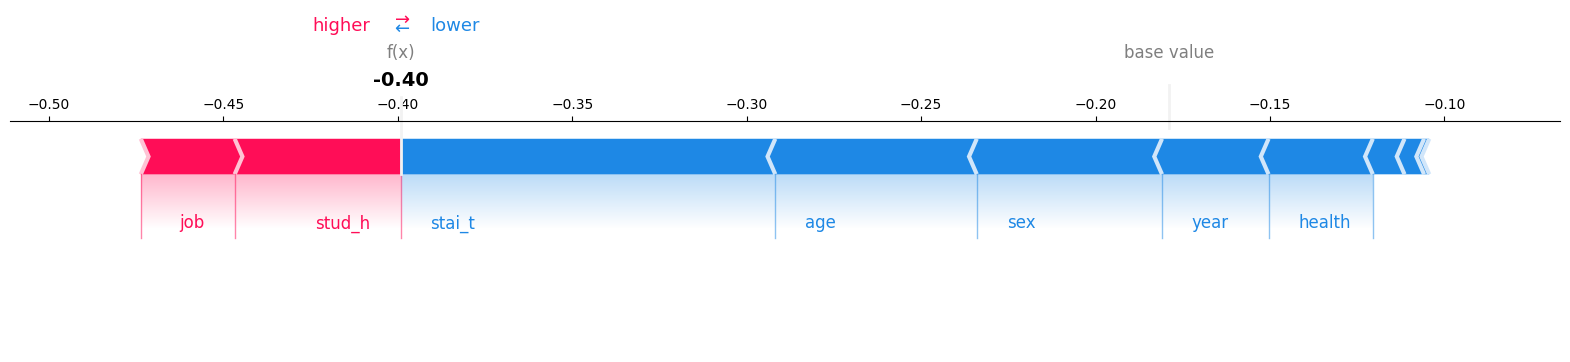

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure()
shap.initjs()
expected_value = shap_values_with_names.base_values[37]  # Extract expected value for an instance
shap.plots.force(expected_value, shap_values_with_names.values[37], feature_names=Predictors, matplotlib=True)
plt.savefig('force_plot.png')


### Partial Dependency Plots

<Figure size 2000x1500 with 0 Axes>

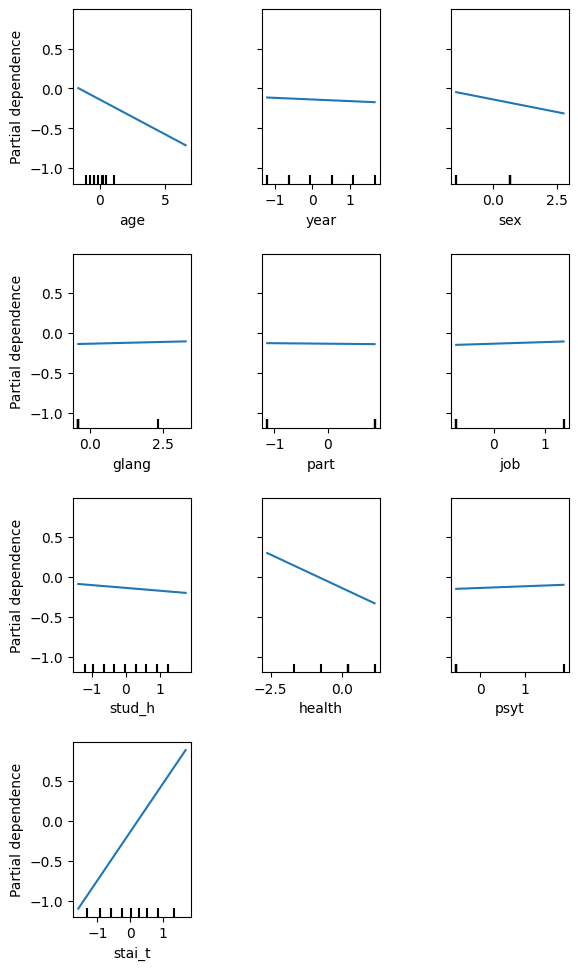

In [15]:
# PDPs for selected features
feature_names = ['age', 'year', 'sex', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt', 'stai_t']


# Set the figure size
plt.figure(figsize=(20, 15))

# Create partial dependence plots
display = PartialDependenceDisplay.from_estimator(
    svr, X_train, features=feature_names, feature_names=Predictors, grid_resolution=50,
)

# Set the title and adjust layout

plt.subplots_adjust(top=2, wspace=0.6, hspace=0.4)  # Adjust the spacing

# Show the plot
plt.show()


### Individual Conditional Expectation Plots

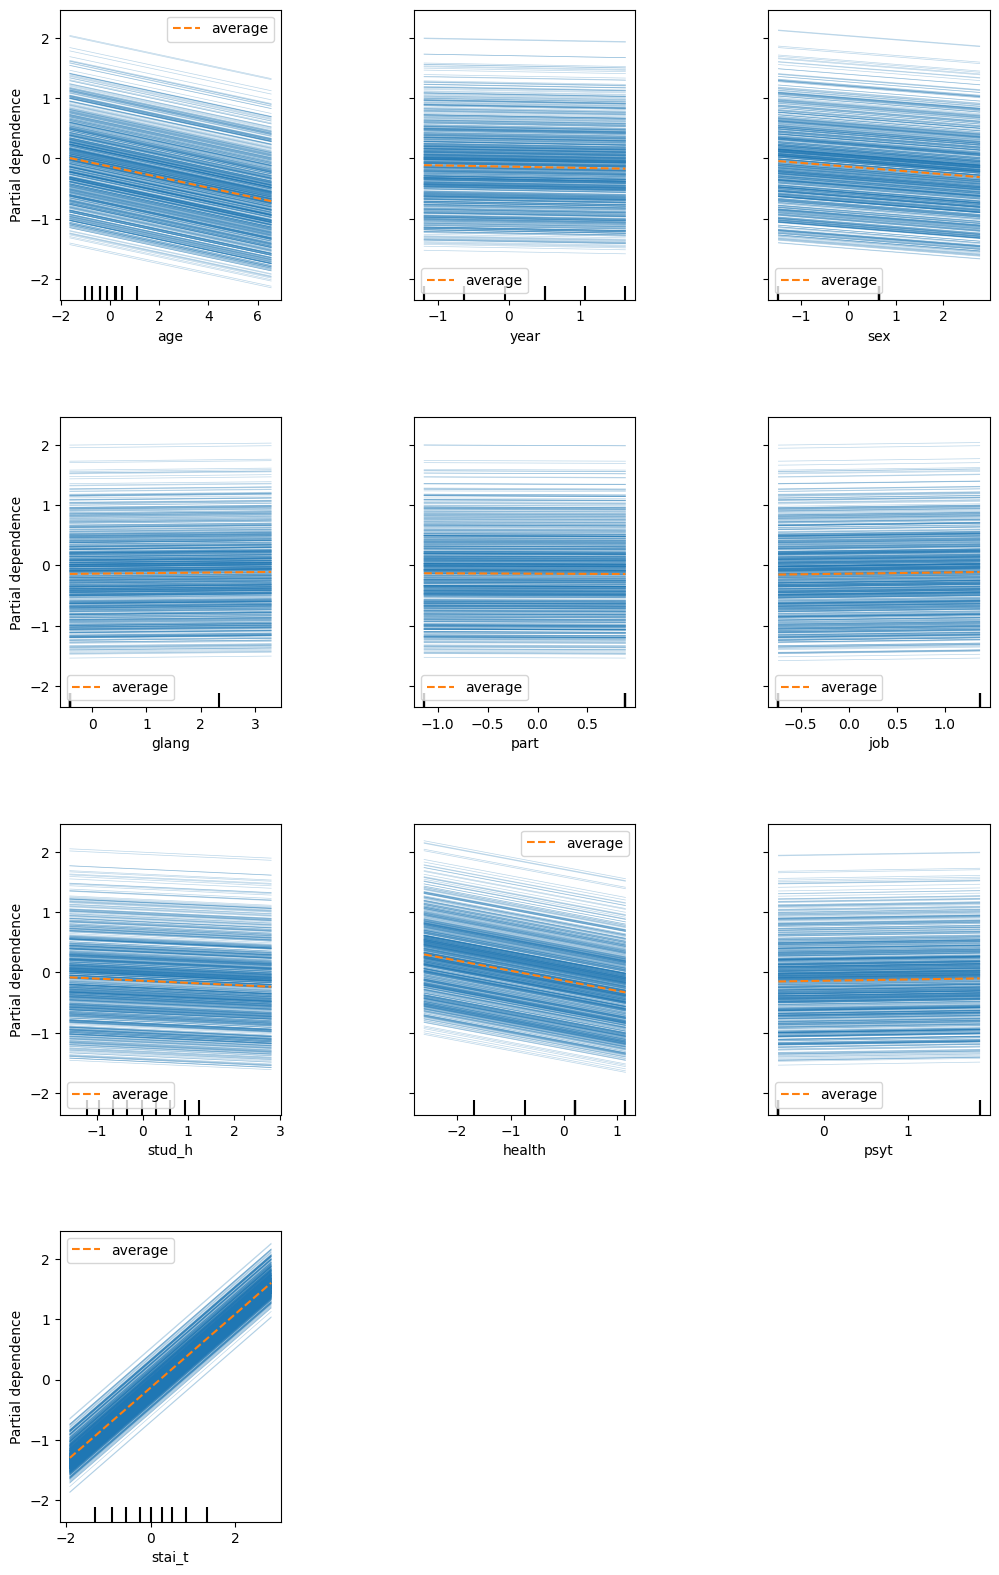

In [16]:
# PDPs for selected features
feature_names = ['age', 'year', 'sex', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt', 'stai_t']



# Function to plot ICE
def plot_ice(model, X_train, feature_names):
    fig, ax = plt.subplots(figsize=(12, 8))
    display = PartialDependenceDisplay.from_estimator(
        model,
        X_train,
        features=range(X_train.shape[1]),
        kind="both",  # both PDP and ICE
        feature_names=feature_names,
        ax=ax
    )
    plt.subplots_adjust(top=2, wspace=0.6, hspace=0.4)
    plt.show()

# Call the function to plot ICE plots
plot_ice(svr, X_train, Predictors)


### Permutation Feature Importance

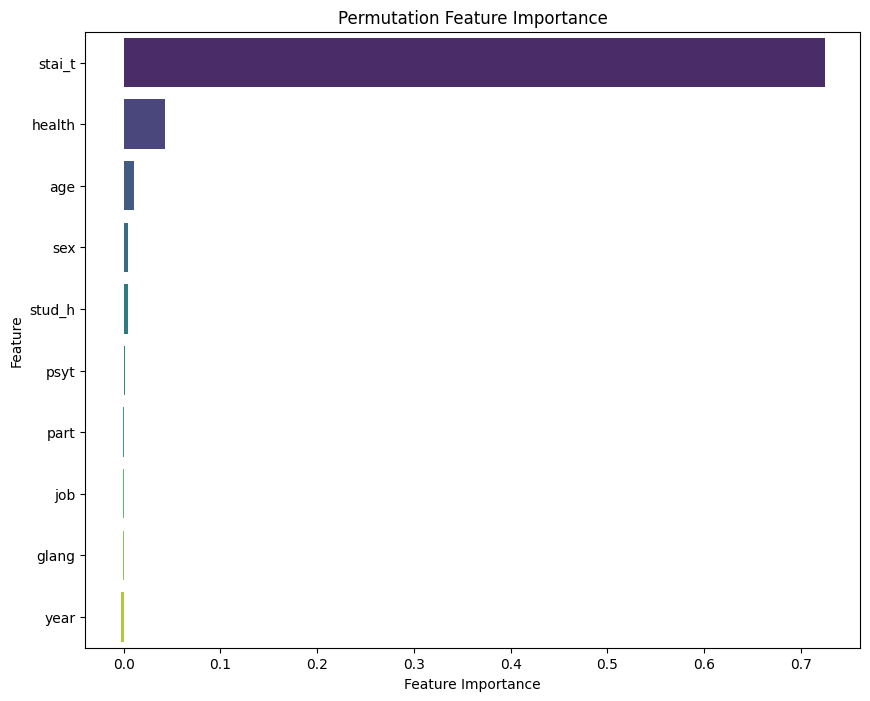

In [17]:

def custom_scoring_function(estimator, X, y):
    y_pred = estimator.predict(X)
    return -mean_squared_error(y, y_pred)

perm_importance = permutation_importance(svr, X_test, Y_test, n_repeats=30, random_state=42, scoring=custom_scoring_function)

feature_names = Predictors
feature_importance = perm_importance.importances_mean

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plotting the feature importance with shading
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

plt.xlabel('Feature Importance')
plt.title('Permutation Feature Importance')
plt.show()

# Function to add shading to the table
def color_negative_red(val):
    color = 'lightgreen' if val >= 0 else 'white'
    return f'background-color: {color}'

# Apply shading based on importance values
styled_table = feature_importance_df.style.background_gradient(cmap='viridis', subset=['Importance'])

# Display the styled table
styled_table


## ANN

In [31]:
# create ANN model
model = Sequential()

# Input layer and first hidden layer with dropout # Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=16, input_dim=10, kernel_initializer='normal', activation='tanh'))
#model.add(Dropout(0.2))

# Second hidden layer # after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=32, activation='tanh'))
#model.add(Dropout(0.2))

# Third hidden layer
model.add(Dense(units=8, activation='selu'))

# Output layer
# The output neuron is a single fully connected node  # Since we will be predicting a single number
model.add(Dense(1))

# Define the optimizer and set the learning rate
optimizer = RMSprop(learning_rate=0.0001)

# Compiling the model with optimizer
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])


In [32]:
# Fitting the ANN to the Training set
model.fit(X_train, Y_train ,batch_size = 1, epochs = 30, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted data back to original scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['BDI']=y_test_orig
TestingData['PredictedBDI']=Predictions

6/6 [==============================] - 0s 3ms/step


In [33]:
# Computing the absolute percent error
APE=100*(abs(TestingData['BDI']-TestingData['PredictedBDI'])/TestingData['BDI'])
TestingData['APE']=APE

MAPE = round(100-np.mean(APE), 3)
MAE = round(metrics.mean_absolute_error(TestingData['BDI'], TestingData['PredictedBDI']), 3)
RMSE = round(metrics.mean_squared_error(TestingData['BDI'], TestingData['PredictedBDI'], squared=False), 3)
# R-squared
r2 = r2_score(TestingData['BDI'], TestingData['PredictedBDI'])
r2 = round(r2, 3)

# Evaluate the model
print('The Accuracy of ANN model is:', MAPE)
print('Mean Absolute Error:', MAE)
print('Root Mean Squared Error:', RMSE)
print('R-squared (R2):', r2)
TestingData.head()

The Accuracy of ANN model is: 78.775
Mean Absolute Error: 7.906
Root Mean Squared Error: 10.363
R-squared (R2): 0.432


age  year  sex  glang  part  job  stud_h  health  psyt  stai_t        BDI  \
0  19.0   1.0  2.0   20.0   0.0  0.0    44.0     4.0   0.0    28.0  23.055556   
1  28.0   6.0  2.0   15.0   1.0  1.0     5.0     5.0   0.0    27.0  16.805556   
2  20.0   2.0  2.0    1.0   1.0  0.0    30.0     5.0   0.0    23.0  30.763889   
3  25.0   4.0  1.0    1.0   1.0  0.0    30.0     2.0   0.0    39.0  57.777778   
4  21.0   2.0  1.0    1.0   1.0  0.0    45.0     3.0   0.0    39.0  47.111111   

   PredictedBDI        APE  
0     29.039627  25.955009  
1     25.973639  54.553882  
2     24.558308  20.171641  
3     41.538876  28.105792  
4     39.684383  15.764281

In [34]:
model.summary()  # Print model summary

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                176       
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 8)                 264       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [35]:
'''
TestingData['Residuals'] = TestingData['BDI'] - TestingData['PredictedBDI']
plt.figure(figsize=(10, 6))
sns.histplot(TestingData['Residuals'], kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()
'''

"\nTestingData['Residuals'] = TestingData['BDI'] - TestingData['PredictedBDI']\nplt.figure(figsize=(10, 6))\nsns.histplot(TestingData['Residuals'], kde=True)\nplt.xlabel('Residuals')\nplt.title('Distribution of Residuals')\nplt.show()\n"

### Global

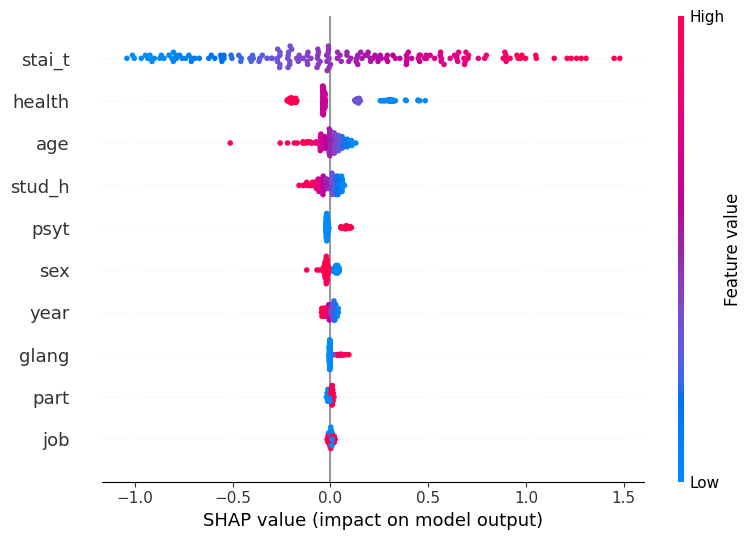

In [36]:
# Calculate SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Wrap the SHAP values in the Explanation object to include feature names
shap_values_with_names = shap.Explanation(values=shap_values.values,
                                          base_values=shap_values.base_values,
                                          data=shap_values.data,
                                          feature_names=Predictors)
# Summary plot
shap.summary_plot(shap_values_with_names, X_test, feature_names=Predictors)

### Local

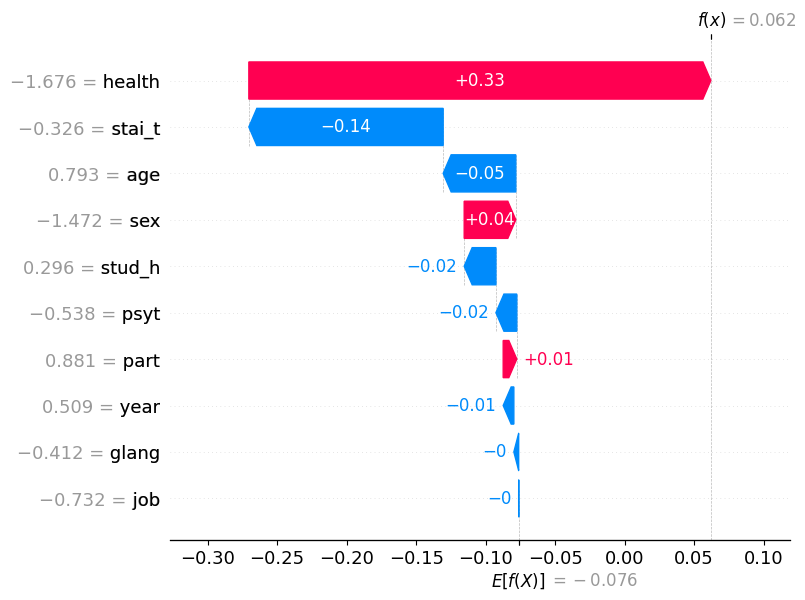

In [37]:
# Waterfall plot for an instance
shap.waterfall_plot(shap_values_with_names[3])


<Figure size 640x480 with 0 Axes>

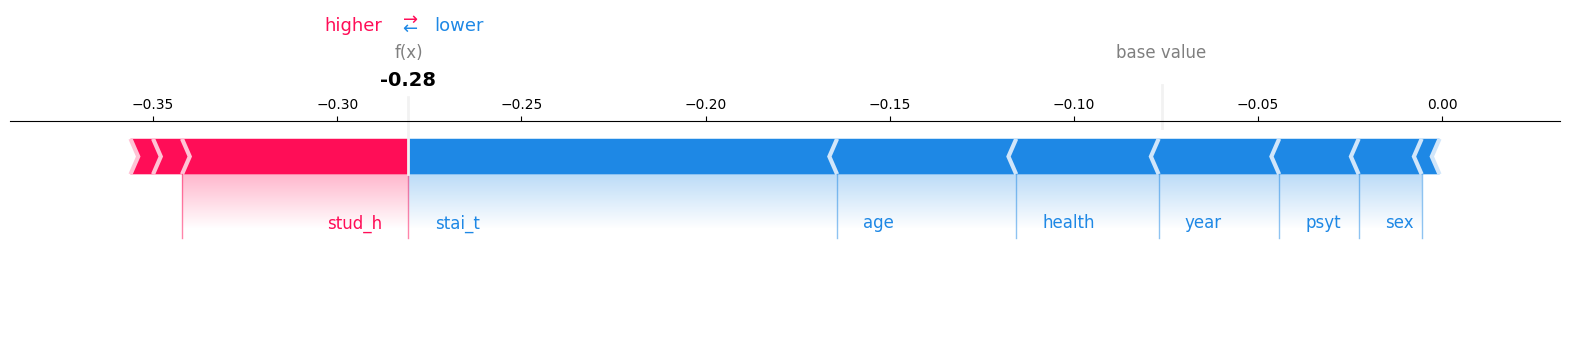

<Figure size 640x480 with 0 Axes>

In [38]:
plt.figure()
shap.initjs()
expected_value = shap_values_with_names.base_values[37]  # Extract expected value for an instance
shap.plots.force(expected_value, shap_values_with_names.values[37], feature_names=Predictors, matplotlib=True)
plt.savefig('force_plot.png')


### Partial Dependency Plots

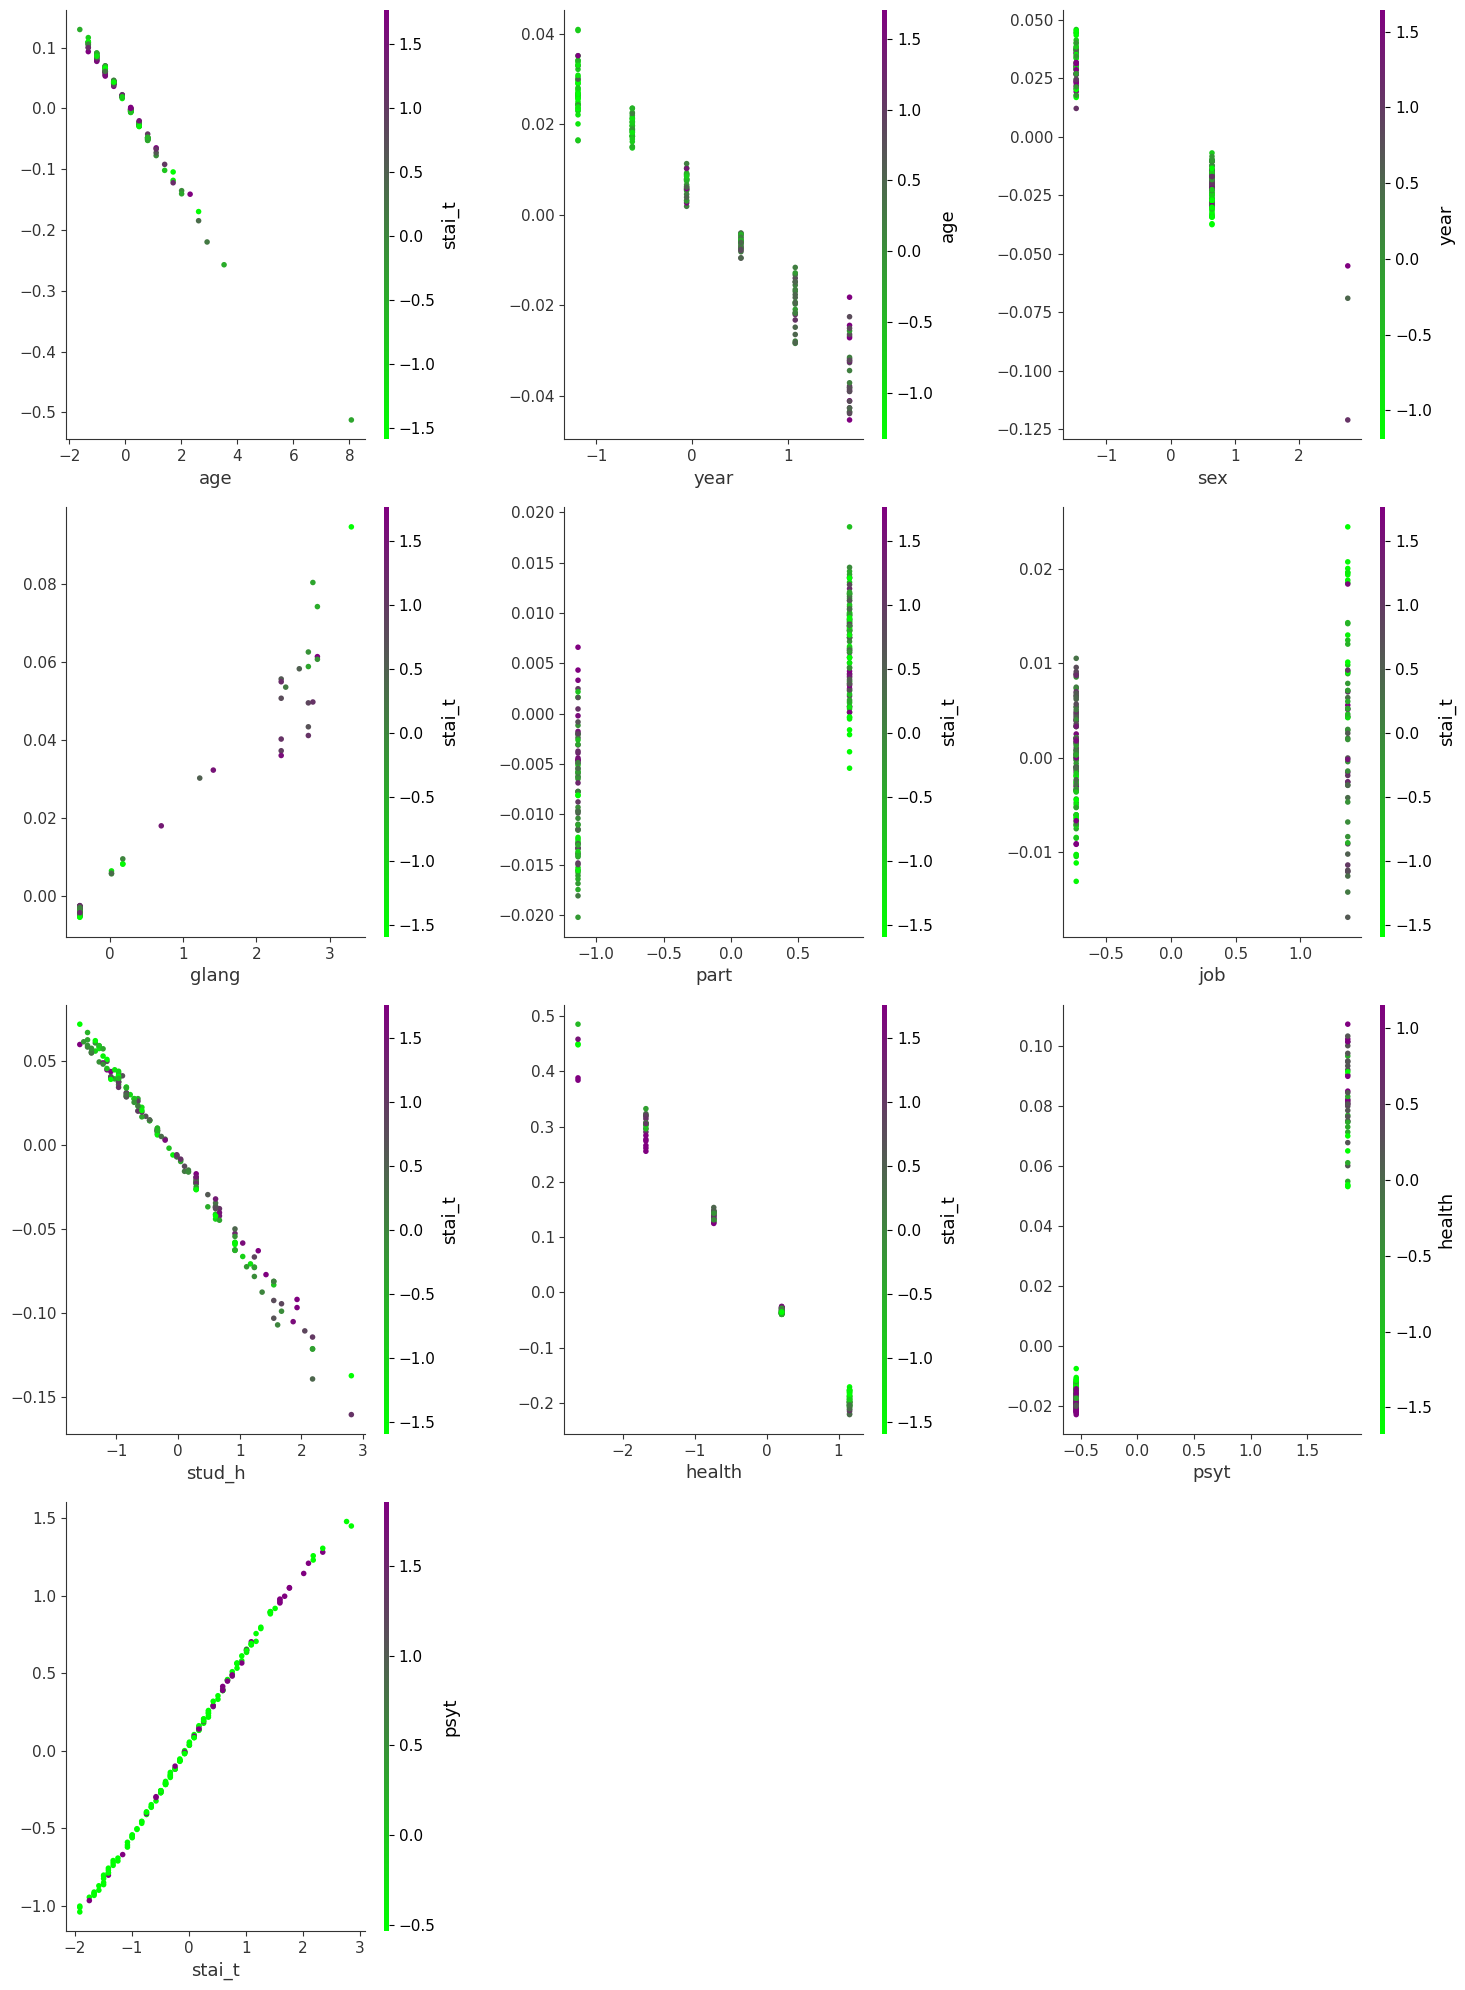

In [67]:
# List of feature names for which to plot PDPs
feature_names = ['age', 'year', 'sex', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt', 'stai_t']

# Get column indices of feature names in X_test 
feature_indices = [Predictors.index(feature) for feature in feature_names]

# Calculate number of rows and columns needed for subplots
num_features = len(feature_names)
max_cols = 3
num_rows = (num_features - 1) // max_cols + 1  # Calculate number of rows needed

colors = [(0, 1, 0), (0.5, 0, 0.5)]  # Green to purple
#colors = [(1, 1, 0), (1, 0.5, 0)]
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Create subplots for PDPs
fig, axes = plt.subplots(nrows=num_rows, ncols=max_cols, figsize=(15, 5 * num_rows))

# Adjust horizontal and vertical spacing between subplots
fig.subplots_adjust(wspace=5, hspace=3)

# Flatten axes array if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Plot PDPs for each feature
for i, feature_idx in enumerate(feature_indices):
    row = i // max_cols
    col = i % max_cols
    shap.dependence_plot(ind=feature_idx, shap_values=shap_values.values, features=X_test,
                         feature_names=Predictors, ax=axes[row, col], show=False, cmap=cmap)
    axes[row, col].set_title('')

    # Remove y-axis label (SHAP Value for ['feature name'])
    axes[row, col].set_ylabel('')

# Hide any unused subplots
for j in range(i + 1, num_rows * max_cols):
    row = j // max_cols
    col = j % max_cols
    fig.delaxes(axes[row, col])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Individual Conditional Expectation Plots

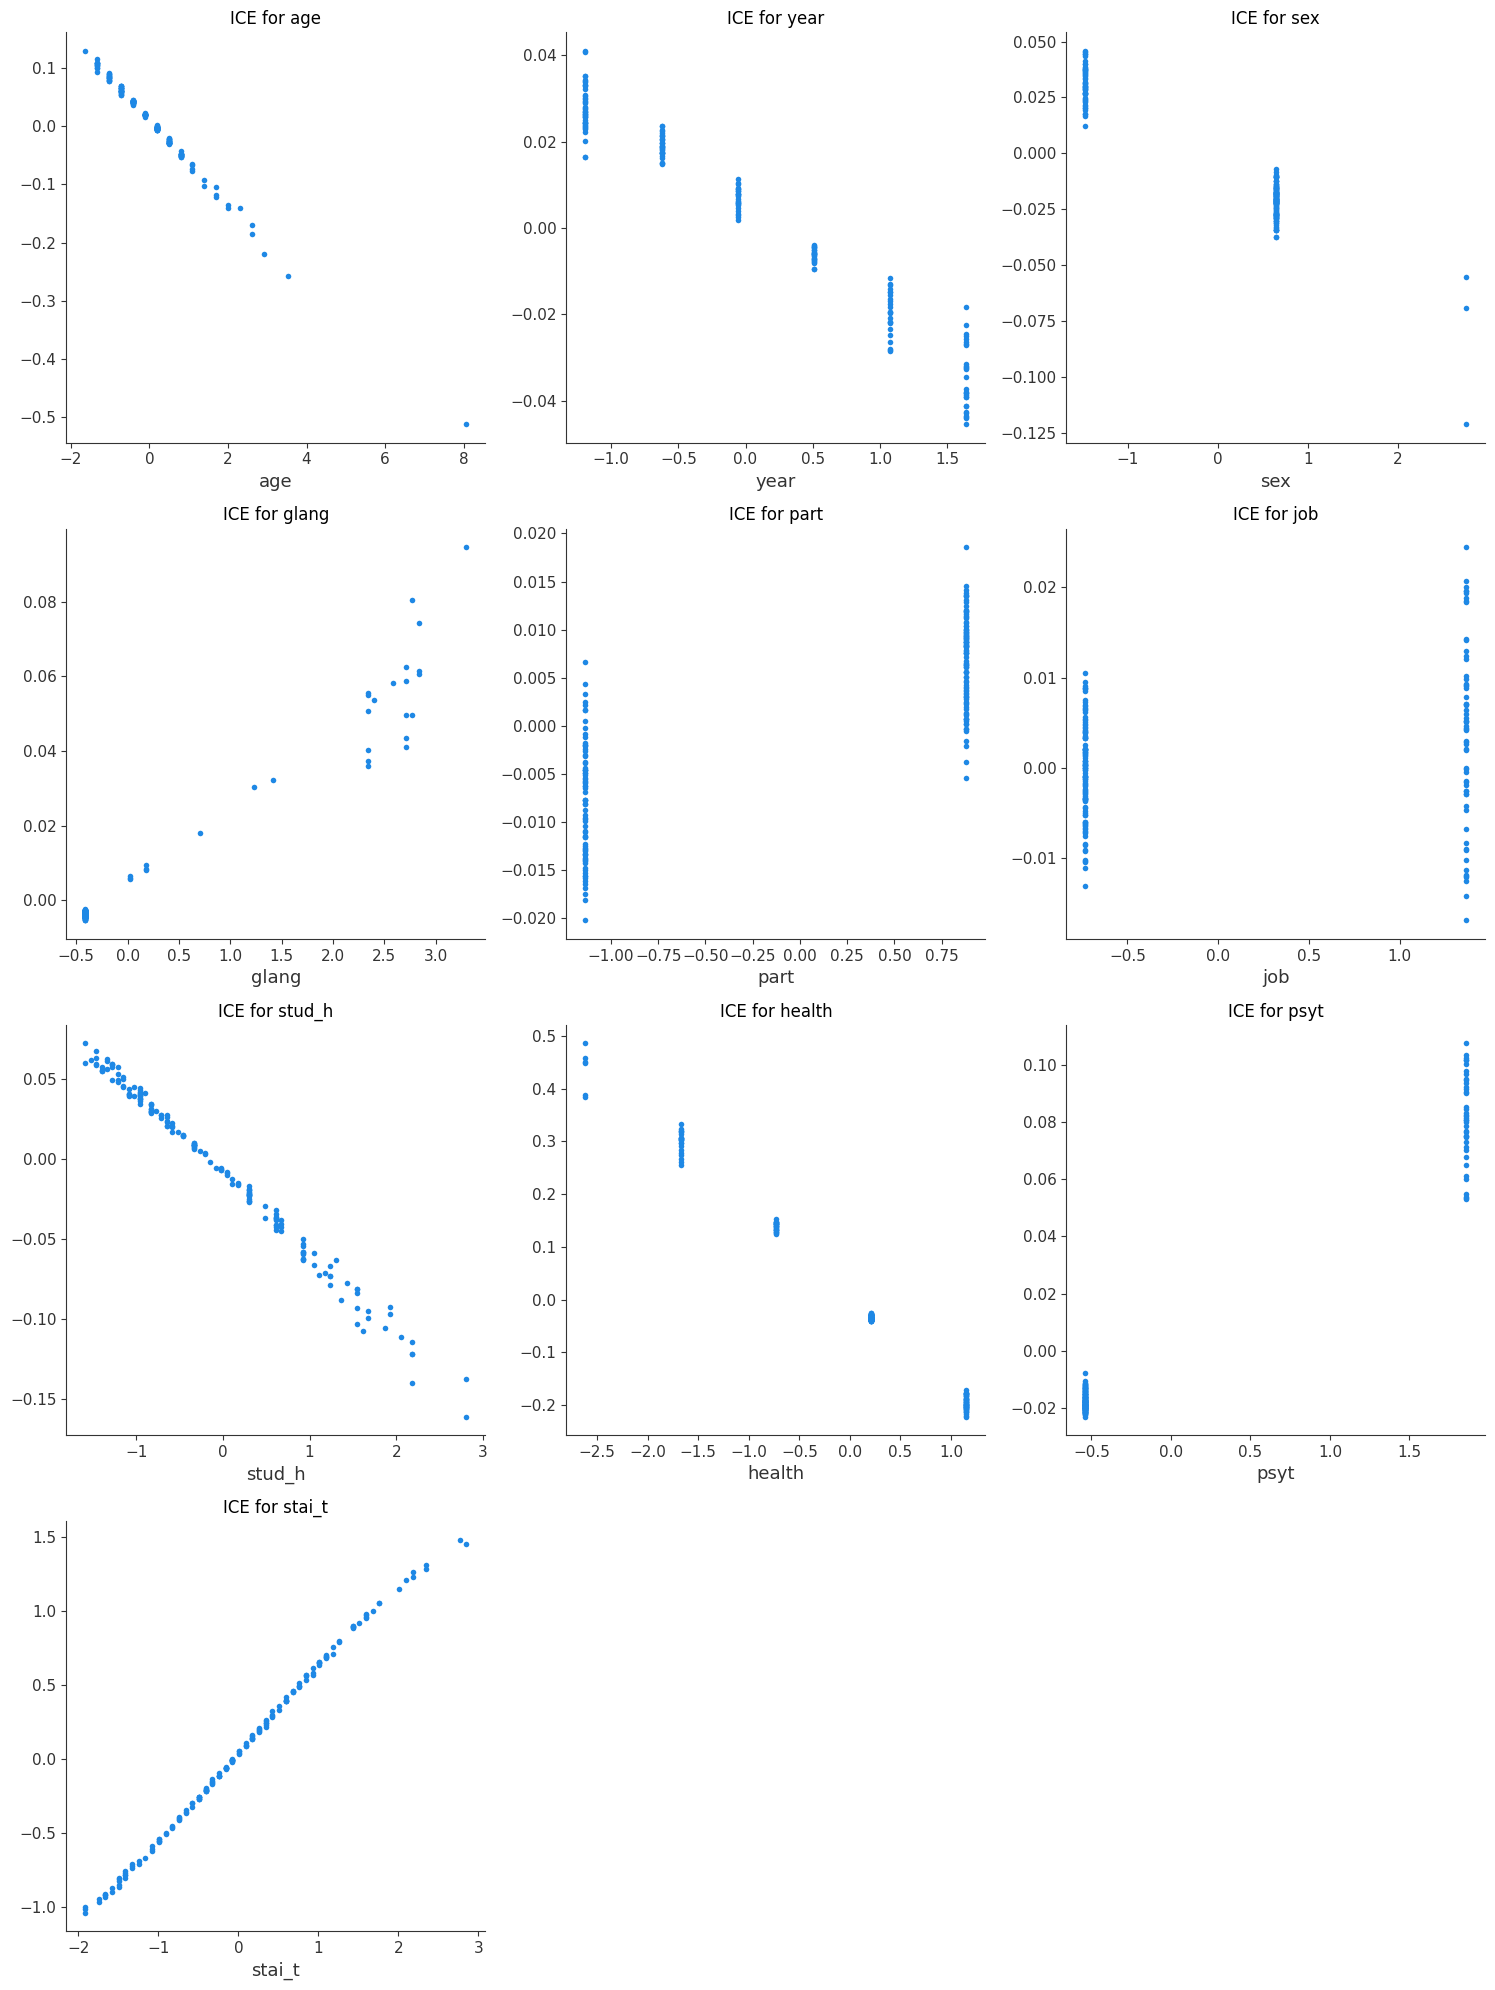

In [68]:
# List of feature names for which to plot ICEs
feature_names = ['age', 'year', 'sex', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt', 'stai_t']

# Get column indices of feature names in X_test
feature_indices = [Predictors.index(feature) for feature in feature_names]

# Calculate number of rows and columns needed for subplots
num_features = len(feature_names)
max_cols = 3
num_rows = (num_features - 1) // max_cols + 1  # Calculate number of rows needed


# Create subplots for ICEs
fig, axes = plt.subplots(nrows=num_rows, ncols=max_cols, figsize=(15, 5 * num_rows))

# Adjust horizontal and vertical spacing between subplots
fig.subplots_adjust(wspace=6, hspace=5)

# Flatten axes array if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Plot ICEs for each feature
for i, feature_idx in enumerate(feature_indices):
    row = i // max_cols
    col = i % max_cols
    shap.dependence_plot(ind=feature_idx, shap_values=shap_values.values, features=X_test,
                         feature_names=Predictors, ax=axes[row, col], show=False,
                         interaction_index=None)  # Set interaction_index to None for ICE plots
    axes[row, col].set_title(f'ICE for {feature_names[i]}')

   
    axes[row, col].set_ylabel('')

# Hide any unused subplots
for j in range(i + 1, num_rows * max_cols):
    row = j // max_cols
    col = j % max_cols
    fig.delaxes(axes[row, col])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Permutation Feature Importance


6/6 [==============================] - 0s 3ms/step


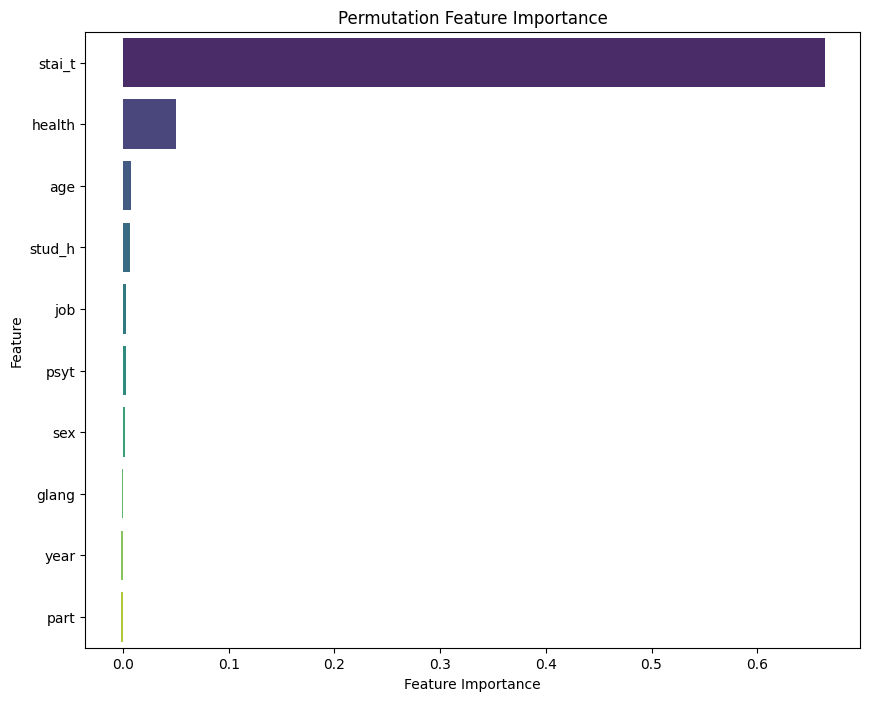

In [69]:

def custom_scoring_function(estimator, X, y):
    y_pred = estimator.predict(X)
    return -mean_squared_error(y, y_pred)

perm_importance = permutation_importance(model, X_test, Y_test, n_repeats=30, random_state=42, scoring=custom_scoring_function)

feature_names = Predictors
feature_importance = perm_importance.importances_mean

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plotting the feature importance with shading
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

plt.xlabel('Feature Importance')
plt.title('Permutation Feature Importance')
plt.show()

# Function to add shading to the table
def color_negative_red(val):
    color = 'lightgreen' if val >= 0 else 'white'
    return f'background-color: {color}'

# Apply shading based on importance values
styled_table = feature_importance_df.style.background_gradient(cmap='viridis', subset=['Importance'])

# Display the styled table
styled_table
